# 载入数据

In [1]:
import tensorflow as tf

In [2]:
import tensorflow.examples.tutorials.mnist.input_data as input_data

In [3]:
mnist=input_data.read_data_sets("MNIST/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST/t10k-images-idx3-ubyte.gz
Extracting MNIST/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
print("训练集数量：",mnist.train.num_examples,'，验证集数量：',mnist.validation.num_examples,',测试集数量：',mnist.test.num_examples)

训练集数量： 55000 ，验证集数量： 5000 ,测试集数量： 10000


# 构建模型

# 定义x和y的占位符

In [6]:
# mnist中每张图片共有28*28=784个像素点
x=tf.placeholder(tf.float32,[None,784],name="X")
# 0-9一共10个数字--10个类别
y=tf.placeholder(tf.float32,[None,10],name="Y")

# 创建变量

In [7]:
W=tf.Variable(tf.random_normal([784,10]),name='W')
b=tf.Variable(tf.zeros([10]),name="b")

# 单个神经元构建神经网络

In [8]:
forward=tf.matmul(x,W)+b# 向前计算

关于softmax regression
当我们处理多分类任务时，通常需要使用softmax regression模型
softmax会为每一类估算出一个概率
工作原理：当判定为某一的特征相加，然后把这些特征转化为判定是这一类的概率

In [10]:
pred=tf.nn.softmax(forward)

# 训练模型

In [12]:
train_epochs=50
batch_size=100
total_batch=int(mnist.train.num_examples/batch_size)
display_step=1
learning_rate=0.01

# 定义损失函数

In [13]:
# 定义交叉熵损失函数
loss_function=tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred),reduction_indices=1))

# 定义优化器

In [15]:
#梯度下降优化器
optimizer=tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_function)

# 定义准确率

In [16]:
# 检查预测类别tf.argmax(pred,1)与实际类别tf.argmax(y,1)的匹配情况
correct_prediction=tf.equal(tf.argmax(pred,1),tf.argmax(y,1))

In [17]:
# 准确率，将布尔值转化为浮点数，并计算平均值
accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

In [18]:
sess=tf.Session()
init=tf.global_variables_initializer()
sess.run(init)

# 模型训练

In [22]:
# 开始训练
for epoch in range(train_epochs):
    for batch in range(total_batch):
        xs,ys=mnist.train.next_batch(batch_size)#读取数据
        sess.run(optimizer,feed_dict={x:xs,y:ys})# 执行批次训练
        # total_batch个批次训练完成后，使用验证数据计算误差和准确率；验证集没有分批
        loss,acc=sess.run([loss_function,accuracy],feed_dict={x:mnist.validation.images,y:mnist.validation.labels})
        #打印训练过程中信息
        if(epoch+1)%display_step==0:
            print("Train Epoch:","%02d"%(epoch+1),"Loss=","{:.9f}".format(loss),\
                  'Accuracy=',"{:4f}".format(acc))
print("Train Finished")
        

Train Epoch: 01 Loss= 14.548644066 Accuracy= 0.089400
Train Epoch: 01 Loss= 14.475773811 Accuracy= 0.089000
Train Epoch: 01 Loss= 14.408425331 Accuracy= 0.089600
Train Epoch: 01 Loss= 14.325251579 Accuracy= 0.090000
Train Epoch: 01 Loss= 14.255049706 Accuracy= 0.090400
Train Epoch: 01 Loss= 14.176420212 Accuracy= 0.090800
Train Epoch: 01 Loss= 14.102195740 Accuracy= 0.091400
Train Epoch: 01 Loss= 14.027726173 Accuracy= 0.091800
Train Epoch: 01 Loss= 13.967849731 Accuracy= 0.092400
Train Epoch: 01 Loss= 13.895998001 Accuracy= 0.093000
Train Epoch: 01 Loss= 13.811887741 Accuracy= 0.093000
Train Epoch: 01 Loss= 13.743330002 Accuracy= 0.092800
Train Epoch: 01 Loss= 13.688029289 Accuracy= 0.092800
Train Epoch: 01 Loss= 13.620384216 Accuracy= 0.093400
Train Epoch: 01 Loss= 13.552431107 Accuracy= 0.093200
Train Epoch: 01 Loss= 13.484950066 Accuracy= 0.093000
Train Epoch: 01 Loss= 13.418993950 Accuracy= 0.093600
Train Epoch: 01 Loss= 13.359252930 Accuracy= 0.093400
Train Epoch: 01 Loss= 13.295

Train Epoch: 01 Loss= 7.899875164 Accuracy= 0.133000
Train Epoch: 01 Loss= 7.880534172 Accuracy= 0.133600
Train Epoch: 01 Loss= 7.864688873 Accuracy= 0.134600
Train Epoch: 01 Loss= 7.845652580 Accuracy= 0.135400
Train Epoch: 01 Loss= 7.826546669 Accuracy= 0.136200
Train Epoch: 01 Loss= 7.805934429 Accuracy= 0.136000
Train Epoch: 01 Loss= 7.786645412 Accuracy= 0.136600
Train Epoch: 01 Loss= 7.771879673 Accuracy= 0.136800
Train Epoch: 01 Loss= 7.758529663 Accuracy= 0.137400
Train Epoch: 01 Loss= 7.740645885 Accuracy= 0.137600
Train Epoch: 01 Loss= 7.720935822 Accuracy= 0.138200
Train Epoch: 01 Loss= 7.701076508 Accuracy= 0.138400
Train Epoch: 01 Loss= 7.682907104 Accuracy= 0.138400
Train Epoch: 01 Loss= 7.668229580 Accuracy= 0.139000
Train Epoch: 01 Loss= 7.652415752 Accuracy= 0.139200
Train Epoch: 01 Loss= 7.636434555 Accuracy= 0.140400
Train Epoch: 01 Loss= 7.620263100 Accuracy= 0.140800
Train Epoch: 01 Loss= 7.605508804 Accuracy= 0.141400
Train Epoch: 01 Loss= 7.588499069 Accuracy= 0.

Train Epoch: 01 Loss= 5.805956364 Accuracy= 0.214000
Train Epoch: 01 Loss= 5.798322201 Accuracy= 0.214800
Train Epoch: 01 Loss= 5.788691998 Accuracy= 0.214600
Train Epoch: 01 Loss= 5.779766560 Accuracy= 0.216200
Train Epoch: 01 Loss= 5.771277428 Accuracy= 0.216800
Train Epoch: 01 Loss= 5.763229847 Accuracy= 0.217000
Train Epoch: 01 Loss= 5.754393578 Accuracy= 0.217000
Train Epoch: 01 Loss= 5.743999958 Accuracy= 0.218200
Train Epoch: 01 Loss= 5.737033844 Accuracy= 0.219000
Train Epoch: 01 Loss= 5.729522705 Accuracy= 0.220000
Train Epoch: 01 Loss= 5.722175598 Accuracy= 0.220200
Train Epoch: 01 Loss= 5.714584351 Accuracy= 0.220600
Train Epoch: 01 Loss= 5.706721783 Accuracy= 0.221400
Train Epoch: 01 Loss= 5.698558331 Accuracy= 0.222600
Train Epoch: 01 Loss= 5.690382004 Accuracy= 0.223000
Train Epoch: 01 Loss= 5.683566570 Accuracy= 0.223200
Train Epoch: 01 Loss= 5.675536633 Accuracy= 0.223800
Train Epoch: 01 Loss= 5.666436672 Accuracy= 0.224200
Train Epoch: 01 Loss= 5.658964634 Accuracy= 0.

Train Epoch: 01 Loss= 4.658083439 Accuracy= 0.301200
Train Epoch: 01 Loss= 4.653233528 Accuracy= 0.301400
Train Epoch: 01 Loss= 4.647320271 Accuracy= 0.301800
Train Epoch: 01 Loss= 4.642866135 Accuracy= 0.302600
Train Epoch: 01 Loss= 4.638137341 Accuracy= 0.303000
Train Epoch: 01 Loss= 4.633170605 Accuracy= 0.304000
Train Epoch: 01 Loss= 4.627043724 Accuracy= 0.304600
Train Epoch: 01 Loss= 4.621692181 Accuracy= 0.305000
Train Epoch: 01 Loss= 4.615925789 Accuracy= 0.305600
Train Epoch: 01 Loss= 4.609613895 Accuracy= 0.307200
Train Epoch: 01 Loss= 4.603997231 Accuracy= 0.307200
Train Epoch: 01 Loss= 4.599629879 Accuracy= 0.307600
Train Epoch: 01 Loss= 4.594501019 Accuracy= 0.308600
Train Epoch: 01 Loss= 4.589412689 Accuracy= 0.308200
Train Epoch: 01 Loss= 4.584566593 Accuracy= 0.308800
Train Epoch: 01 Loss= 4.579153061 Accuracy= 0.310000
Train Epoch: 01 Loss= 4.574547291 Accuracy= 0.311000
Train Epoch: 01 Loss= 4.569546700 Accuracy= 0.312800
Train Epoch: 01 Loss= 4.564236164 Accuracy= 0.

Train Epoch: 02 Loss= 3.871589899 Accuracy= 0.385800
Train Epoch: 02 Loss= 3.868720293 Accuracy= 0.386600
Train Epoch: 02 Loss= 3.864899635 Accuracy= 0.386400
Train Epoch: 02 Loss= 3.861486673 Accuracy= 0.387800
Train Epoch: 02 Loss= 3.858058691 Accuracy= 0.388600
Train Epoch: 02 Loss= 3.854010582 Accuracy= 0.388600
Train Epoch: 02 Loss= 3.850026608 Accuracy= 0.388200
Train Epoch: 02 Loss= 3.846514940 Accuracy= 0.389600
Train Epoch: 02 Loss= 3.842789412 Accuracy= 0.389400
Train Epoch: 02 Loss= 3.839288235 Accuracy= 0.390000
Train Epoch: 02 Loss= 3.836460590 Accuracy= 0.390200
Train Epoch: 02 Loss= 3.832227230 Accuracy= 0.390200
Train Epoch: 02 Loss= 3.829394102 Accuracy= 0.390400
Train Epoch: 02 Loss= 3.825698853 Accuracy= 0.390200
Train Epoch: 02 Loss= 3.822593689 Accuracy= 0.390600
Train Epoch: 02 Loss= 3.819751501 Accuracy= 0.391200
Train Epoch: 02 Loss= 3.816385984 Accuracy= 0.392000
Train Epoch: 02 Loss= 3.812391758 Accuracy= 0.392200
Train Epoch: 02 Loss= 3.809296846 Accuracy= 0.

Train Epoch: 02 Loss= 3.350784063 Accuracy= 0.452600
Train Epoch: 02 Loss= 3.348214865 Accuracy= 0.453000
Train Epoch: 02 Loss= 3.345601082 Accuracy= 0.452800
Train Epoch: 02 Loss= 3.342824221 Accuracy= 0.453400
Train Epoch: 02 Loss= 3.340210915 Accuracy= 0.453400
Train Epoch: 02 Loss= 3.337378025 Accuracy= 0.454000
Train Epoch: 02 Loss= 3.335591316 Accuracy= 0.454000
Train Epoch: 02 Loss= 3.333045244 Accuracy= 0.454000
Train Epoch: 02 Loss= 3.330029011 Accuracy= 0.454400
Train Epoch: 02 Loss= 3.327273369 Accuracy= 0.454600
Train Epoch: 02 Loss= 3.325112820 Accuracy= 0.454600
Train Epoch: 02 Loss= 3.322885275 Accuracy= 0.455600
Train Epoch: 02 Loss= 3.320626974 Accuracy= 0.456000
Train Epoch: 02 Loss= 3.318006277 Accuracy= 0.456600
Train Epoch: 02 Loss= 3.315608978 Accuracy= 0.457400
Train Epoch: 02 Loss= 3.313170195 Accuracy= 0.457400
Train Epoch: 02 Loss= 3.310767889 Accuracy= 0.457800
Train Epoch: 02 Loss= 3.308359861 Accuracy= 0.458000
Train Epoch: 02 Loss= 3.306328058 Accuracy= 0.

Train Epoch: 02 Loss= 3.009884357 Accuracy= 0.498000
Train Epoch: 02 Loss= 3.007769585 Accuracy= 0.499400
Train Epoch: 02 Loss= 3.005680561 Accuracy= 0.499400
Train Epoch: 02 Loss= 3.003606319 Accuracy= 0.499000
Train Epoch: 02 Loss= 3.001387596 Accuracy= 0.500200
Train Epoch: 02 Loss= 2.999111652 Accuracy= 0.499800
Train Epoch: 02 Loss= 2.997844219 Accuracy= 0.500000
Train Epoch: 02 Loss= 2.995778084 Accuracy= 0.500600
Train Epoch: 02 Loss= 2.994152546 Accuracy= 0.500800
Train Epoch: 02 Loss= 2.992309332 Accuracy= 0.500800
Train Epoch: 02 Loss= 2.990365267 Accuracy= 0.501000
Train Epoch: 02 Loss= 2.988661051 Accuracy= 0.501400
Train Epoch: 02 Loss= 2.986909866 Accuracy= 0.501600
Train Epoch: 02 Loss= 2.984706402 Accuracy= 0.503000
Train Epoch: 02 Loss= 2.982819319 Accuracy= 0.502800
Train Epoch: 02 Loss= 2.981306076 Accuracy= 0.503800
Train Epoch: 02 Loss= 2.979264259 Accuracy= 0.505000
Train Epoch: 02 Loss= 2.977533340 Accuracy= 0.504600
Train Epoch: 02 Loss= 2.976193905 Accuracy= 0.

Train Epoch: 03 Loss= 2.730476618 Accuracy= 0.534600
Train Epoch: 03 Loss= 2.729033470 Accuracy= 0.535400
Train Epoch: 03 Loss= 2.727365017 Accuracy= 0.535400
Train Epoch: 03 Loss= 2.726139784 Accuracy= 0.535400
Train Epoch: 03 Loss= 2.724307775 Accuracy= 0.535200
Train Epoch: 03 Loss= 2.723344088 Accuracy= 0.536000
Train Epoch: 03 Loss= 2.722206354 Accuracy= 0.535800
Train Epoch: 03 Loss= 2.721138477 Accuracy= 0.536200
Train Epoch: 03 Loss= 2.719783545 Accuracy= 0.536400
Train Epoch: 03 Loss= 2.718179226 Accuracy= 0.536600
Train Epoch: 03 Loss= 2.716886997 Accuracy= 0.536800
Train Epoch: 03 Loss= 2.715074539 Accuracy= 0.536800
Train Epoch: 03 Loss= 2.714045763 Accuracy= 0.536400
Train Epoch: 03 Loss= 2.712536097 Accuracy= 0.536800
Train Epoch: 03 Loss= 2.711041451 Accuracy= 0.537000
Train Epoch: 03 Loss= 2.709311724 Accuracy= 0.537600
Train Epoch: 03 Loss= 2.707457304 Accuracy= 0.537800
Train Epoch: 03 Loss= 2.706363201 Accuracy= 0.537600
Train Epoch: 03 Loss= 2.704504013 Accuracy= 0.

Train Epoch: 03 Loss= 2.518181562 Accuracy= 0.565000
Train Epoch: 03 Loss= 2.517347574 Accuracy= 0.564800
Train Epoch: 03 Loss= 2.516236305 Accuracy= 0.565200
Train Epoch: 03 Loss= 2.514854670 Accuracy= 0.565400
Train Epoch: 03 Loss= 2.514229774 Accuracy= 0.565400
Train Epoch: 03 Loss= 2.512823343 Accuracy= 0.565600
Train Epoch: 03 Loss= 2.511813641 Accuracy= 0.565200
Train Epoch: 03 Loss= 2.510804892 Accuracy= 0.566000
Train Epoch: 03 Loss= 2.510151863 Accuracy= 0.565600
Train Epoch: 03 Loss= 2.508853912 Accuracy= 0.566000
Train Epoch: 03 Loss= 2.508103132 Accuracy= 0.566000
Train Epoch: 03 Loss= 2.507053614 Accuracy= 0.566600
Train Epoch: 03 Loss= 2.505840540 Accuracy= 0.566400
Train Epoch: 03 Loss= 2.505016804 Accuracy= 0.566600
Train Epoch: 03 Loss= 2.503767729 Accuracy= 0.566800
Train Epoch: 03 Loss= 2.502754927 Accuracy= 0.565800
Train Epoch: 03 Loss= 2.501627445 Accuracy= 0.566200
Train Epoch: 03 Loss= 2.500365257 Accuracy= 0.566000
Train Epoch: 03 Loss= 2.499365091 Accuracy= 0.

Train Epoch: 03 Loss= 2.336034298 Accuracy= 0.590400
Train Epoch: 03 Loss= 2.334928989 Accuracy= 0.590400
Train Epoch: 03 Loss= 2.333745241 Accuracy= 0.591000
Train Epoch: 03 Loss= 2.332846642 Accuracy= 0.590800
Train Epoch: 03 Loss= 2.332029581 Accuracy= 0.590400
Train Epoch: 03 Loss= 2.331200838 Accuracy= 0.590600
Train Epoch: 03 Loss= 2.330064058 Accuracy= 0.591200
Train Epoch: 03 Loss= 2.328947783 Accuracy= 0.591000
Train Epoch: 03 Loss= 2.327808142 Accuracy= 0.591000
Train Epoch: 03 Loss= 2.326786995 Accuracy= 0.591000
Train Epoch: 03 Loss= 2.326021671 Accuracy= 0.591000
Train Epoch: 03 Loss= 2.325167894 Accuracy= 0.590800
Train Epoch: 03 Loss= 2.324521065 Accuracy= 0.590800
Train Epoch: 03 Loss= 2.323643684 Accuracy= 0.592400
Train Epoch: 03 Loss= 2.322774887 Accuracy= 0.592400
Train Epoch: 03 Loss= 2.322195768 Accuracy= 0.592800
Train Epoch: 03 Loss= 2.321442842 Accuracy= 0.592600
Train Epoch: 03 Loss= 2.320647240 Accuracy= 0.592600
Train Epoch: 03 Loss= 2.319619894 Accuracy= 0.

Train Epoch: 04 Loss= 2.199498177 Accuracy= 0.608000
Train Epoch: 04 Loss= 2.198665142 Accuracy= 0.608600
Train Epoch: 04 Loss= 2.197753429 Accuracy= 0.608200
Train Epoch: 04 Loss= 2.197105408 Accuracy= 0.608600
Train Epoch: 04 Loss= 2.196394444 Accuracy= 0.608200
Train Epoch: 04 Loss= 2.195313692 Accuracy= 0.607800
Train Epoch: 04 Loss= 2.194622278 Accuracy= 0.608600
Train Epoch: 04 Loss= 2.193838358 Accuracy= 0.608800
Train Epoch: 04 Loss= 2.193298340 Accuracy= 0.609000
Train Epoch: 04 Loss= 2.192544937 Accuracy= 0.609200
Train Epoch: 04 Loss= 2.191963196 Accuracy= 0.609400
Train Epoch: 04 Loss= 2.191092968 Accuracy= 0.609200
Train Epoch: 04 Loss= 2.190360069 Accuracy= 0.609000
Train Epoch: 04 Loss= 2.189434290 Accuracy= 0.609000
Train Epoch: 04 Loss= 2.188518524 Accuracy= 0.608800
Train Epoch: 04 Loss= 2.187735558 Accuracy= 0.609200
Train Epoch: 04 Loss= 2.186901093 Accuracy= 0.609600
Train Epoch: 04 Loss= 2.186097383 Accuracy= 0.609600
Train Epoch: 04 Loss= 2.185285091 Accuracy= 0.

Train Epoch: 04 Loss= 2.065125704 Accuracy= 0.625600
Train Epoch: 04 Loss= 2.064353228 Accuracy= 0.625400
Train Epoch: 04 Loss= 2.063796759 Accuracy= 0.625000
Train Epoch: 04 Loss= 2.063158512 Accuracy= 0.624600
Train Epoch: 04 Loss= 2.062501669 Accuracy= 0.625000
Train Epoch: 04 Loss= 2.061631918 Accuracy= 0.625400
Train Epoch: 04 Loss= 2.061117887 Accuracy= 0.625000
Train Epoch: 04 Loss= 2.060470819 Accuracy= 0.624800
Train Epoch: 04 Loss= 2.059759617 Accuracy= 0.625000
Train Epoch: 04 Loss= 2.059242249 Accuracy= 0.625200
Train Epoch: 04 Loss= 2.058610201 Accuracy= 0.625800
Train Epoch: 04 Loss= 2.057969570 Accuracy= 0.625800
Train Epoch: 04 Loss= 2.057422161 Accuracy= 0.626200
Train Epoch: 04 Loss= 2.056222677 Accuracy= 0.626600
Train Epoch: 04 Loss= 2.055381298 Accuracy= 0.626400
Train Epoch: 04 Loss= 2.054504156 Accuracy= 0.626800
Train Epoch: 04 Loss= 2.053943396 Accuracy= 0.627800
Train Epoch: 04 Loss= 2.053227663 Accuracy= 0.627000
Train Epoch: 04 Loss= 2.052488089 Accuracy= 0.

Train Epoch: 04 Loss= 1.962391376 Accuracy= 0.640200
Train Epoch: 04 Loss= 1.961753964 Accuracy= 0.639800
Train Epoch: 04 Loss= 1.961200237 Accuracy= 0.640200
Train Epoch: 04 Loss= 1.960539103 Accuracy= 0.640000
Train Epoch: 04 Loss= 1.960107446 Accuracy= 0.640600
Train Epoch: 04 Loss= 1.959516764 Accuracy= 0.640600
Train Epoch: 04 Loss= 1.958738446 Accuracy= 0.640400
Train Epoch: 04 Loss= 1.958141804 Accuracy= 0.640000
Train Epoch: 04 Loss= 1.957542539 Accuracy= 0.640000
Train Epoch: 04 Loss= 1.957211733 Accuracy= 0.640000
Train Epoch: 04 Loss= 1.956628084 Accuracy= 0.640000
Train Epoch: 04 Loss= 1.956054330 Accuracy= 0.640000
Train Epoch: 04 Loss= 1.955300570 Accuracy= 0.640000
Train Epoch: 04 Loss= 1.954688430 Accuracy= 0.640800
Train Epoch: 04 Loss= 1.954211354 Accuracy= 0.640800
Train Epoch: 04 Loss= 1.953803301 Accuracy= 0.640200
Train Epoch: 04 Loss= 1.953131676 Accuracy= 0.640600
Train Epoch: 04 Loss= 1.952271104 Accuracy= 0.640800
Train Epoch: 04 Loss= 1.951684594 Accuracy= 0.

Train Epoch: 05 Loss= 1.881141067 Accuracy= 0.649200
Train Epoch: 05 Loss= 1.880864263 Accuracy= 0.649400
Train Epoch: 05 Loss= 1.880454063 Accuracy= 0.649800
Train Epoch: 05 Loss= 1.879805803 Accuracy= 0.649600
Train Epoch: 05 Loss= 1.879331827 Accuracy= 0.649600
Train Epoch: 05 Loss= 1.878834724 Accuracy= 0.649600
Train Epoch: 05 Loss= 1.878333211 Accuracy= 0.650000
Train Epoch: 05 Loss= 1.877909184 Accuracy= 0.650000
Train Epoch: 05 Loss= 1.877337098 Accuracy= 0.650000
Train Epoch: 05 Loss= 1.876975775 Accuracy= 0.650000
Train Epoch: 05 Loss= 1.876413703 Accuracy= 0.650200
Train Epoch: 05 Loss= 1.875722289 Accuracy= 0.650400
Train Epoch: 05 Loss= 1.875235200 Accuracy= 0.650600
Train Epoch: 05 Loss= 1.874991059 Accuracy= 0.650200
Train Epoch: 05 Loss= 1.874306083 Accuracy= 0.650400
Train Epoch: 05 Loss= 1.873766661 Accuracy= 0.650400
Train Epoch: 05 Loss= 1.873462915 Accuracy= 0.650800
Train Epoch: 05 Loss= 1.872796535 Accuracy= 0.650600
Train Epoch: 05 Loss= 1.872046232 Accuracy= 0.

Train Epoch: 05 Loss= 1.787330270 Accuracy= 0.664600
Train Epoch: 05 Loss= 1.786974669 Accuracy= 0.664600
Train Epoch: 05 Loss= 1.786680818 Accuracy= 0.665200
Train Epoch: 05 Loss= 1.786209226 Accuracy= 0.665200
Train Epoch: 05 Loss= 1.785706997 Accuracy= 0.665200
Train Epoch: 05 Loss= 1.785136342 Accuracy= 0.665200
Train Epoch: 05 Loss= 1.784670711 Accuracy= 0.665800
Train Epoch: 05 Loss= 1.784244180 Accuracy= 0.665000
Train Epoch: 05 Loss= 1.784087062 Accuracy= 0.665000
Train Epoch: 05 Loss= 1.783514023 Accuracy= 0.665000
Train Epoch: 05 Loss= 1.782897711 Accuracy= 0.665200
Train Epoch: 05 Loss= 1.782659769 Accuracy= 0.665000
Train Epoch: 05 Loss= 1.782159567 Accuracy= 0.665200
Train Epoch: 05 Loss= 1.781816840 Accuracy= 0.665400
Train Epoch: 05 Loss= 1.781357408 Accuracy= 0.664800
Train Epoch: 05 Loss= 1.781127334 Accuracy= 0.665400
Train Epoch: 05 Loss= 1.780785918 Accuracy= 0.665800
Train Epoch: 05 Loss= 1.780407786 Accuracy= 0.665600
Train Epoch: 05 Loss= 1.779950023 Accuracy= 0.

Train Epoch: 05 Loss= 1.716944575 Accuracy= 0.676800
Train Epoch: 05 Loss= 1.716834545 Accuracy= 0.677600
Train Epoch: 05 Loss= 1.716407776 Accuracy= 0.677400
Train Epoch: 05 Loss= 1.715773821 Accuracy= 0.677400
Train Epoch: 05 Loss= 1.715241432 Accuracy= 0.677800
Train Epoch: 05 Loss= 1.714739442 Accuracy= 0.677800
Train Epoch: 05 Loss= 1.714310169 Accuracy= 0.678000
Train Epoch: 05 Loss= 1.713987947 Accuracy= 0.677400
Train Epoch: 05 Loss= 1.713431239 Accuracy= 0.678200
Train Epoch: 05 Loss= 1.713000774 Accuracy= 0.678000
Train Epoch: 05 Loss= 1.712437272 Accuracy= 0.678200
Train Epoch: 05 Loss= 1.712197065 Accuracy= 0.679200
Train Epoch: 05 Loss= 1.711974025 Accuracy= 0.679200
Train Epoch: 05 Loss= 1.711607456 Accuracy= 0.679000
Train Epoch: 05 Loss= 1.711122990 Accuracy= 0.679000
Train Epoch: 05 Loss= 1.710779309 Accuracy= 0.679400
Train Epoch: 05 Loss= 1.710451603 Accuracy= 0.679800
Train Epoch: 05 Loss= 1.709745884 Accuracy= 0.679000
Train Epoch: 05 Loss= 1.709333539 Accuracy= 0.

Train Epoch: 06 Loss= 1.652893782 Accuracy= 0.688000
Train Epoch: 06 Loss= 1.652539611 Accuracy= 0.687400
Train Epoch: 06 Loss= 1.652287841 Accuracy= 0.687200
Train Epoch: 06 Loss= 1.651889443 Accuracy= 0.687400
Train Epoch: 06 Loss= 1.651569486 Accuracy= 0.688000
Train Epoch: 06 Loss= 1.651193023 Accuracy= 0.687800
Train Epoch: 06 Loss= 1.650805473 Accuracy= 0.687400
Train Epoch: 06 Loss= 1.650438666 Accuracy= 0.687400
Train Epoch: 06 Loss= 1.650076151 Accuracy= 0.688000
Train Epoch: 06 Loss= 1.649760604 Accuracy= 0.688200
Train Epoch: 06 Loss= 1.649394751 Accuracy= 0.688000
Train Epoch: 06 Loss= 1.648983598 Accuracy= 0.688000
Train Epoch: 06 Loss= 1.648667336 Accuracy= 0.688600
Train Epoch: 06 Loss= 1.648278713 Accuracy= 0.688200
Train Epoch: 06 Loss= 1.647901535 Accuracy= 0.688000
Train Epoch: 06 Loss= 1.647554636 Accuracy= 0.687600
Train Epoch: 06 Loss= 1.647220731 Accuracy= 0.687400
Train Epoch: 06 Loss= 1.647011161 Accuracy= 0.687600
Train Epoch: 06 Loss= 1.646555066 Accuracy= 0.

Train Epoch: 06 Loss= 1.593450785 Accuracy= 0.695400
Train Epoch: 06 Loss= 1.593195558 Accuracy= 0.695600
Train Epoch: 06 Loss= 1.592857242 Accuracy= 0.695800
Train Epoch: 06 Loss= 1.592539787 Accuracy= 0.695200
Train Epoch: 06 Loss= 1.592288971 Accuracy= 0.695600
Train Epoch: 06 Loss= 1.591928124 Accuracy= 0.695600
Train Epoch: 06 Loss= 1.591484427 Accuracy= 0.696000
Train Epoch: 06 Loss= 1.591281652 Accuracy= 0.696000
Train Epoch: 06 Loss= 1.590915680 Accuracy= 0.696000
Train Epoch: 06 Loss= 1.590530038 Accuracy= 0.696000
Train Epoch: 06 Loss= 1.590356827 Accuracy= 0.696200
Train Epoch: 06 Loss= 1.590075850 Accuracy= 0.696400
Train Epoch: 06 Loss= 1.589733601 Accuracy= 0.697000
Train Epoch: 06 Loss= 1.589489222 Accuracy= 0.697400
Train Epoch: 06 Loss= 1.589296341 Accuracy= 0.697400
Train Epoch: 06 Loss= 1.588952422 Accuracy= 0.697400
Train Epoch: 06 Loss= 1.588697314 Accuracy= 0.697000
Train Epoch: 06 Loss= 1.588401914 Accuracy= 0.697400
Train Epoch: 06 Loss= 1.588016748 Accuracy= 0.

Train Epoch: 06 Loss= 1.542120218 Accuracy= 0.702800
Train Epoch: 06 Loss= 1.541787863 Accuracy= 0.703000
Train Epoch: 06 Loss= 1.541609168 Accuracy= 0.703600
Train Epoch: 06 Loss= 1.541392088 Accuracy= 0.703000
Train Epoch: 06 Loss= 1.541115165 Accuracy= 0.703200
Train Epoch: 06 Loss= 1.540880680 Accuracy= 0.703200
Train Epoch: 06 Loss= 1.540766597 Accuracy= 0.703400
Train Epoch: 06 Loss= 1.540536523 Accuracy= 0.703400
Train Epoch: 06 Loss= 1.540476918 Accuracy= 0.703200
Train Epoch: 06 Loss= 1.540285349 Accuracy= 0.703200
Train Epoch: 06 Loss= 1.540151954 Accuracy= 0.703200
Train Epoch: 06 Loss= 1.539602518 Accuracy= 0.703200
Train Epoch: 06 Loss= 1.539394140 Accuracy= 0.703000
Train Epoch: 06 Loss= 1.539107800 Accuracy= 0.703000
Train Epoch: 06 Loss= 1.538828850 Accuracy= 0.703200
Train Epoch: 06 Loss= 1.538468719 Accuracy= 0.703400
Train Epoch: 06 Loss= 1.538365960 Accuracy= 0.703400
Train Epoch: 06 Loss= 1.538127184 Accuracy= 0.703600
Train Epoch: 06 Loss= 1.537976265 Accuracy= 0.

Train Epoch: 06 Loss= 1.498416543 Accuracy= 0.709800
Train Epoch: 06 Loss= 1.498325586 Accuracy= 0.709600
Train Epoch: 06 Loss= 1.498103738 Accuracy= 0.709800
Train Epoch: 06 Loss= 1.497897863 Accuracy= 0.709600
Train Epoch: 06 Loss= 1.497385502 Accuracy= 0.710200
Train Epoch: 06 Loss= 1.497125387 Accuracy= 0.710200
Train Epoch: 06 Loss= 1.497028112 Accuracy= 0.710000
Train Epoch: 06 Loss= 1.496670127 Accuracy= 0.709800
Train Epoch: 06 Loss= 1.496337056 Accuracy= 0.709600
Train Epoch: 06 Loss= 1.496085882 Accuracy= 0.710200
Train Epoch: 06 Loss= 1.495681643 Accuracy= 0.710200
Train Epoch: 06 Loss= 1.495430231 Accuracy= 0.710200
Train Epoch: 06 Loss= 1.495223284 Accuracy= 0.709600
Train Epoch: 06 Loss= 1.494955420 Accuracy= 0.710000
Train Epoch: 06 Loss= 1.494703770 Accuracy= 0.710000
Train Epoch: 06 Loss= 1.494431138 Accuracy= 0.709600
Train Epoch: 06 Loss= 1.494200826 Accuracy= 0.709400
Train Epoch: 06 Loss= 1.493988276 Accuracy= 0.710200
Train Epoch: 06 Loss= 1.493651152 Accuracy= 0.

Train Epoch: 07 Loss= 1.451279879 Accuracy= 0.716600
Train Epoch: 07 Loss= 1.451066136 Accuracy= 0.716800
Train Epoch: 07 Loss= 1.450785995 Accuracy= 0.716800
Train Epoch: 07 Loss= 1.450717330 Accuracy= 0.716800
Train Epoch: 07 Loss= 1.450500250 Accuracy= 0.716800
Train Epoch: 07 Loss= 1.450347185 Accuracy= 0.716800
Train Epoch: 07 Loss= 1.449923396 Accuracy= 0.716800
Train Epoch: 07 Loss= 1.449659348 Accuracy= 0.717200
Train Epoch: 07 Loss= 1.449550033 Accuracy= 0.717400
Train Epoch: 07 Loss= 1.449206114 Accuracy= 0.717400
Train Epoch: 07 Loss= 1.448837996 Accuracy= 0.717400
Train Epoch: 07 Loss= 1.448456287 Accuracy= 0.717400
Train Epoch: 07 Loss= 1.448342323 Accuracy= 0.717200
Train Epoch: 07 Loss= 1.447932005 Accuracy= 0.717200
Train Epoch: 07 Loss= 1.447701216 Accuracy= 0.718000
Train Epoch: 07 Loss= 1.447574258 Accuracy= 0.717400
Train Epoch: 07 Loss= 1.447325230 Accuracy= 0.717600
Train Epoch: 07 Loss= 1.447001576 Accuracy= 0.717400
Train Epoch: 07 Loss= 1.446804881 Accuracy= 0.

Train Epoch: 07 Loss= 1.413418412 Accuracy= 0.721400
Train Epoch: 07 Loss= 1.413112044 Accuracy= 0.721400
Train Epoch: 07 Loss= 1.413028955 Accuracy= 0.721400
Train Epoch: 07 Loss= 1.412715077 Accuracy= 0.721600
Train Epoch: 07 Loss= 1.412705660 Accuracy= 0.722400
Train Epoch: 07 Loss= 1.412616253 Accuracy= 0.722400
Train Epoch: 07 Loss= 1.412470698 Accuracy= 0.722600
Train Epoch: 07 Loss= 1.412224174 Accuracy= 0.722400
Train Epoch: 07 Loss= 1.411996722 Accuracy= 0.722600
Train Epoch: 07 Loss= 1.411774993 Accuracy= 0.722400
Train Epoch: 07 Loss= 1.411601305 Accuracy= 0.722400
Train Epoch: 07 Loss= 1.411564708 Accuracy= 0.722000
Train Epoch: 07 Loss= 1.411502481 Accuracy= 0.721800
Train Epoch: 07 Loss= 1.411290407 Accuracy= 0.722200
Train Epoch: 07 Loss= 1.411014676 Accuracy= 0.722200
Train Epoch: 07 Loss= 1.410852432 Accuracy= 0.722400
Train Epoch: 07 Loss= 1.410428166 Accuracy= 0.722800
Train Epoch: 07 Loss= 1.410292745 Accuracy= 0.722800
Train Epoch: 07 Loss= 1.410119772 Accuracy= 0.

Train Epoch: 07 Loss= 1.380713820 Accuracy= 0.725800
Train Epoch: 07 Loss= 1.380742073 Accuracy= 0.726200
Train Epoch: 07 Loss= 1.380483389 Accuracy= 0.725800
Train Epoch: 07 Loss= 1.380295038 Accuracy= 0.725800
Train Epoch: 07 Loss= 1.380054474 Accuracy= 0.725200
Train Epoch: 07 Loss= 1.379853249 Accuracy= 0.725400
Train Epoch: 07 Loss= 1.379712701 Accuracy= 0.725200
Train Epoch: 07 Loss= 1.379530072 Accuracy= 0.725400
Train Epoch: 07 Loss= 1.379306674 Accuracy= 0.725600
Train Epoch: 07 Loss= 1.379002929 Accuracy= 0.725400
Train Epoch: 07 Loss= 1.378665090 Accuracy= 0.725800
Train Epoch: 07 Loss= 1.378601551 Accuracy= 0.725800
Train Epoch: 07 Loss= 1.378203154 Accuracy= 0.726200
Train Epoch: 07 Loss= 1.378048420 Accuracy= 0.726000
Train Epoch: 07 Loss= 1.377943158 Accuracy= 0.726800
Train Epoch: 07 Loss= 1.377636909 Accuracy= 0.726400
Train Epoch: 07 Loss= 1.377468586 Accuracy= 0.726200
Train Epoch: 07 Loss= 1.377199173 Accuracy= 0.727200
Train Epoch: 07 Loss= 1.377002358 Accuracy= 0.

Train Epoch: 08 Loss= 1.348221540 Accuracy= 0.732200
Train Epoch: 08 Loss= 1.347850323 Accuracy= 0.732200
Train Epoch: 08 Loss= 1.347640395 Accuracy= 0.731600
Train Epoch: 08 Loss= 1.347552657 Accuracy= 0.731400
Train Epoch: 08 Loss= 1.347464800 Accuracy= 0.731800
Train Epoch: 08 Loss= 1.347340584 Accuracy= 0.731600
Train Epoch: 08 Loss= 1.347317100 Accuracy= 0.731600
Train Epoch: 08 Loss= 1.347091198 Accuracy= 0.731800
Train Epoch: 08 Loss= 1.346883416 Accuracy= 0.732000
Train Epoch: 08 Loss= 1.346708536 Accuracy= 0.732000
Train Epoch: 08 Loss= 1.346612453 Accuracy= 0.732000
Train Epoch: 08 Loss= 1.346342564 Accuracy= 0.732200
Train Epoch: 08 Loss= 1.346299171 Accuracy= 0.732200
Train Epoch: 08 Loss= 1.346053839 Accuracy= 0.732600
Train Epoch: 08 Loss= 1.345831990 Accuracy= 0.733000
Train Epoch: 08 Loss= 1.345623851 Accuracy= 0.733200
Train Epoch: 08 Loss= 1.345494390 Accuracy= 0.732400
Train Epoch: 08 Loss= 1.345124602 Accuracy= 0.733400
Train Epoch: 08 Loss= 1.344982028 Accuracy= 0.

Train Epoch: 08 Loss= 1.316129446 Accuracy= 0.736600
Train Epoch: 08 Loss= 1.315939665 Accuracy= 0.736800
Train Epoch: 08 Loss= 1.315780282 Accuracy= 0.736600
Train Epoch: 08 Loss= 1.315460801 Accuracy= 0.737400
Train Epoch: 08 Loss= 1.315221310 Accuracy= 0.737400
Train Epoch: 08 Loss= 1.315180898 Accuracy= 0.737200
Train Epoch: 08 Loss= 1.314891934 Accuracy= 0.737200
Train Epoch: 08 Loss= 1.314809322 Accuracy= 0.737600
Train Epoch: 08 Loss= 1.314574718 Accuracy= 0.737800
Train Epoch: 08 Loss= 1.314490199 Accuracy= 0.737800
Train Epoch: 08 Loss= 1.314357281 Accuracy= 0.737200
Train Epoch: 08 Loss= 1.314170361 Accuracy= 0.737600
Train Epoch: 08 Loss= 1.314120650 Accuracy= 0.737600
Train Epoch: 08 Loss= 1.313860178 Accuracy= 0.737600
Train Epoch: 08 Loss= 1.313572645 Accuracy= 0.737600
Train Epoch: 08 Loss= 1.313366652 Accuracy= 0.737400
Train Epoch: 08 Loss= 1.313268185 Accuracy= 0.737800
Train Epoch: 08 Loss= 1.313157558 Accuracy= 0.737200
Train Epoch: 08 Loss= 1.312849641 Accuracy= 0.

Train Epoch: 08 Loss= 1.289854527 Accuracy= 0.741000
Train Epoch: 08 Loss= 1.289562941 Accuracy= 0.741400
Train Epoch: 08 Loss= 1.289319873 Accuracy= 0.741400
Train Epoch: 08 Loss= 1.289192319 Accuracy= 0.741200
Train Epoch: 08 Loss= 1.289051175 Accuracy= 0.741600
Train Epoch: 08 Loss= 1.288882256 Accuracy= 0.741400
Train Epoch: 08 Loss= 1.288822889 Accuracy= 0.741200
Train Epoch: 08 Loss= 1.288669705 Accuracy= 0.741600
Train Epoch: 08 Loss= 1.288541436 Accuracy= 0.741200
Train Epoch: 08 Loss= 1.288327575 Accuracy= 0.741400
Train Epoch: 08 Loss= 1.288277984 Accuracy= 0.740800
Train Epoch: 08 Loss= 1.288205147 Accuracy= 0.741000
Train Epoch: 08 Loss= 1.287973285 Accuracy= 0.741000
Train Epoch: 08 Loss= 1.287848234 Accuracy= 0.740800
Train Epoch: 08 Loss= 1.287762523 Accuracy= 0.741000
Train Epoch: 08 Loss= 1.287753463 Accuracy= 0.741200
Train Epoch: 08 Loss= 1.287473440 Accuracy= 0.740800
Train Epoch: 08 Loss= 1.287277222 Accuracy= 0.741400
Train Epoch: 08 Loss= 1.287196279 Accuracy= 0.

Train Epoch: 09 Loss= 1.265622854 Accuracy= 0.745200
Train Epoch: 09 Loss= 1.265687943 Accuracy= 0.745400
Train Epoch: 09 Loss= 1.265567780 Accuracy= 0.745600
Train Epoch: 09 Loss= 1.265559196 Accuracy= 0.745200
Train Epoch: 09 Loss= 1.265219331 Accuracy= 0.745400
Train Epoch: 09 Loss= 1.265172601 Accuracy= 0.745200
Train Epoch: 09 Loss= 1.264872909 Accuracy= 0.745800
Train Epoch: 09 Loss= 1.264673471 Accuracy= 0.745600
Train Epoch: 09 Loss= 1.264602304 Accuracy= 0.745800
Train Epoch: 09 Loss= 1.264297247 Accuracy= 0.745600
Train Epoch: 09 Loss= 1.264277935 Accuracy= 0.745800
Train Epoch: 09 Loss= 1.263889194 Accuracy= 0.745800
Train Epoch: 09 Loss= 1.263711691 Accuracy= 0.745600
Train Epoch: 09 Loss= 1.263568401 Accuracy= 0.745600
Train Epoch: 09 Loss= 1.263408780 Accuracy= 0.745400
Train Epoch: 09 Loss= 1.263328791 Accuracy= 0.745600
Train Epoch: 09 Loss= 1.263237834 Accuracy= 0.746400
Train Epoch: 09 Loss= 1.262927055 Accuracy= 0.745800
Train Epoch: 09 Loss= 1.262681603 Accuracy= 0.

Train Epoch: 09 Loss= 1.237724066 Accuracy= 0.751000
Train Epoch: 09 Loss= 1.237564206 Accuracy= 0.750800
Train Epoch: 09 Loss= 1.237416625 Accuracy= 0.750400
Train Epoch: 09 Loss= 1.237262130 Accuracy= 0.750800
Train Epoch: 09 Loss= 1.237317920 Accuracy= 0.751000
Train Epoch: 09 Loss= 1.237178683 Accuracy= 0.750800
Train Epoch: 09 Loss= 1.236946106 Accuracy= 0.750800
Train Epoch: 09 Loss= 1.236930847 Accuracy= 0.750800
Train Epoch: 09 Loss= 1.236872077 Accuracy= 0.751000
Train Epoch: 09 Loss= 1.236713648 Accuracy= 0.751000
Train Epoch: 09 Loss= 1.236523867 Accuracy= 0.751200
Train Epoch: 09 Loss= 1.236258745 Accuracy= 0.750600
Train Epoch: 09 Loss= 1.236070275 Accuracy= 0.751000
Train Epoch: 09 Loss= 1.235918522 Accuracy= 0.750600
Train Epoch: 09 Loss= 1.235682368 Accuracy= 0.750600
Train Epoch: 09 Loss= 1.235638618 Accuracy= 0.750800
Train Epoch: 09 Loss= 1.235570908 Accuracy= 0.751000
Train Epoch: 09 Loss= 1.235461950 Accuracy= 0.751000
Train Epoch: 09 Loss= 1.235333800 Accuracy= 0.

Train Epoch: 09 Loss= 1.215210557 Accuracy= 0.754200
Train Epoch: 09 Loss= 1.215167522 Accuracy= 0.754200
Train Epoch: 09 Loss= 1.215110421 Accuracy= 0.754400
Train Epoch: 09 Loss= 1.215085149 Accuracy= 0.754400
Train Epoch: 09 Loss= 1.214850545 Accuracy= 0.754400
Train Epoch: 09 Loss= 1.214641571 Accuracy= 0.754800
Train Epoch: 09 Loss= 1.214563727 Accuracy= 0.754800
Train Epoch: 09 Loss= 1.214337945 Accuracy= 0.754800
Train Epoch: 09 Loss= 1.214237690 Accuracy= 0.755000
Train Epoch: 09 Loss= 1.214207292 Accuracy= 0.755000
Train Epoch: 09 Loss= 1.214111924 Accuracy= 0.755000
Train Epoch: 09 Loss= 1.213833213 Accuracy= 0.755200
Train Epoch: 09 Loss= 1.213614464 Accuracy= 0.755400
Train Epoch: 09 Loss= 1.213428140 Accuracy= 0.755400
Train Epoch: 09 Loss= 1.213381767 Accuracy= 0.755400
Train Epoch: 09 Loss= 1.213276625 Accuracy= 0.755200
Train Epoch: 09 Loss= 1.212997556 Accuracy= 0.755200
Train Epoch: 09 Loss= 1.212937355 Accuracy= 0.756000
Train Epoch: 09 Loss= 1.212832808 Accuracy= 0.

Train Epoch: 10 Loss= 1.192513108 Accuracy= 0.759600
Train Epoch: 10 Loss= 1.192386866 Accuracy= 0.759600
Train Epoch: 10 Loss= 1.192242026 Accuracy= 0.760200
Train Epoch: 10 Loss= 1.192078710 Accuracy= 0.759800
Train Epoch: 10 Loss= 1.191985130 Accuracy= 0.759800
Train Epoch: 10 Loss= 1.191965461 Accuracy= 0.760200
Train Epoch: 10 Loss= 1.191877723 Accuracy= 0.759800
Train Epoch: 10 Loss= 1.191641331 Accuracy= 0.759400
Train Epoch: 10 Loss= 1.191556454 Accuracy= 0.759200
Train Epoch: 10 Loss= 1.191397190 Accuracy= 0.759600
Train Epoch: 10 Loss= 1.191236973 Accuracy= 0.759600
Train Epoch: 10 Loss= 1.191057563 Accuracy= 0.760000
Train Epoch: 10 Loss= 1.191041708 Accuracy= 0.759800
Train Epoch: 10 Loss= 1.190938234 Accuracy= 0.760200
Train Epoch: 10 Loss= 1.190864682 Accuracy= 0.760000
Train Epoch: 10 Loss= 1.190899611 Accuracy= 0.760400
Train Epoch: 10 Loss= 1.190734386 Accuracy= 0.760000
Train Epoch: 10 Loss= 1.190662026 Accuracy= 0.759800
Train Epoch: 10 Loss= 1.190665603 Accuracy= 0.

Train Epoch: 10 Loss= 1.170030117 Accuracy= 0.765000
Train Epoch: 10 Loss= 1.169903517 Accuracy= 0.765000
Train Epoch: 10 Loss= 1.169740796 Accuracy= 0.764800
Train Epoch: 10 Loss= 1.169759154 Accuracy= 0.764600
Train Epoch: 10 Loss= 1.169672370 Accuracy= 0.764400
Train Epoch: 10 Loss= 1.169559121 Accuracy= 0.764600
Train Epoch: 10 Loss= 1.169333220 Accuracy= 0.765000
Train Epoch: 10 Loss= 1.169201016 Accuracy= 0.764600
Train Epoch: 10 Loss= 1.169105649 Accuracy= 0.765200
Train Epoch: 10 Loss= 1.168914318 Accuracy= 0.764800
Train Epoch: 10 Loss= 1.168755412 Accuracy= 0.764600
Train Epoch: 10 Loss= 1.168649197 Accuracy= 0.765000
Train Epoch: 10 Loss= 1.168496132 Accuracy= 0.764800
Train Epoch: 10 Loss= 1.168348193 Accuracy= 0.765000
Train Epoch: 10 Loss= 1.168307424 Accuracy= 0.765000
Train Epoch: 10 Loss= 1.168272018 Accuracy= 0.764800
Train Epoch: 10 Loss= 1.168177009 Accuracy= 0.765200
Train Epoch: 10 Loss= 1.168112278 Accuracy= 0.764800
Train Epoch: 10 Loss= 1.168004274 Accuracy= 0.

Train Epoch: 10 Loss= 1.152134776 Accuracy= 0.768200
Train Epoch: 10 Loss= 1.152091026 Accuracy= 0.768400
Train Epoch: 10 Loss= 1.151953101 Accuracy= 0.768400
Train Epoch: 10 Loss= 1.151811481 Accuracy= 0.768400
Train Epoch: 10 Loss= 1.151716352 Accuracy= 0.768400
Train Epoch: 10 Loss= 1.151653767 Accuracy= 0.768200
Train Epoch: 10 Loss= 1.151595235 Accuracy= 0.768400
Train Epoch: 10 Loss= 1.151476622 Accuracy= 0.768600
Train Epoch: 10 Loss= 1.151474595 Accuracy= 0.768800
Train Epoch: 10 Loss= 1.151258945 Accuracy= 0.768600
Train Epoch: 10 Loss= 1.151133776 Accuracy= 0.768600
Train Epoch: 10 Loss= 1.151090145 Accuracy= 0.768600
Train Epoch: 10 Loss= 1.150974751 Accuracy= 0.769200
Train Epoch: 10 Loss= 1.150974631 Accuracy= 0.769200
Train Epoch: 10 Loss= 1.150823474 Accuracy= 0.768800
Train Epoch: 10 Loss= 1.150799751 Accuracy= 0.768800
Train Epoch: 10 Loss= 1.150748014 Accuracy= 0.769200
Train Epoch: 10 Loss= 1.150711775 Accuracy= 0.769000
Train Epoch: 10 Loss= 1.150560856 Accuracy= 0.

Train Epoch: 11 Loss= 1.136818767 Accuracy= 0.771600
Train Epoch: 11 Loss= 1.136529684 Accuracy= 0.771800
Train Epoch: 11 Loss= 1.136377096 Accuracy= 0.772200
Train Epoch: 11 Loss= 1.136325479 Accuracy= 0.772200
Train Epoch: 11 Loss= 1.136226416 Accuracy= 0.772200
Train Epoch: 11 Loss= 1.136313915 Accuracy= 0.771800
Train Epoch: 11 Loss= 1.136192679 Accuracy= 0.771800
Train Epoch: 11 Loss= 1.136139035 Accuracy= 0.772400
Train Epoch: 11 Loss= 1.135907054 Accuracy= 0.772200
Train Epoch: 11 Loss= 1.135953069 Accuracy= 0.771800
Train Epoch: 11 Loss= 1.135703564 Accuracy= 0.772400
Train Epoch: 11 Loss= 1.135588884 Accuracy= 0.772200
Train Epoch: 11 Loss= 1.135528088 Accuracy= 0.772200
Train Epoch: 11 Loss= 1.135340214 Accuracy= 0.772200
Train Epoch: 11 Loss= 1.135292292 Accuracy= 0.772200
Train Epoch: 11 Loss= 1.135249853 Accuracy= 0.772200
Train Epoch: 11 Loss= 1.135178566 Accuracy= 0.772200
Train Epoch: 11 Loss= 1.135150433 Accuracy= 0.772600
Train Epoch: 11 Loss= 1.135040164 Accuracy= 0.

Train Epoch: 11 Loss= 1.119103074 Accuracy= 0.774400
Train Epoch: 11 Loss= 1.118999839 Accuracy= 0.775000
Train Epoch: 11 Loss= 1.118969083 Accuracy= 0.775000
Train Epoch: 11 Loss= 1.118930817 Accuracy= 0.774600
Train Epoch: 11 Loss= 1.118854403 Accuracy= 0.774400
Train Epoch: 11 Loss= 1.118861675 Accuracy= 0.774800
Train Epoch: 11 Loss= 1.118698597 Accuracy= 0.775000
Train Epoch: 11 Loss= 1.118486285 Accuracy= 0.775000
Train Epoch: 11 Loss= 1.118462086 Accuracy= 0.775200
Train Epoch: 11 Loss= 1.118370295 Accuracy= 0.775200
Train Epoch: 11 Loss= 1.118291020 Accuracy= 0.775000
Train Epoch: 11 Loss= 1.118175745 Accuracy= 0.774800
Train Epoch: 11 Loss= 1.118150353 Accuracy= 0.775000
Train Epoch: 11 Loss= 1.118115783 Accuracy= 0.774800
Train Epoch: 11 Loss= 1.118164062 Accuracy= 0.774400
Train Epoch: 11 Loss= 1.118131638 Accuracy= 0.774600
Train Epoch: 11 Loss= 1.117997408 Accuracy= 0.774600
Train Epoch: 11 Loss= 1.118059993 Accuracy= 0.774800
Train Epoch: 11 Loss= 1.118100047 Accuracy= 0.

Train Epoch: 11 Loss= 1.101900578 Accuracy= 0.779200
Train Epoch: 11 Loss= 1.101871133 Accuracy= 0.779000
Train Epoch: 11 Loss= 1.101758957 Accuracy= 0.778600
Train Epoch: 11 Loss= 1.101589680 Accuracy= 0.778800
Train Epoch: 11 Loss= 1.101477027 Accuracy= 0.779600
Train Epoch: 11 Loss= 1.101367593 Accuracy= 0.779400
Train Epoch: 11 Loss= 1.101327777 Accuracy= 0.779400
Train Epoch: 11 Loss= 1.101336479 Accuracy= 0.779400
Train Epoch: 11 Loss= 1.101270199 Accuracy= 0.779600
Train Epoch: 11 Loss= 1.101139903 Accuracy= 0.780000
Train Epoch: 11 Loss= 1.100986719 Accuracy= 0.780000
Train Epoch: 11 Loss= 1.100971818 Accuracy= 0.779600
Train Epoch: 11 Loss= 1.100888491 Accuracy= 0.779600
Train Epoch: 11 Loss= 1.100830793 Accuracy= 0.779600
Train Epoch: 11 Loss= 1.100634694 Accuracy= 0.780200
Train Epoch: 11 Loss= 1.100536585 Accuracy= 0.779000
Train Epoch: 11 Loss= 1.100347042 Accuracy= 0.779200
Train Epoch: 11 Loss= 1.100251317 Accuracy= 0.779000
Train Epoch: 11 Loss= 1.100242257 Accuracy= 0.

Train Epoch: 12 Loss= 1.087590575 Accuracy= 0.783200
Train Epoch: 12 Loss= 1.087581277 Accuracy= 0.783600
Train Epoch: 12 Loss= 1.087571502 Accuracy= 0.783600
Train Epoch: 12 Loss= 1.087472320 Accuracy= 0.783400
Train Epoch: 12 Loss= 1.087291479 Accuracy= 0.783200
Train Epoch: 12 Loss= 1.087210655 Accuracy= 0.783000
Train Epoch: 12 Loss= 1.087201357 Accuracy= 0.782800
Train Epoch: 12 Loss= 1.087121844 Accuracy= 0.783000
Train Epoch: 12 Loss= 1.086759329 Accuracy= 0.783000
Train Epoch: 12 Loss= 1.086667895 Accuracy= 0.783200
Train Epoch: 12 Loss= 1.086597800 Accuracy= 0.783400
Train Epoch: 12 Loss= 1.086415172 Accuracy= 0.783200
Train Epoch: 12 Loss= 1.086408734 Accuracy= 0.783600
Train Epoch: 12 Loss= 1.086339474 Accuracy= 0.783600
Train Epoch: 12 Loss= 1.086226821 Accuracy= 0.783600
Train Epoch: 12 Loss= 1.086167574 Accuracy= 0.783800
Train Epoch: 12 Loss= 1.086101770 Accuracy= 0.783800
Train Epoch: 12 Loss= 1.085886359 Accuracy= 0.783800
Train Epoch: 12 Loss= 1.085942149 Accuracy= 0.

Train Epoch: 12 Loss= 1.071524858 Accuracy= 0.784400
Train Epoch: 12 Loss= 1.071404099 Accuracy= 0.784200
Train Epoch: 12 Loss= 1.071188331 Accuracy= 0.784000
Train Epoch: 12 Loss= 1.071196318 Accuracy= 0.784000
Train Epoch: 12 Loss= 1.071070910 Accuracy= 0.784400
Train Epoch: 12 Loss= 1.070942521 Accuracy= 0.784200
Train Epoch: 12 Loss= 1.070851564 Accuracy= 0.784000
Train Epoch: 12 Loss= 1.070830464 Accuracy= 0.784000
Train Epoch: 12 Loss= 1.070807338 Accuracy= 0.784000
Train Epoch: 12 Loss= 1.070704341 Accuracy= 0.784000
Train Epoch: 12 Loss= 1.070775628 Accuracy= 0.784200
Train Epoch: 12 Loss= 1.070782661 Accuracy= 0.784600
Train Epoch: 12 Loss= 1.070754290 Accuracy= 0.784600
Train Epoch: 12 Loss= 1.070692539 Accuracy= 0.784400
Train Epoch: 12 Loss= 1.070751786 Accuracy= 0.784600
Train Epoch: 12 Loss= 1.070710182 Accuracy= 0.785000
Train Epoch: 12 Loss= 1.070631504 Accuracy= 0.785000
Train Epoch: 12 Loss= 1.070571780 Accuracy= 0.785200
Train Epoch: 12 Loss= 1.070425630 Accuracy= 0.

Train Epoch: 12 Loss= 1.058873773 Accuracy= 0.786400
Train Epoch: 12 Loss= 1.058759809 Accuracy= 0.786400
Train Epoch: 12 Loss= 1.058661461 Accuracy= 0.786800
Train Epoch: 12 Loss= 1.058651805 Accuracy= 0.786800
Train Epoch: 12 Loss= 1.058662891 Accuracy= 0.786800
Train Epoch: 12 Loss= 1.058592796 Accuracy= 0.787000
Train Epoch: 12 Loss= 1.058496594 Accuracy= 0.786800
Train Epoch: 12 Loss= 1.058379650 Accuracy= 0.787200
Train Epoch: 12 Loss= 1.058293223 Accuracy= 0.787200
Train Epoch: 12 Loss= 1.058211684 Accuracy= 0.787200
Train Epoch: 12 Loss= 1.058208942 Accuracy= 0.787000
Train Epoch: 12 Loss= 1.058212638 Accuracy= 0.787000
Train Epoch: 12 Loss= 1.058149338 Accuracy= 0.787200
Train Epoch: 12 Loss= 1.058092952 Accuracy= 0.787200
Train Epoch: 12 Loss= 1.057966590 Accuracy= 0.787400
Train Epoch: 12 Loss= 1.057826877 Accuracy= 0.787400
Train Epoch: 12 Loss= 1.057744384 Accuracy= 0.787600
Train Epoch: 12 Loss= 1.057663202 Accuracy= 0.787600
Train Epoch: 12 Loss= 1.057615280 Accuracy= 0.

Train Epoch: 12 Loss= 1.045827627 Accuracy= 0.788000
Train Epoch: 12 Loss= 1.045787096 Accuracy= 0.788000
Train Epoch: 12 Loss= 1.045462251 Accuracy= 0.787800
Train Epoch: 12 Loss= 1.045439839 Accuracy= 0.787800
Train Epoch: 12 Loss= 1.045444131 Accuracy= 0.788000
Train Epoch: 12 Loss= 1.045338154 Accuracy= 0.788000
Train Epoch: 12 Loss= 1.045335889 Accuracy= 0.788200
Train Epoch: 12 Loss= 1.045208216 Accuracy= 0.788200
Train Epoch: 12 Loss= 1.045137167 Accuracy= 0.787800
Train Epoch: 12 Loss= 1.045128107 Accuracy= 0.788000
Train Epoch: 12 Loss= 1.045049310 Accuracy= 0.788200
Train Epoch: 12 Loss= 1.045053720 Accuracy= 0.788600
Train Epoch: 12 Loss= 1.044978023 Accuracy= 0.788800
Train Epoch: 12 Loss= 1.044887424 Accuracy= 0.788200
Train Epoch: 12 Loss= 1.044783831 Accuracy= 0.788800
Train Epoch: 13 Loss= 1.044761777 Accuracy= 0.788600
Train Epoch: 13 Loss= 1.044749618 Accuracy= 0.788800
Train Epoch: 13 Loss= 1.044792056 Accuracy= 0.789400
Train Epoch: 13 Loss= 1.044855356 Accuracy= 0.

Train Epoch: 13 Loss= 1.034944892 Accuracy= 0.792400
Train Epoch: 13 Loss= 1.034881711 Accuracy= 0.792200
Train Epoch: 13 Loss= 1.034918189 Accuracy= 0.792400
Train Epoch: 13 Loss= 1.034799099 Accuracy= 0.792200
Train Epoch: 13 Loss= 1.034737468 Accuracy= 0.791800
Train Epoch: 13 Loss= 1.034718633 Accuracy= 0.792200
Train Epoch: 13 Loss= 1.034707665 Accuracy= 0.792400
Train Epoch: 13 Loss= 1.034536719 Accuracy= 0.792400
Train Epoch: 13 Loss= 1.034526110 Accuracy= 0.792600
Train Epoch: 13 Loss= 1.034462452 Accuracy= 0.792400
Train Epoch: 13 Loss= 1.034424901 Accuracy= 0.792600
Train Epoch: 13 Loss= 1.034341455 Accuracy= 0.792600
Train Epoch: 13 Loss= 1.034295797 Accuracy= 0.792800
Train Epoch: 13 Loss= 1.034201026 Accuracy= 0.792800
Train Epoch: 13 Loss= 1.034122467 Accuracy= 0.792600
Train Epoch: 13 Loss= 1.034139395 Accuracy= 0.792600
Train Epoch: 13 Loss= 1.034147859 Accuracy= 0.792800
Train Epoch: 13 Loss= 1.034182787 Accuracy= 0.792800
Train Epoch: 13 Loss= 1.034058452 Accuracy= 0.

Train Epoch: 13 Loss= 1.022700310 Accuracy= 0.794000
Train Epoch: 13 Loss= 1.022635579 Accuracy= 0.794000
Train Epoch: 13 Loss= 1.022466063 Accuracy= 0.794200
Train Epoch: 13 Loss= 1.022317529 Accuracy= 0.794400
Train Epoch: 13 Loss= 1.022320509 Accuracy= 0.794400
Train Epoch: 13 Loss= 1.022217155 Accuracy= 0.794200
Train Epoch: 13 Loss= 1.022195339 Accuracy= 0.794000
Train Epoch: 13 Loss= 1.022088885 Accuracy= 0.794000
Train Epoch: 13 Loss= 1.022012591 Accuracy= 0.793800
Train Epoch: 13 Loss= 1.021907091 Accuracy= 0.793800
Train Epoch: 13 Loss= 1.021875620 Accuracy= 0.794200
Train Epoch: 13 Loss= 1.021746635 Accuracy= 0.794200
Train Epoch: 13 Loss= 1.021761775 Accuracy= 0.794200
Train Epoch: 13 Loss= 1.021738648 Accuracy= 0.794200
Train Epoch: 13 Loss= 1.021655679 Accuracy= 0.794200
Train Epoch: 13 Loss= 1.021700025 Accuracy= 0.794000
Train Epoch: 13 Loss= 1.021601319 Accuracy= 0.794200
Train Epoch: 13 Loss= 1.021550059 Accuracy= 0.794200
Train Epoch: 13 Loss= 1.021420717 Accuracy= 0.

Train Epoch: 13 Loss= 1.010429263 Accuracy= 0.795600
Train Epoch: 13 Loss= 1.010306001 Accuracy= 0.795600
Train Epoch: 13 Loss= 1.010136485 Accuracy= 0.795600
Train Epoch: 13 Loss= 1.010051131 Accuracy= 0.795200
Train Epoch: 13 Loss= 1.010051608 Accuracy= 0.795400
Train Epoch: 13 Loss= 1.010064006 Accuracy= 0.795400
Train Epoch: 13 Loss= 1.010113955 Accuracy= 0.795600
Train Epoch: 13 Loss= 1.010133028 Accuracy= 0.795200
Train Epoch: 13 Loss= 1.010055900 Accuracy= 0.795800
Train Epoch: 13 Loss= 1.009881258 Accuracy= 0.795400
Train Epoch: 13 Loss= 1.009909749 Accuracy= 0.795200
Train Epoch: 13 Loss= 1.009809613 Accuracy= 0.795200
Train Epoch: 13 Loss= 1.009805322 Accuracy= 0.795600
Train Epoch: 13 Loss= 1.009794474 Accuracy= 0.795600
Train Epoch: 13 Loss= 1.009563923 Accuracy= 0.795400
Train Epoch: 13 Loss= 1.009467721 Accuracy= 0.795400
Train Epoch: 13 Loss= 1.009362102 Accuracy= 0.795200
Train Epoch: 13 Loss= 1.009292364 Accuracy= 0.795200
Train Epoch: 13 Loss= 1.009211659 Accuracy= 0.

Train Epoch: 14 Loss= 1.001433015 Accuracy= 0.796800
Train Epoch: 14 Loss= 1.001482010 Accuracy= 0.796800
Train Epoch: 14 Loss= 1.001411319 Accuracy= 0.796800
Train Epoch: 14 Loss= 1.001476526 Accuracy= 0.796800
Train Epoch: 14 Loss= 1.001357794 Accuracy= 0.797000
Train Epoch: 14 Loss= 1.001290083 Accuracy= 0.797000
Train Epoch: 14 Loss= 1.001198411 Accuracy= 0.797000
Train Epoch: 14 Loss= 1.001171231 Accuracy= 0.797200
Train Epoch: 14 Loss= 1.001032948 Accuracy= 0.797400
Train Epoch: 14 Loss= 1.000888109 Accuracy= 0.797200
Train Epoch: 14 Loss= 1.000775695 Accuracy= 0.797200
Train Epoch: 14 Loss= 1.000795484 Accuracy= 0.797200
Train Epoch: 14 Loss= 1.000761390 Accuracy= 0.797200
Train Epoch: 14 Loss= 1.000686169 Accuracy= 0.797000
Train Epoch: 14 Loss= 1.000571251 Accuracy= 0.797400
Train Epoch: 14 Loss= 1.000513434 Accuracy= 0.797200
Train Epoch: 14 Loss= 1.000534773 Accuracy= 0.797000
Train Epoch: 14 Loss= 1.000521302 Accuracy= 0.796800
Train Epoch: 14 Loss= 1.000564694 Accuracy= 0.

Train Epoch: 14 Loss= 0.989006519 Accuracy= 0.798600
Train Epoch: 14 Loss= 0.988990724 Accuracy= 0.798600
Train Epoch: 14 Loss= 0.988820136 Accuracy= 0.799000
Train Epoch: 14 Loss= 0.988826632 Accuracy= 0.798600
Train Epoch: 14 Loss= 0.988844037 Accuracy= 0.798400
Train Epoch: 14 Loss= 0.988817751 Accuracy= 0.798200
Train Epoch: 14 Loss= 0.988804579 Accuracy= 0.798000
Train Epoch: 14 Loss= 0.988747180 Accuracy= 0.798000
Train Epoch: 14 Loss= 0.988722682 Accuracy= 0.798000
Train Epoch: 14 Loss= 0.988480687 Accuracy= 0.798400
Train Epoch: 14 Loss= 0.988366783 Accuracy= 0.798400
Train Epoch: 14 Loss= 0.988365650 Accuracy= 0.798400
Train Epoch: 14 Loss= 0.988447487 Accuracy= 0.798200
Train Epoch: 14 Loss= 0.988422871 Accuracy= 0.798000
Train Epoch: 14 Loss= 0.988192022 Accuracy= 0.798200
Train Epoch: 14 Loss= 0.988050878 Accuracy= 0.797800
Train Epoch: 14 Loss= 0.987909079 Accuracy= 0.798200
Train Epoch: 14 Loss= 0.988034785 Accuracy= 0.797400
Train Epoch: 14 Loss= 0.987994611 Accuracy= 0.

Train Epoch: 14 Loss= 0.978343248 Accuracy= 0.800800
Train Epoch: 14 Loss= 0.978325188 Accuracy= 0.800400
Train Epoch: 14 Loss= 0.978203297 Accuracy= 0.800400
Train Epoch: 14 Loss= 0.978171706 Accuracy= 0.800400
Train Epoch: 14 Loss= 0.978095412 Accuracy= 0.800400
Train Epoch: 14 Loss= 0.977926195 Accuracy= 0.800400
Train Epoch: 14 Loss= 0.977862179 Accuracy= 0.800400
Train Epoch: 14 Loss= 0.977832794 Accuracy= 0.801200
Train Epoch: 14 Loss= 0.977806032 Accuracy= 0.800600
Train Epoch: 14 Loss= 0.977741003 Accuracy= 0.801200
Train Epoch: 14 Loss= 0.977598071 Accuracy= 0.800600
Train Epoch: 14 Loss= 0.977571905 Accuracy= 0.800400
Train Epoch: 14 Loss= 0.977567792 Accuracy= 0.800200
Train Epoch: 14 Loss= 0.977650166 Accuracy= 0.799800
Train Epoch: 14 Loss= 0.977578878 Accuracy= 0.799800
Train Epoch: 14 Loss= 0.977542102 Accuracy= 0.800000
Train Epoch: 14 Loss= 0.977476180 Accuracy= 0.800000
Train Epoch: 14 Loss= 0.977415264 Accuracy= 0.800000
Train Epoch: 14 Loss= 0.977234185 Accuracy= 0.

Train Epoch: 15 Loss= 0.969777822 Accuracy= 0.800600
Train Epoch: 15 Loss= 0.969763398 Accuracy= 0.800600
Train Epoch: 15 Loss= 0.969734967 Accuracy= 0.800600
Train Epoch: 15 Loss= 0.969689965 Accuracy= 0.800600
Train Epoch: 15 Loss= 0.969636500 Accuracy= 0.800800
Train Epoch: 15 Loss= 0.969550967 Accuracy= 0.800800
Train Epoch: 15 Loss= 0.969517469 Accuracy= 0.800800
Train Epoch: 15 Loss= 0.969455659 Accuracy= 0.800600
Train Epoch: 15 Loss= 0.969356418 Accuracy= 0.800600
Train Epoch: 15 Loss= 0.969175398 Accuracy= 0.800600
Train Epoch: 15 Loss= 0.969111621 Accuracy= 0.800600
Train Epoch: 15 Loss= 0.969005883 Accuracy= 0.800600
Train Epoch: 15 Loss= 0.968928099 Accuracy= 0.800600
Train Epoch: 15 Loss= 0.968870997 Accuracy= 0.800600
Train Epoch: 15 Loss= 0.968864441 Accuracy= 0.800800
Train Epoch: 15 Loss= 0.968777716 Accuracy= 0.800800
Train Epoch: 15 Loss= 0.968649983 Accuracy= 0.800800
Train Epoch: 15 Loss= 0.968631625 Accuracy= 0.800600
Train Epoch: 15 Loss= 0.968578696 Accuracy= 0.

Train Epoch: 15 Loss= 0.960347652 Accuracy= 0.802600
Train Epoch: 15 Loss= 0.960125864 Accuracy= 0.802800
Train Epoch: 15 Loss= 0.960013270 Accuracy= 0.802600
Train Epoch: 15 Loss= 0.959976971 Accuracy= 0.802400
Train Epoch: 15 Loss= 0.959869146 Accuracy= 0.802400
Train Epoch: 15 Loss= 0.959789038 Accuracy= 0.802800
Train Epoch: 15 Loss= 0.959824622 Accuracy= 0.802600
Train Epoch: 15 Loss= 0.959738553 Accuracy= 0.802800
Train Epoch: 15 Loss= 0.959677160 Accuracy= 0.802400
Train Epoch: 15 Loss= 0.959553421 Accuracy= 0.802400
Train Epoch: 15 Loss= 0.959550798 Accuracy= 0.802000
Train Epoch: 15 Loss= 0.959537089 Accuracy= 0.802000
Train Epoch: 15 Loss= 0.959533036 Accuracy= 0.802600
Train Epoch: 15 Loss= 0.959512293 Accuracy= 0.801800
Train Epoch: 15 Loss= 0.959401667 Accuracy= 0.801800
Train Epoch: 15 Loss= 0.959335327 Accuracy= 0.801800
Train Epoch: 15 Loss= 0.959502339 Accuracy= 0.802200
Train Epoch: 15 Loss= 0.959384561 Accuracy= 0.802600
Train Epoch: 15 Loss= 0.959325790 Accuracy= 0.

Train Epoch: 15 Loss= 0.953069746 Accuracy= 0.804600
Train Epoch: 15 Loss= 0.953110278 Accuracy= 0.804600
Train Epoch: 15 Loss= 0.953034759 Accuracy= 0.804400
Train Epoch: 15 Loss= 0.952898741 Accuracy= 0.804200
Train Epoch: 15 Loss= 0.952810526 Accuracy= 0.803800
Train Epoch: 15 Loss= 0.952790797 Accuracy= 0.804200
Train Epoch: 15 Loss= 0.952735364 Accuracy= 0.804200
Train Epoch: 15 Loss= 0.952577651 Accuracy= 0.803800
Train Epoch: 15 Loss= 0.952603996 Accuracy= 0.804000
Train Epoch: 15 Loss= 0.952456832 Accuracy= 0.804000
Train Epoch: 15 Loss= 0.952535152 Accuracy= 0.804800
Train Epoch: 15 Loss= 0.952510536 Accuracy= 0.804800
Train Epoch: 15 Loss= 0.952377141 Accuracy= 0.804400
Train Epoch: 15 Loss= 0.952381253 Accuracy= 0.804400
Train Epoch: 15 Loss= 0.952309012 Accuracy= 0.804600
Train Epoch: 15 Loss= 0.952228487 Accuracy= 0.804600
Train Epoch: 15 Loss= 0.952107608 Accuracy= 0.804800
Train Epoch: 15 Loss= 0.952142179 Accuracy= 0.804800
Train Epoch: 15 Loss= 0.952004373 Accuracy= 0.

Train Epoch: 16 Loss= 0.941621065 Accuracy= 0.806400
Train Epoch: 16 Loss= 0.941592574 Accuracy= 0.806400
Train Epoch: 16 Loss= 0.941576183 Accuracy= 0.806800
Train Epoch: 16 Loss= 0.941543162 Accuracy= 0.806800
Train Epoch: 16 Loss= 0.941426396 Accuracy= 0.805600
Train Epoch: 16 Loss= 0.941380858 Accuracy= 0.805800
Train Epoch: 16 Loss= 0.941363871 Accuracy= 0.806000
Train Epoch: 16 Loss= 0.941264868 Accuracy= 0.806200
Train Epoch: 16 Loss= 0.941200376 Accuracy= 0.806000
Train Epoch: 16 Loss= 0.941217959 Accuracy= 0.806000
Train Epoch: 16 Loss= 0.941106260 Accuracy= 0.806000
Train Epoch: 16 Loss= 0.941105247 Accuracy= 0.806000
Train Epoch: 16 Loss= 0.941103935 Accuracy= 0.806000
Train Epoch: 16 Loss= 0.941002905 Accuracy= 0.805800
Train Epoch: 16 Loss= 0.940856636 Accuracy= 0.806000
Train Epoch: 16 Loss= 0.940830648 Accuracy= 0.806200
Train Epoch: 16 Loss= 0.940717399 Accuracy= 0.806000
Train Epoch: 16 Loss= 0.940554976 Accuracy= 0.806000
Train Epoch: 16 Loss= 0.940602720 Accuracy= 0.

Train Epoch: 16 Loss= 0.933457613 Accuracy= 0.807000
Train Epoch: 16 Loss= 0.933408201 Accuracy= 0.807000
Train Epoch: 16 Loss= 0.933391213 Accuracy= 0.807000
Train Epoch: 16 Loss= 0.933452249 Accuracy= 0.806800
Train Epoch: 16 Loss= 0.933369160 Accuracy= 0.806800
Train Epoch: 16 Loss= 0.933409989 Accuracy= 0.806600
Train Epoch: 16 Loss= 0.933230937 Accuracy= 0.807000
Train Epoch: 16 Loss= 0.933141530 Accuracy= 0.806600
Train Epoch: 16 Loss= 0.933033228 Accuracy= 0.806800
Train Epoch: 16 Loss= 0.932979286 Accuracy= 0.807000
Train Epoch: 16 Loss= 0.932854593 Accuracy= 0.807000
Train Epoch: 16 Loss= 0.932794511 Accuracy= 0.807000
Train Epoch: 16 Loss= 0.932728112 Accuracy= 0.806400
Train Epoch: 16 Loss= 0.932768583 Accuracy= 0.807000
Train Epoch: 16 Loss= 0.932622194 Accuracy= 0.807200
Train Epoch: 16 Loss= 0.932588100 Accuracy= 0.807000
Train Epoch: 16 Loss= 0.932454109 Accuracy= 0.807200
Train Epoch: 16 Loss= 0.932425857 Accuracy= 0.807400
Train Epoch: 16 Loss= 0.932322264 Accuracy= 0.

Train Epoch: 16 Loss= 0.925623834 Accuracy= 0.807600
Train Epoch: 16 Loss= 0.925625265 Accuracy= 0.807800
Train Epoch: 16 Loss= 0.925592184 Accuracy= 0.807600
Train Epoch: 16 Loss= 0.925593972 Accuracy= 0.807400
Train Epoch: 16 Loss= 0.925566614 Accuracy= 0.807400
Train Epoch: 16 Loss= 0.925485432 Accuracy= 0.807400
Train Epoch: 16 Loss= 0.925417781 Accuracy= 0.807600
Train Epoch: 16 Loss= 0.925562978 Accuracy= 0.808000
Train Epoch: 16 Loss= 0.925494909 Accuracy= 0.808000
Train Epoch: 16 Loss= 0.925485909 Accuracy= 0.807800
Train Epoch: 16 Loss= 0.925376534 Accuracy= 0.807800
Train Epoch: 16 Loss= 0.925364733 Accuracy= 0.808000
Train Epoch: 16 Loss= 0.925373137 Accuracy= 0.807600
Train Epoch: 16 Loss= 0.925300181 Accuracy= 0.807800
Train Epoch: 16 Loss= 0.925165057 Accuracy= 0.807800
Train Epoch: 16 Loss= 0.925206840 Accuracy= 0.807400
Train Epoch: 16 Loss= 0.925182045 Accuracy= 0.807600
Train Epoch: 16 Loss= 0.925218046 Accuracy= 0.807400
Train Epoch: 16 Loss= 0.925176978 Accuracy= 0.

Train Epoch: 17 Loss= 0.917089462 Accuracy= 0.810600
Train Epoch: 17 Loss= 0.917027652 Accuracy= 0.810400
Train Epoch: 17 Loss= 0.916936994 Accuracy= 0.810400
Train Epoch: 17 Loss= 0.916958988 Accuracy= 0.810400
Train Epoch: 17 Loss= 0.916917801 Accuracy= 0.810600
Train Epoch: 17 Loss= 0.916999400 Accuracy= 0.810800
Train Epoch: 17 Loss= 0.916870534 Accuracy= 0.810800
Train Epoch: 17 Loss= 0.916942954 Accuracy= 0.810600
Train Epoch: 17 Loss= 0.916917205 Accuracy= 0.810200
Train Epoch: 17 Loss= 0.916708767 Accuracy= 0.810200
Train Epoch: 17 Loss= 0.916645229 Accuracy= 0.810200
Train Epoch: 17 Loss= 0.916628718 Accuracy= 0.810400
Train Epoch: 17 Loss= 0.916510940 Accuracy= 0.810400
Train Epoch: 17 Loss= 0.916484594 Accuracy= 0.810600
Train Epoch: 17 Loss= 0.916483223 Accuracy= 0.810600
Train Epoch: 17 Loss= 0.916424632 Accuracy= 0.809800
Train Epoch: 17 Loss= 0.916414261 Accuracy= 0.810000
Train Epoch: 17 Loss= 0.916296005 Accuracy= 0.810200
Train Epoch: 17 Loss= 0.916458964 Accuracy= 0.

Train Epoch: 17 Loss= 0.909998059 Accuracy= 0.811800
Train Epoch: 17 Loss= 0.909985840 Accuracy= 0.811800
Train Epoch: 17 Loss= 0.909974813 Accuracy= 0.811800
Train Epoch: 17 Loss= 0.909905553 Accuracy= 0.812400
Train Epoch: 17 Loss= 0.909863651 Accuracy= 0.812400
Train Epoch: 17 Loss= 0.909891009 Accuracy= 0.812400
Train Epoch: 17 Loss= 0.909880400 Accuracy= 0.812200
Train Epoch: 17 Loss= 0.909768581 Accuracy= 0.812000
Train Epoch: 17 Loss= 0.909769893 Accuracy= 0.812400
Train Epoch: 17 Loss= 0.909822464 Accuracy= 0.812000
Train Epoch: 17 Loss= 0.909776568 Accuracy= 0.811800
Train Epoch: 17 Loss= 0.909716964 Accuracy= 0.812000
Train Epoch: 17 Loss= 0.909555733 Accuracy= 0.812000
Train Epoch: 17 Loss= 0.909552336 Accuracy= 0.811800
Train Epoch: 17 Loss= 0.909542680 Accuracy= 0.812000
Train Epoch: 17 Loss= 0.909634590 Accuracy= 0.812000
Train Epoch: 17 Loss= 0.909590542 Accuracy= 0.812000
Train Epoch: 17 Loss= 0.909684777 Accuracy= 0.812000
Train Epoch: 17 Loss= 0.909822643 Accuracy= 0.

Train Epoch: 17 Loss= 0.902017951 Accuracy= 0.813000
Train Epoch: 17 Loss= 0.901907444 Accuracy= 0.813000
Train Epoch: 17 Loss= 0.901935816 Accuracy= 0.813200
Train Epoch: 17 Loss= 0.901966035 Accuracy= 0.813000
Train Epoch: 17 Loss= 0.901924610 Accuracy= 0.812800
Train Epoch: 17 Loss= 0.901886523 Accuracy= 0.813000
Train Epoch: 17 Loss= 0.901827753 Accuracy= 0.813000
Train Epoch: 17 Loss= 0.901810765 Accuracy= 0.813000
Train Epoch: 17 Loss= 0.901897371 Accuracy= 0.812800
Train Epoch: 17 Loss= 0.901910543 Accuracy= 0.813400
Train Epoch: 17 Loss= 0.901877522 Accuracy= 0.813000
Train Epoch: 17 Loss= 0.901831269 Accuracy= 0.813600
Train Epoch: 17 Loss= 0.901802719 Accuracy= 0.813800
Train Epoch: 17 Loss= 0.901826560 Accuracy= 0.813400
Train Epoch: 17 Loss= 0.901867211 Accuracy= 0.814000
Train Epoch: 17 Loss= 0.901786923 Accuracy= 0.813800
Train Epoch: 17 Loss= 0.901861906 Accuracy= 0.813600
Train Epoch: 17 Loss= 0.901838064 Accuracy= 0.814000
Train Epoch: 17 Loss= 0.901770115 Accuracy= 0.

Train Epoch: 17 Loss= 0.893397570 Accuracy= 0.816600
Train Epoch: 18 Loss= 0.893316627 Accuracy= 0.816400
Train Epoch: 18 Loss= 0.893220305 Accuracy= 0.816600
Train Epoch: 18 Loss= 0.893181026 Accuracy= 0.816600
Train Epoch: 18 Loss= 0.893112898 Accuracy= 0.816400
Train Epoch: 18 Loss= 0.893169224 Accuracy= 0.816600
Train Epoch: 18 Loss= 0.893132806 Accuracy= 0.816800
Train Epoch: 18 Loss= 0.893160939 Accuracy= 0.816600
Train Epoch: 18 Loss= 0.893091679 Accuracy= 0.816600
Train Epoch: 18 Loss= 0.893021107 Accuracy= 0.816600
Train Epoch: 18 Loss= 0.892950416 Accuracy= 0.816200
Train Epoch: 18 Loss= 0.892889857 Accuracy= 0.816200
Train Epoch: 18 Loss= 0.892884493 Accuracy= 0.816400
Train Epoch: 18 Loss= 0.892859578 Accuracy= 0.816800
Train Epoch: 18 Loss= 0.892796993 Accuracy= 0.816200
Train Epoch: 18 Loss= 0.892762899 Accuracy= 0.816600
Train Epoch: 18 Loss= 0.892708004 Accuracy= 0.816600
Train Epoch: 18 Loss= 0.892691016 Accuracy= 0.816400
Train Epoch: 18 Loss= 0.892697275 Accuracy= 0.

Train Epoch: 18 Loss= 0.887419045 Accuracy= 0.816400
Train Epoch: 18 Loss= 0.887403488 Accuracy= 0.816600
Train Epoch: 18 Loss= 0.887528300 Accuracy= 0.816600
Train Epoch: 18 Loss= 0.887501359 Accuracy= 0.816800
Train Epoch: 18 Loss= 0.887494445 Accuracy= 0.816800
Train Epoch: 18 Loss= 0.887476563 Accuracy= 0.816800
Train Epoch: 18 Loss= 0.887317598 Accuracy= 0.816800
Train Epoch: 18 Loss= 0.887344420 Accuracy= 0.816600
Train Epoch: 18 Loss= 0.887258291 Accuracy= 0.816400
Train Epoch: 18 Loss= 0.887188017 Accuracy= 0.816400
Train Epoch: 18 Loss= 0.887109578 Accuracy= 0.816600
Train Epoch: 18 Loss= 0.887144148 Accuracy= 0.816400
Train Epoch: 18 Loss= 0.887080789 Accuracy= 0.816200
Train Epoch: 18 Loss= 0.887029469 Accuracy= 0.816200
Train Epoch: 18 Loss= 0.887061357 Accuracy= 0.816000
Train Epoch: 18 Loss= 0.887011111 Accuracy= 0.816200
Train Epoch: 18 Loss= 0.887028217 Accuracy= 0.816200
Train Epoch: 18 Loss= 0.887104273 Accuracy= 0.816000
Train Epoch: 18 Loss= 0.887128055 Accuracy= 0.

Train Epoch: 18 Loss= 0.881226540 Accuracy= 0.818000
Train Epoch: 18 Loss= 0.881163895 Accuracy= 0.817600
Train Epoch: 18 Loss= 0.881127656 Accuracy= 0.817800
Train Epoch: 18 Loss= 0.881024122 Accuracy= 0.817400
Train Epoch: 18 Loss= 0.881081522 Accuracy= 0.817600
Train Epoch: 18 Loss= 0.881036222 Accuracy= 0.817800
Train Epoch: 18 Loss= 0.880978882 Accuracy= 0.817600
Train Epoch: 18 Loss= 0.881087720 Accuracy= 0.817200
Train Epoch: 18 Loss= 0.881041825 Accuracy= 0.817200
Train Epoch: 18 Loss= 0.881023467 Accuracy= 0.817400
Train Epoch: 18 Loss= 0.880975366 Accuracy= 0.817400
Train Epoch: 18 Loss= 0.880888760 Accuracy= 0.817400
Train Epoch: 18 Loss= 0.880854309 Accuracy= 0.817600
Train Epoch: 18 Loss= 0.880790353 Accuracy= 0.817400
Train Epoch: 18 Loss= 0.880832791 Accuracy= 0.817400
Train Epoch: 18 Loss= 0.880674303 Accuracy= 0.817200
Train Epoch: 18 Loss= 0.880744219 Accuracy= 0.817000
Train Epoch: 18 Loss= 0.880703509 Accuracy= 0.816600
Train Epoch: 18 Loss= 0.880648851 Accuracy= 0.

Train Epoch: 18 Loss= 0.874657035 Accuracy= 0.819400
Train Epoch: 18 Loss= 0.874725997 Accuracy= 0.819000
Train Epoch: 18 Loss= 0.874693096 Accuracy= 0.819400
Train Epoch: 18 Loss= 0.874680102 Accuracy= 0.819600
Train Epoch: 18 Loss= 0.874735475 Accuracy= 0.819400
Train Epoch: 18 Loss= 0.874545336 Accuracy= 0.819600
Train Epoch: 18 Loss= 0.874555051 Accuracy= 0.819600
Train Epoch: 18 Loss= 0.874521792 Accuracy= 0.819600
Train Epoch: 18 Loss= 0.874334395 Accuracy= 0.820200
Train Epoch: 18 Loss= 0.874203682 Accuracy= 0.820200
Train Epoch: 18 Loss= 0.874223709 Accuracy= 0.820400
Train Epoch: 18 Loss= 0.874265254 Accuracy= 0.820600
Train Epoch: 18 Loss= 0.874234378 Accuracy= 0.820400
Train Epoch: 18 Loss= 0.874184847 Accuracy= 0.820600
Train Epoch: 18 Loss= 0.874131083 Accuracy= 0.820600
Train Epoch: 18 Loss= 0.873963296 Accuracy= 0.820600
Train Epoch: 18 Loss= 0.874063492 Accuracy= 0.820400
Train Epoch: 18 Loss= 0.874014080 Accuracy= 0.820400
Train Epoch: 18 Loss= 0.873855948 Accuracy= 0.

Train Epoch: 19 Loss= 0.868211746 Accuracy= 0.821800
Train Epoch: 19 Loss= 0.868139446 Accuracy= 0.821800
Train Epoch: 19 Loss= 0.868096590 Accuracy= 0.822000
Train Epoch: 19 Loss= 0.868022442 Accuracy= 0.821800
Train Epoch: 19 Loss= 0.868009150 Accuracy= 0.821400
Train Epoch: 19 Loss= 0.868039072 Accuracy= 0.821600
Train Epoch: 19 Loss= 0.868062675 Accuracy= 0.822000
Train Epoch: 19 Loss= 0.867954195 Accuracy= 0.822000
Train Epoch: 19 Loss= 0.867940247 Accuracy= 0.822000
Train Epoch: 19 Loss= 0.867966235 Accuracy= 0.822200
Train Epoch: 19 Loss= 0.868046999 Accuracy= 0.822000
Train Epoch: 19 Loss= 0.868021965 Accuracy= 0.822000
Train Epoch: 19 Loss= 0.868150294 Accuracy= 0.822200
Train Epoch: 19 Loss= 0.868131161 Accuracy= 0.822400
Train Epoch: 19 Loss= 0.868047774 Accuracy= 0.822200
Train Epoch: 19 Loss= 0.867999315 Accuracy= 0.822400
Train Epoch: 19 Loss= 0.868076086 Accuracy= 0.822000
Train Epoch: 19 Loss= 0.867960155 Accuracy= 0.822200
Train Epoch: 19 Loss= 0.867878616 Accuracy= 0.

Train Epoch: 19 Loss= 0.861894131 Accuracy= 0.823200
Train Epoch: 19 Loss= 0.861812711 Accuracy= 0.823400
Train Epoch: 19 Loss= 0.861702919 Accuracy= 0.823200
Train Epoch: 19 Loss= 0.861851275 Accuracy= 0.823200
Train Epoch: 19 Loss= 0.861804187 Accuracy= 0.823200
Train Epoch: 19 Loss= 0.861719429 Accuracy= 0.823200
Train Epoch: 19 Loss= 0.861677229 Accuracy= 0.823200
Train Epoch: 19 Loss= 0.861657500 Accuracy= 0.823200
Train Epoch: 19 Loss= 0.861528397 Accuracy= 0.823600
Train Epoch: 19 Loss= 0.861483693 Accuracy= 0.823400
Train Epoch: 19 Loss= 0.861375213 Accuracy= 0.823800
Train Epoch: 19 Loss= 0.861383319 Accuracy= 0.823600
Train Epoch: 19 Loss= 0.861374199 Accuracy= 0.823600
Train Epoch: 19 Loss= 0.861367583 Accuracy= 0.823800
Train Epoch: 19 Loss= 0.861310959 Accuracy= 0.823800
Train Epoch: 19 Loss= 0.861298621 Accuracy= 0.823800
Train Epoch: 19 Loss= 0.861180067 Accuracy= 0.823800
Train Epoch: 19 Loss= 0.861033618 Accuracy= 0.823600
Train Epoch: 19 Loss= 0.860998333 Accuracy= 0.

Train Epoch: 19 Loss= 0.856101751 Accuracy= 0.824200
Train Epoch: 19 Loss= 0.856079519 Accuracy= 0.824400
Train Epoch: 19 Loss= 0.856083393 Accuracy= 0.824200
Train Epoch: 19 Loss= 0.856013000 Accuracy= 0.824400
Train Epoch: 19 Loss= 0.856039643 Accuracy= 0.824200
Train Epoch: 19 Loss= 0.855965793 Accuracy= 0.824400
Train Epoch: 19 Loss= 0.856035531 Accuracy= 0.824400
Train Epoch: 19 Loss= 0.855908990 Accuracy= 0.824600
Train Epoch: 19 Loss= 0.855774403 Accuracy= 0.825000
Train Epoch: 19 Loss= 0.855618954 Accuracy= 0.824600
Train Epoch: 19 Loss= 0.855546772 Accuracy= 0.824800
Train Epoch: 19 Loss= 0.855485737 Accuracy= 0.825200
Train Epoch: 19 Loss= 0.855490148 Accuracy= 0.824800
Train Epoch: 19 Loss= 0.855389833 Accuracy= 0.825000
Train Epoch: 19 Loss= 0.855293155 Accuracy= 0.825000
Train Epoch: 19 Loss= 0.855176687 Accuracy= 0.825000
Train Epoch: 19 Loss= 0.854995728 Accuracy= 0.824800
Train Epoch: 19 Loss= 0.854925573 Accuracy= 0.824600
Train Epoch: 19 Loss= 0.854855657 Accuracy= 0.

Train Epoch: 20 Loss= 0.850014567 Accuracy= 0.826200
Train Epoch: 20 Loss= 0.850035727 Accuracy= 0.826000
Train Epoch: 20 Loss= 0.850007117 Accuracy= 0.826200
Train Epoch: 20 Loss= 0.849938154 Accuracy= 0.826200
Train Epoch: 20 Loss= 0.849794805 Accuracy= 0.825800
Train Epoch: 20 Loss= 0.849761546 Accuracy= 0.825800
Train Epoch: 20 Loss= 0.849790990 Accuracy= 0.825600
Train Epoch: 20 Loss= 0.849771500 Accuracy= 0.825800
Train Epoch: 20 Loss= 0.849735737 Accuracy= 0.825600
Train Epoch: 20 Loss= 0.849795699 Accuracy= 0.826000
Train Epoch: 20 Loss= 0.849762380 Accuracy= 0.826000
Train Epoch: 20 Loss= 0.849688590 Accuracy= 0.826000
Train Epoch: 20 Loss= 0.849646509 Accuracy= 0.825600
Train Epoch: 20 Loss= 0.849599600 Accuracy= 0.825400
Train Epoch: 20 Loss= 0.849630058 Accuracy= 0.825800
Train Epoch: 20 Loss= 0.849612236 Accuracy= 0.825800
Train Epoch: 20 Loss= 0.849655867 Accuracy= 0.825800
Train Epoch: 20 Loss= 0.849601150 Accuracy= 0.825800
Train Epoch: 20 Loss= 0.849666297 Accuracy= 0.

Train Epoch: 20 Loss= 0.844368935 Accuracy= 0.825400
Train Epoch: 20 Loss= 0.844282806 Accuracy= 0.825200
Train Epoch: 20 Loss= 0.844280660 Accuracy= 0.825600
Train Epoch: 20 Loss= 0.844227731 Accuracy= 0.826000
Train Epoch: 20 Loss= 0.844139278 Accuracy= 0.825400
Train Epoch: 20 Loss= 0.844103098 Accuracy= 0.825600
Train Epoch: 20 Loss= 0.844046891 Accuracy= 0.825600
Train Epoch: 20 Loss= 0.843922436 Accuracy= 0.826200
Train Epoch: 20 Loss= 0.843906164 Accuracy= 0.825800
Train Epoch: 20 Loss= 0.843986511 Accuracy= 0.826000
Train Epoch: 20 Loss= 0.843934476 Accuracy= 0.825400
Train Epoch: 20 Loss= 0.843807399 Accuracy= 0.826200
Train Epoch: 20 Loss= 0.843778133 Accuracy= 0.826000
Train Epoch: 20 Loss= 0.843696177 Accuracy= 0.826200
Train Epoch: 20 Loss= 0.843760073 Accuracy= 0.826000
Train Epoch: 20 Loss= 0.843772292 Accuracy= 0.826400
Train Epoch: 20 Loss= 0.843802750 Accuracy= 0.826400
Train Epoch: 20 Loss= 0.843690217 Accuracy= 0.826200
Train Epoch: 20 Loss= 0.843616962 Accuracy= 0.

Train Epoch: 20 Loss= 0.838556647 Accuracy= 0.827200
Train Epoch: 20 Loss= 0.838541627 Accuracy= 0.826800
Train Epoch: 20 Loss= 0.838565648 Accuracy= 0.827200
Train Epoch: 20 Loss= 0.838570774 Accuracy= 0.827400
Train Epoch: 20 Loss= 0.838619113 Accuracy= 0.827200
Train Epoch: 20 Loss= 0.838638961 Accuracy= 0.827600
Train Epoch: 20 Loss= 0.838493645 Accuracy= 0.827400
Train Epoch: 20 Loss= 0.838445008 Accuracy= 0.827200
Train Epoch: 20 Loss= 0.838389635 Accuracy= 0.827200
Train Epoch: 20 Loss= 0.838316619 Accuracy= 0.827400
Train Epoch: 20 Loss= 0.838257730 Accuracy= 0.827400
Train Epoch: 20 Loss= 0.838334560 Accuracy= 0.827400
Train Epoch: 20 Loss= 0.838397682 Accuracy= 0.827600
Train Epoch: 20 Loss= 0.838227034 Accuracy= 0.827000
Train Epoch: 20 Loss= 0.838155687 Accuracy= 0.827200
Train Epoch: 20 Loss= 0.838172257 Accuracy= 0.827400
Train Epoch: 20 Loss= 0.838050127 Accuracy= 0.827400
Train Epoch: 20 Loss= 0.838077664 Accuracy= 0.827400
Train Epoch: 20 Loss= 0.838075221 Accuracy= 0.

Train Epoch: 21 Loss= 0.833800614 Accuracy= 0.827800
Train Epoch: 21 Loss= 0.833755970 Accuracy= 0.827400
Train Epoch: 21 Loss= 0.833823025 Accuracy= 0.827400
Train Epoch: 21 Loss= 0.833803535 Accuracy= 0.827800
Train Epoch: 21 Loss= 0.833741188 Accuracy= 0.828000
Train Epoch: 21 Loss= 0.833689868 Accuracy= 0.827800
Train Epoch: 21 Loss= 0.833640218 Accuracy= 0.828000
Train Epoch: 21 Loss= 0.833568752 Accuracy= 0.828000
Train Epoch: 21 Loss= 0.833503902 Accuracy= 0.828200
Train Epoch: 21 Loss= 0.833469331 Accuracy= 0.828200
Train Epoch: 21 Loss= 0.833448231 Accuracy= 0.828200
Train Epoch: 21 Loss= 0.833385170 Accuracy= 0.828000
Train Epoch: 21 Loss= 0.833446681 Accuracy= 0.828000
Train Epoch: 21 Loss= 0.833434463 Accuracy= 0.828400
Train Epoch: 21 Loss= 0.833436608 Accuracy= 0.828200
Train Epoch: 21 Loss= 0.833378196 Accuracy= 0.828200
Train Epoch: 21 Loss= 0.833351851 Accuracy= 0.828400
Train Epoch: 21 Loss= 0.833376169 Accuracy= 0.828000
Train Epoch: 21 Loss= 0.833198249 Accuracy= 0.

Train Epoch: 21 Loss= 0.829139054 Accuracy= 0.829800
Train Epoch: 21 Loss= 0.829165339 Accuracy= 0.829800
Train Epoch: 21 Loss= 0.829231560 Accuracy= 0.829200
Train Epoch: 21 Loss= 0.829303205 Accuracy= 0.829400
Train Epoch: 21 Loss= 0.829316378 Accuracy= 0.829600
Train Epoch: 21 Loss= 0.829282939 Accuracy= 0.829200
Train Epoch: 21 Loss= 0.829401195 Accuracy= 0.829400
Train Epoch: 21 Loss= 0.829360843 Accuracy= 0.829400
Train Epoch: 21 Loss= 0.829383910 Accuracy= 0.829200
Train Epoch: 21 Loss= 0.829413295 Accuracy= 0.829400
Train Epoch: 21 Loss= 0.829435527 Accuracy= 0.829400
Train Epoch: 21 Loss= 0.829390943 Accuracy= 0.829400
Train Epoch: 21 Loss= 0.829477727 Accuracy= 0.829400
Train Epoch: 21 Loss= 0.829383910 Accuracy= 0.829200
Train Epoch: 21 Loss= 0.829397082 Accuracy= 0.829600
Train Epoch: 21 Loss= 0.829245210 Accuracy= 0.829400
Train Epoch: 21 Loss= 0.829319894 Accuracy= 0.829000
Train Epoch: 21 Loss= 0.829352140 Accuracy= 0.829400
Train Epoch: 21 Loss= 0.829325795 Accuracy= 0.

Train Epoch: 21 Loss= 0.824464083 Accuracy= 0.830600
Train Epoch: 21 Loss= 0.824476779 Accuracy= 0.830800
Train Epoch: 21 Loss= 0.824441969 Accuracy= 0.829800
Train Epoch: 21 Loss= 0.824504673 Accuracy= 0.830000
Train Epoch: 21 Loss= 0.824532330 Accuracy= 0.830000
Train Epoch: 21 Loss= 0.824514747 Accuracy= 0.830200
Train Epoch: 21 Loss= 0.824561834 Accuracy= 0.830200
Train Epoch: 21 Loss= 0.824625850 Accuracy= 0.830000
Train Epoch: 21 Loss= 0.824629128 Accuracy= 0.830000
Train Epoch: 21 Loss= 0.824615598 Accuracy= 0.829800
Train Epoch: 21 Loss= 0.824524224 Accuracy= 0.829600
Train Epoch: 21 Loss= 0.824455082 Accuracy= 0.829600
Train Epoch: 21 Loss= 0.824392974 Accuracy= 0.829600
Train Epoch: 21 Loss= 0.824324608 Accuracy= 0.829800
Train Epoch: 21 Loss= 0.824306428 Accuracy= 0.829800
Train Epoch: 21 Loss= 0.824308813 Accuracy= 0.829600
Train Epoch: 21 Loss= 0.824129760 Accuracy= 0.830000
Train Epoch: 21 Loss= 0.824076176 Accuracy= 0.830000
Train Epoch: 21 Loss= 0.824025691 Accuracy= 0.

Train Epoch: 21 Loss= 0.819546878 Accuracy= 0.831200
Train Epoch: 22 Loss= 0.819563866 Accuracy= 0.831200
Train Epoch: 22 Loss= 0.819590151 Accuracy= 0.831600
Train Epoch: 22 Loss= 0.819620967 Accuracy= 0.831400
Train Epoch: 22 Loss= 0.819589674 Accuracy= 0.831400
Train Epoch: 22 Loss= 0.819619536 Accuracy= 0.831600
Train Epoch: 22 Loss= 0.819568336 Accuracy= 0.831000
Train Epoch: 22 Loss= 0.819415629 Accuracy= 0.831200
Train Epoch: 22 Loss= 0.819395125 Accuracy= 0.831000
Train Epoch: 22 Loss= 0.819369137 Accuracy= 0.831400
Train Epoch: 22 Loss= 0.819388211 Accuracy= 0.831200
Train Epoch: 22 Loss= 0.819379985 Accuracy= 0.831400
Train Epoch: 22 Loss= 0.819311321 Accuracy= 0.831200
Train Epoch: 22 Loss= 0.819234550 Accuracy= 0.831000
Train Epoch: 22 Loss= 0.819259286 Accuracy= 0.831400
Train Epoch: 22 Loss= 0.819276392 Accuracy= 0.831400
Train Epoch: 22 Loss= 0.819295883 Accuracy= 0.831400
Train Epoch: 22 Loss= 0.819139183 Accuracy= 0.831200
Train Epoch: 22 Loss= 0.819142163 Accuracy= 0.

Train Epoch: 22 Loss= 0.815552235 Accuracy= 0.832200
Train Epoch: 22 Loss= 0.815568805 Accuracy= 0.832200
Train Epoch: 22 Loss= 0.815619946 Accuracy= 0.832000
Train Epoch: 22 Loss= 0.815433800 Accuracy= 0.832000
Train Epoch: 22 Loss= 0.815435827 Accuracy= 0.832000
Train Epoch: 22 Loss= 0.815421700 Accuracy= 0.831800
Train Epoch: 22 Loss= 0.815428495 Accuracy= 0.831800
Train Epoch: 22 Loss= 0.815351248 Accuracy= 0.831800
Train Epoch: 22 Loss= 0.815271020 Accuracy= 0.832000
Train Epoch: 22 Loss= 0.815195858 Accuracy= 0.832000
Train Epoch: 22 Loss= 0.815112948 Accuracy= 0.832200
Train Epoch: 22 Loss= 0.815066695 Accuracy= 0.832200
Train Epoch: 22 Loss= 0.815136433 Accuracy= 0.832000
Train Epoch: 22 Loss= 0.815094650 Accuracy= 0.832000
Train Epoch: 22 Loss= 0.814944267 Accuracy= 0.832200
Train Epoch: 22 Loss= 0.814877093 Accuracy= 0.832200
Train Epoch: 22 Loss= 0.814799249 Accuracy= 0.832200
Train Epoch: 22 Loss= 0.814573705 Accuracy= 0.832200
Train Epoch: 22 Loss= 0.814540446 Accuracy= 0.

Train Epoch: 22 Loss= 0.809535086 Accuracy= 0.834200
Train Epoch: 22 Loss= 0.809533298 Accuracy= 0.834200
Train Epoch: 22 Loss= 0.809467494 Accuracy= 0.834200
Train Epoch: 22 Loss= 0.809408486 Accuracy= 0.834200
Train Epoch: 22 Loss= 0.809302449 Accuracy= 0.833800
Train Epoch: 22 Loss= 0.809294045 Accuracy= 0.834000
Train Epoch: 22 Loss= 0.809384644 Accuracy= 0.834000
Train Epoch: 22 Loss= 0.809519410 Accuracy= 0.833800
Train Epoch: 22 Loss= 0.809558272 Accuracy= 0.833800
Train Epoch: 22 Loss= 0.809564590 Accuracy= 0.833800
Train Epoch: 22 Loss= 0.809460759 Accuracy= 0.833800
Train Epoch: 22 Loss= 0.809399426 Accuracy= 0.833800
Train Epoch: 22 Loss= 0.809258223 Accuracy= 0.833800
Train Epoch: 22 Loss= 0.809313715 Accuracy= 0.833800
Train Epoch: 22 Loss= 0.809152126 Accuracy= 0.833800
Train Epoch: 22 Loss= 0.809069753 Accuracy= 0.834000
Train Epoch: 22 Loss= 0.809051156 Accuracy= 0.833800
Train Epoch: 22 Loss= 0.809011281 Accuracy= 0.833600
Train Epoch: 22 Loss= 0.809056759 Accuracy= 0.

Train Epoch: 22 Loss= 0.804434061 Accuracy= 0.835200
Train Epoch: 22 Loss= 0.804350317 Accuracy= 0.835200
Train Epoch: 22 Loss= 0.804312766 Accuracy= 0.835200
Train Epoch: 22 Loss= 0.804232121 Accuracy= 0.835000
Train Epoch: 22 Loss= 0.804252863 Accuracy= 0.835200
Train Epoch: 22 Loss= 0.804221511 Accuracy= 0.835000
Train Epoch: 22 Loss= 0.804142356 Accuracy= 0.835200
Train Epoch: 22 Loss= 0.804037213 Accuracy= 0.835000
Train Epoch: 22 Loss= 0.803973317 Accuracy= 0.835000
Train Epoch: 23 Loss= 0.803888500 Accuracy= 0.835200
Train Epoch: 23 Loss= 0.803818285 Accuracy= 0.835200
Train Epoch: 23 Loss= 0.803848445 Accuracy= 0.835200
Train Epoch: 23 Loss= 0.803777337 Accuracy= 0.835400
Train Epoch: 23 Loss= 0.803744733 Accuracy= 0.835200
Train Epoch: 23 Loss= 0.803698540 Accuracy= 0.835400
Train Epoch: 23 Loss= 0.803767979 Accuracy= 0.835200
Train Epoch: 23 Loss= 0.803813159 Accuracy= 0.835000
Train Epoch: 23 Loss= 0.803767502 Accuracy= 0.835000
Train Epoch: 23 Loss= 0.803742945 Accuracy= 0.

Train Epoch: 23 Loss= 0.799951911 Accuracy= 0.836000
Train Epoch: 23 Loss= 0.800002992 Accuracy= 0.836400
Train Epoch: 23 Loss= 0.799941599 Accuracy= 0.836800
Train Epoch: 23 Loss= 0.799932897 Accuracy= 0.836400
Train Epoch: 23 Loss= 0.800001681 Accuracy= 0.836200
Train Epoch: 23 Loss= 0.799823463 Accuracy= 0.836800
Train Epoch: 23 Loss= 0.799810767 Accuracy= 0.836800
Train Epoch: 23 Loss= 0.799633741 Accuracy= 0.836600
Train Epoch: 23 Loss= 0.799593866 Accuracy= 0.836600
Train Epoch: 23 Loss= 0.799578965 Accuracy= 0.836400
Train Epoch: 23 Loss= 0.799598217 Accuracy= 0.836400
Train Epoch: 23 Loss= 0.799604595 Accuracy= 0.836200
Train Epoch: 23 Loss= 0.799533010 Accuracy= 0.836400
Train Epoch: 23 Loss= 0.799500227 Accuracy= 0.836600
Train Epoch: 23 Loss= 0.799503505 Accuracy= 0.836600
Train Epoch: 23 Loss= 0.799366057 Accuracy= 0.836600
Train Epoch: 23 Loss= 0.799410760 Accuracy= 0.836600
Train Epoch: 23 Loss= 0.799350679 Accuracy= 0.837000
Train Epoch: 23 Loss= 0.799339473 Accuracy= 0.

Train Epoch: 23 Loss= 0.795389593 Accuracy= 0.836800
Train Epoch: 23 Loss= 0.795376241 Accuracy= 0.836800
Train Epoch: 23 Loss= 0.795274734 Accuracy= 0.836800
Train Epoch: 23 Loss= 0.795213282 Accuracy= 0.836800
Train Epoch: 23 Loss= 0.795248866 Accuracy= 0.836800
Train Epoch: 23 Loss= 0.795203149 Accuracy= 0.837000
Train Epoch: 23 Loss= 0.795109570 Accuracy= 0.837000
Train Epoch: 23 Loss= 0.795050263 Accuracy= 0.836800
Train Epoch: 23 Loss= 0.795021772 Accuracy= 0.836600
Train Epoch: 23 Loss= 0.795030236 Accuracy= 0.836600
Train Epoch: 23 Loss= 0.794938087 Accuracy= 0.836600
Train Epoch: 23 Loss= 0.794917703 Accuracy= 0.836600
Train Epoch: 23 Loss= 0.794860423 Accuracy= 0.836800
Train Epoch: 23 Loss= 0.794993877 Accuracy= 0.836800
Train Epoch: 23 Loss= 0.794925928 Accuracy= 0.837000
Train Epoch: 23 Loss= 0.794848800 Accuracy= 0.837200
Train Epoch: 23 Loss= 0.794829607 Accuracy= 0.837200
Train Epoch: 23 Loss= 0.794753134 Accuracy= 0.837000
Train Epoch: 23 Loss= 0.794774532 Accuracy= 0.

Train Epoch: 23 Loss= 0.791117191 Accuracy= 0.837800
Train Epoch: 23 Loss= 0.791139543 Accuracy= 0.837800
Train Epoch: 23 Loss= 0.791080058 Accuracy= 0.837800
Train Epoch: 23 Loss= 0.791047275 Accuracy= 0.837600
Train Epoch: 23 Loss= 0.791058838 Accuracy= 0.837800
Train Epoch: 23 Loss= 0.791075706 Accuracy= 0.837800
Train Epoch: 23 Loss= 0.791001379 Accuracy= 0.838000
Train Epoch: 23 Loss= 0.791025221 Accuracy= 0.837600
Train Epoch: 23 Loss= 0.791133583 Accuracy= 0.837400
Train Epoch: 23 Loss= 0.791083455 Accuracy= 0.837600
Train Epoch: 23 Loss= 0.791028142 Accuracy= 0.837600
Train Epoch: 23 Loss= 0.790965021 Accuracy= 0.837600
Train Epoch: 23 Loss= 0.790908813 Accuracy= 0.837400
Train Epoch: 23 Loss= 0.790931940 Accuracy= 0.837600
Train Epoch: 23 Loss= 0.790900171 Accuracy= 0.837800
Train Epoch: 23 Loss= 0.791037500 Accuracy= 0.837800
Train Epoch: 23 Loss= 0.790918648 Accuracy= 0.838000
Train Epoch: 23 Loss= 0.790965617 Accuracy= 0.838000
Train Epoch: 23 Loss= 0.791005254 Accuracy= 0.

Train Epoch: 24 Loss= 0.786823332 Accuracy= 0.838600
Train Epoch: 24 Loss= 0.786890924 Accuracy= 0.838800
Train Epoch: 24 Loss= 0.786931455 Accuracy= 0.838800
Train Epoch: 24 Loss= 0.786883891 Accuracy= 0.838800
Train Epoch: 24 Loss= 0.786873043 Accuracy= 0.839200
Train Epoch: 24 Loss= 0.786920607 Accuracy= 0.839200
Train Epoch: 24 Loss= 0.786859095 Accuracy= 0.839000
Train Epoch: 24 Loss= 0.786788583 Accuracy= 0.839200
Train Epoch: 24 Loss= 0.786754191 Accuracy= 0.839400
Train Epoch: 24 Loss= 0.786742985 Accuracy= 0.839200
Train Epoch: 24 Loss= 0.786741197 Accuracy= 0.839000
Train Epoch: 24 Loss= 0.786715806 Accuracy= 0.839000
Train Epoch: 24 Loss= 0.786777735 Accuracy= 0.839000
Train Epoch: 24 Loss= 0.786798477 Accuracy= 0.839000
Train Epoch: 24 Loss= 0.786729097 Accuracy= 0.839000
Train Epoch: 24 Loss= 0.786691010 Accuracy= 0.838800
Train Epoch: 24 Loss= 0.786710322 Accuracy= 0.839000
Train Epoch: 24 Loss= 0.786785543 Accuracy= 0.839200
Train Epoch: 24 Loss= 0.786714971 Accuracy= 0.

Train Epoch: 24 Loss= 0.783007741 Accuracy= 0.839800
Train Epoch: 24 Loss= 0.782999992 Accuracy= 0.839200
Train Epoch: 24 Loss= 0.783058584 Accuracy= 0.838800
Train Epoch: 24 Loss= 0.783023000 Accuracy= 0.839000
Train Epoch: 24 Loss= 0.783033192 Accuracy= 0.839000
Train Epoch: 24 Loss= 0.783111989 Accuracy= 0.839000
Train Epoch: 24 Loss= 0.783041179 Accuracy= 0.838800
Train Epoch: 24 Loss= 0.783028543 Accuracy= 0.839400
Train Epoch: 24 Loss= 0.782924175 Accuracy= 0.839200
Train Epoch: 24 Loss= 0.782941282 Accuracy= 0.839200
Train Epoch: 24 Loss= 0.782944918 Accuracy= 0.839200
Train Epoch: 24 Loss= 0.782952905 Accuracy= 0.839000
Train Epoch: 24 Loss= 0.782963276 Accuracy= 0.839400
Train Epoch: 24 Loss= 0.782887876 Accuracy= 0.839000
Train Epoch: 24 Loss= 0.782888591 Accuracy= 0.839800
Train Epoch: 24 Loss= 0.782931626 Accuracy= 0.839600
Train Epoch: 24 Loss= 0.782797635 Accuracy= 0.839600
Train Epoch: 24 Loss= 0.782795131 Accuracy= 0.839200
Train Epoch: 24 Loss= 0.782791317 Accuracy= 0.

Train Epoch: 24 Loss= 0.779053926 Accuracy= 0.840600
Train Epoch: 24 Loss= 0.779047549 Accuracy= 0.840600
Train Epoch: 24 Loss= 0.779088974 Accuracy= 0.840600
Train Epoch: 24 Loss= 0.779117942 Accuracy= 0.840400
Train Epoch: 24 Loss= 0.779128730 Accuracy= 0.840600
Train Epoch: 24 Loss= 0.778979182 Accuracy= 0.840800
Train Epoch: 24 Loss= 0.778880477 Accuracy= 0.840600
Train Epoch: 24 Loss= 0.778887987 Accuracy= 0.840600
Train Epoch: 24 Loss= 0.778772652 Accuracy= 0.840200
Train Epoch: 24 Loss= 0.778811336 Accuracy= 0.840400
Train Epoch: 24 Loss= 0.778819323 Accuracy= 0.840600
Train Epoch: 24 Loss= 0.778828681 Accuracy= 0.840600
Train Epoch: 24 Loss= 0.778901339 Accuracy= 0.840200
Train Epoch: 24 Loss= 0.778884053 Accuracy= 0.840200
Train Epoch: 24 Loss= 0.778910339 Accuracy= 0.840200
Train Epoch: 24 Loss= 0.778972149 Accuracy= 0.840200
Train Epoch: 24 Loss= 0.778994620 Accuracy= 0.840200
Train Epoch: 24 Loss= 0.778963089 Accuracy= 0.840200
Train Epoch: 24 Loss= 0.779019356 Accuracy= 0.

Train Epoch: 25 Loss= 0.775158405 Accuracy= 0.840600
Train Epoch: 25 Loss= 0.775173426 Accuracy= 0.840600
Train Epoch: 25 Loss= 0.775205076 Accuracy= 0.840800
Train Epoch: 25 Loss= 0.775189757 Accuracy= 0.840800
Train Epoch: 25 Loss= 0.775291920 Accuracy= 0.840600
Train Epoch: 25 Loss= 0.775308013 Accuracy= 0.840600
Train Epoch: 25 Loss= 0.775371969 Accuracy= 0.840600
Train Epoch: 25 Loss= 0.775381446 Accuracy= 0.840600
Train Epoch: 25 Loss= 0.775286317 Accuracy= 0.840400
Train Epoch: 25 Loss= 0.775344908 Accuracy= 0.840600
Train Epoch: 25 Loss= 0.775439560 Accuracy= 0.840600
Train Epoch: 25 Loss= 0.775405765 Accuracy= 0.840800
Train Epoch: 25 Loss= 0.775400698 Accuracy= 0.840800
Train Epoch: 25 Loss= 0.775341630 Accuracy= 0.840800
Train Epoch: 25 Loss= 0.775377750 Accuracy= 0.840800
Train Epoch: 25 Loss= 0.775332689 Accuracy= 0.841000
Train Epoch: 25 Loss= 0.775224209 Accuracy= 0.840800
Train Epoch: 25 Loss= 0.775242507 Accuracy= 0.840800
Train Epoch: 25 Loss= 0.775175214 Accuracy= 0.

Train Epoch: 25 Loss= 0.771500409 Accuracy= 0.841600
Train Epoch: 25 Loss= 0.771471202 Accuracy= 0.841800
Train Epoch: 25 Loss= 0.771441817 Accuracy= 0.841600
Train Epoch: 25 Loss= 0.771467924 Accuracy= 0.841600
Train Epoch: 25 Loss= 0.771519601 Accuracy= 0.841400
Train Epoch: 25 Loss= 0.771474242 Accuracy= 0.841400
Train Epoch: 25 Loss= 0.771468461 Accuracy= 0.841400
Train Epoch: 25 Loss= 0.771350086 Accuracy= 0.841600
Train Epoch: 25 Loss= 0.771335959 Accuracy= 0.841400
Train Epoch: 25 Loss= 0.771284103 Accuracy= 0.841600
Train Epoch: 25 Loss= 0.771325469 Accuracy= 0.841800
Train Epoch: 25 Loss= 0.771323562 Accuracy= 0.841800
Train Epoch: 25 Loss= 0.771287501 Accuracy= 0.841800
Train Epoch: 25 Loss= 0.771287024 Accuracy= 0.841600
Train Epoch: 25 Loss= 0.771291316 Accuracy= 0.841600
Train Epoch: 25 Loss= 0.771270335 Accuracy= 0.841600
Train Epoch: 25 Loss= 0.771306932 Accuracy= 0.842000
Train Epoch: 25 Loss= 0.771351755 Accuracy= 0.842400
Train Epoch: 25 Loss= 0.771297157 Accuracy= 0.

Train Epoch: 25 Loss= 0.767152846 Accuracy= 0.842600
Train Epoch: 25 Loss= 0.767098725 Accuracy= 0.842400
Train Epoch: 25 Loss= 0.767041981 Accuracy= 0.842400
Train Epoch: 25 Loss= 0.767061353 Accuracy= 0.842600
Train Epoch: 25 Loss= 0.767049551 Accuracy= 0.842600
Train Epoch: 25 Loss= 0.767001569 Accuracy= 0.842800
Train Epoch: 25 Loss= 0.767025948 Accuracy= 0.842600
Train Epoch: 25 Loss= 0.767057598 Accuracy= 0.842800
Train Epoch: 25 Loss= 0.766992211 Accuracy= 0.842600
Train Epoch: 25 Loss= 0.766868234 Accuracy= 0.842600
Train Epoch: 25 Loss= 0.766875505 Accuracy= 0.842600
Train Epoch: 25 Loss= 0.766777933 Accuracy= 0.843000
Train Epoch: 25 Loss= 0.766806841 Accuracy= 0.842800
Train Epoch: 25 Loss= 0.766826749 Accuracy= 0.843000
Train Epoch: 25 Loss= 0.766825199 Accuracy= 0.843000
Train Epoch: 25 Loss= 0.766803920 Accuracy= 0.843000
Train Epoch: 25 Loss= 0.766769528 Accuracy= 0.843200
Train Epoch: 25 Loss= 0.766824782 Accuracy= 0.843200
Train Epoch: 25 Loss= 0.766709864 Accuracy= 0.

Train Epoch: 26 Loss= 0.763103008 Accuracy= 0.844000
Train Epoch: 26 Loss= 0.763095677 Accuracy= 0.843800
Train Epoch: 26 Loss= 0.763039351 Accuracy= 0.843600
Train Epoch: 26 Loss= 0.763011694 Accuracy= 0.843600
Train Epoch: 26 Loss= 0.762940705 Accuracy= 0.843400
Train Epoch: 26 Loss= 0.762925148 Accuracy= 0.843800
Train Epoch: 26 Loss= 0.762876809 Accuracy= 0.843800
Train Epoch: 26 Loss= 0.762833476 Accuracy= 0.843800
Train Epoch: 26 Loss= 0.762818038 Accuracy= 0.843800
Train Epoch: 26 Loss= 0.762759984 Accuracy= 0.843800
Train Epoch: 26 Loss= 0.762750387 Accuracy= 0.843800
Train Epoch: 26 Loss= 0.762705147 Accuracy= 0.844000
Train Epoch: 26 Loss= 0.762701750 Accuracy= 0.843800
Train Epoch: 26 Loss= 0.762654483 Accuracy= 0.843600
Train Epoch: 26 Loss= 0.762742698 Accuracy= 0.843600
Train Epoch: 26 Loss= 0.762737513 Accuracy= 0.843800
Train Epoch: 26 Loss= 0.762691379 Accuracy= 0.843400
Train Epoch: 26 Loss= 0.762619853 Accuracy= 0.844000
Train Epoch: 26 Loss= 0.762582183 Accuracy= 0.

Train Epoch: 26 Loss= 0.760426402 Accuracy= 0.844200
Train Epoch: 26 Loss= 0.760367453 Accuracy= 0.844000
Train Epoch: 26 Loss= 0.760360718 Accuracy= 0.843800
Train Epoch: 26 Loss= 0.760408282 Accuracy= 0.844000
Train Epoch: 26 Loss= 0.760393023 Accuracy= 0.844400
Train Epoch: 26 Loss= 0.760346472 Accuracy= 0.844400
Train Epoch: 26 Loss= 0.760289729 Accuracy= 0.844000
Train Epoch: 26 Loss= 0.760316908 Accuracy= 0.844000
Train Epoch: 26 Loss= 0.760295928 Accuracy= 0.844000
Train Epoch: 26 Loss= 0.760333478 Accuracy= 0.844000
Train Epoch: 26 Loss= 0.760292292 Accuracy= 0.844000
Train Epoch: 26 Loss= 0.760252416 Accuracy= 0.843600
Train Epoch: 26 Loss= 0.760256052 Accuracy= 0.843800
Train Epoch: 26 Loss= 0.760195017 Accuracy= 0.843800
Train Epoch: 26 Loss= 0.760215342 Accuracy= 0.844000
Train Epoch: 26 Loss= 0.760093093 Accuracy= 0.844200
Train Epoch: 26 Loss= 0.760135114 Accuracy= 0.844200
Train Epoch: 26 Loss= 0.760089934 Accuracy= 0.844200
Train Epoch: 26 Loss= 0.760046601 Accuracy= 0.

Train Epoch: 26 Loss= 0.757057726 Accuracy= 0.844200
Train Epoch: 26 Loss= 0.757052183 Accuracy= 0.844400
Train Epoch: 26 Loss= 0.757031322 Accuracy= 0.844400
Train Epoch: 26 Loss= 0.757056296 Accuracy= 0.844400
Train Epoch: 26 Loss= 0.757041514 Accuracy= 0.844400
Train Epoch: 26 Loss= 0.757115841 Accuracy= 0.844400
Train Epoch: 26 Loss= 0.757114530 Accuracy= 0.844800
Train Epoch: 26 Loss= 0.757107496 Accuracy= 0.844800
Train Epoch: 26 Loss= 0.757138968 Accuracy= 0.844800
Train Epoch: 26 Loss= 0.757182837 Accuracy= 0.844600
Train Epoch: 26 Loss= 0.757147372 Accuracy= 0.844600
Train Epoch: 26 Loss= 0.757110357 Accuracy= 0.844200
Train Epoch: 26 Loss= 0.757155538 Accuracy= 0.844400
Train Epoch: 26 Loss= 0.757122636 Accuracy= 0.844600
Train Epoch: 26 Loss= 0.757156372 Accuracy= 0.844800
Train Epoch: 26 Loss= 0.757177949 Accuracy= 0.844800
Train Epoch: 26 Loss= 0.757049680 Accuracy= 0.844600
Train Epoch: 26 Loss= 0.756843567 Accuracy= 0.844400
Train Epoch: 26 Loss= 0.756787002 Accuracy= 0.

Train Epoch: 27 Loss= 0.752745688 Accuracy= 0.844800
Train Epoch: 27 Loss= 0.752740622 Accuracy= 0.844600
Train Epoch: 27 Loss= 0.752696276 Accuracy= 0.844600
Train Epoch: 27 Loss= 0.752696991 Accuracy= 0.844600
Train Epoch: 27 Loss= 0.752604902 Accuracy= 0.844600
Train Epoch: 27 Loss= 0.752524495 Accuracy= 0.844600
Train Epoch: 27 Loss= 0.752546310 Accuracy= 0.844600
Train Epoch: 27 Loss= 0.752541184 Accuracy= 0.844600
Train Epoch: 27 Loss= 0.752539754 Accuracy= 0.844600
Train Epoch: 27 Loss= 0.752487659 Accuracy= 0.844400
Train Epoch: 27 Loss= 0.752444386 Accuracy= 0.844400
Train Epoch: 27 Loss= 0.752333879 Accuracy= 0.844600
Train Epoch: 27 Loss= 0.752317488 Accuracy= 0.844600
Train Epoch: 27 Loss= 0.752331913 Accuracy= 0.844600
Train Epoch: 27 Loss= 0.752336621 Accuracy= 0.844400
Train Epoch: 27 Loss= 0.752431571 Accuracy= 0.844400
Train Epoch: 27 Loss= 0.752458811 Accuracy= 0.844400
Train Epoch: 27 Loss= 0.752445042 Accuracy= 0.844200
Train Epoch: 27 Loss= 0.752449811 Accuracy= 0.

Train Epoch: 27 Loss= 0.749318838 Accuracy= 0.844600
Train Epoch: 27 Loss= 0.749208033 Accuracy= 0.844400
Train Epoch: 27 Loss= 0.749219537 Accuracy= 0.844600
Train Epoch: 27 Loss= 0.749206603 Accuracy= 0.844400
Train Epoch: 27 Loss= 0.749169827 Accuracy= 0.844200
Train Epoch: 27 Loss= 0.749186814 Accuracy= 0.844000
Train Epoch: 27 Loss= 0.749084592 Accuracy= 0.844400
Train Epoch: 27 Loss= 0.749054193 Accuracy= 0.844400
Train Epoch: 27 Loss= 0.749053717 Accuracy= 0.844200
Train Epoch: 27 Loss= 0.749074340 Accuracy= 0.844200
Train Epoch: 27 Loss= 0.749058783 Accuracy= 0.844400
Train Epoch: 27 Loss= 0.749024093 Accuracy= 0.844200
Train Epoch: 27 Loss= 0.749013245 Accuracy= 0.844000
Train Epoch: 27 Loss= 0.748948514 Accuracy= 0.844200
Train Epoch: 27 Loss= 0.748929381 Accuracy= 0.844400
Train Epoch: 27 Loss= 0.748883665 Accuracy= 0.844400
Train Epoch: 27 Loss= 0.748892128 Accuracy= 0.844400
Train Epoch: 27 Loss= 0.748894930 Accuracy= 0.844400
Train Epoch: 27 Loss= 0.748868346 Accuracy= 0.

Train Epoch: 27 Loss= 0.746160150 Accuracy= 0.845800
Train Epoch: 27 Loss= 0.746112525 Accuracy= 0.845600
Train Epoch: 27 Loss= 0.746033192 Accuracy= 0.845800
Train Epoch: 27 Loss= 0.746041119 Accuracy= 0.845600
Train Epoch: 27 Loss= 0.746041775 Accuracy= 0.845400
Train Epoch: 27 Loss= 0.746029675 Accuracy= 0.845400
Train Epoch: 27 Loss= 0.745948732 Accuracy= 0.845200
Train Epoch: 27 Loss= 0.745935082 Accuracy= 0.845400
Train Epoch: 27 Loss= 0.745887101 Accuracy= 0.845400
Train Epoch: 27 Loss= 0.745938897 Accuracy= 0.845400
Train Epoch: 27 Loss= 0.745900512 Accuracy= 0.845400
Train Epoch: 27 Loss= 0.745801032 Accuracy= 0.845800
Train Epoch: 27 Loss= 0.745758474 Accuracy= 0.845600
Train Epoch: 27 Loss= 0.745741010 Accuracy= 0.845600
Train Epoch: 27 Loss= 0.745727122 Accuracy= 0.845600
Train Epoch: 27 Loss= 0.745724261 Accuracy= 0.845600
Train Epoch: 27 Loss= 0.745710254 Accuracy= 0.845600
Train Epoch: 27 Loss= 0.745770395 Accuracy= 0.845800
Train Epoch: 27 Loss= 0.745763779 Accuracy= 0.

Train Epoch: 28 Loss= 0.743376553 Accuracy= 0.845800
Train Epoch: 28 Loss= 0.743331909 Accuracy= 0.846200
Train Epoch: 28 Loss= 0.743311226 Accuracy= 0.846600
Train Epoch: 28 Loss= 0.743318141 Accuracy= 0.846400
Train Epoch: 28 Loss= 0.743277073 Accuracy= 0.846400
Train Epoch: 28 Loss= 0.743283570 Accuracy= 0.846400
Train Epoch: 28 Loss= 0.743225396 Accuracy= 0.846400
Train Epoch: 28 Loss= 0.743190229 Accuracy= 0.846200
Train Epoch: 28 Loss= 0.743214309 Accuracy= 0.846000
Train Epoch: 28 Loss= 0.743156254 Accuracy= 0.845800
Train Epoch: 28 Loss= 0.743117571 Accuracy= 0.845800
Train Epoch: 28 Loss= 0.743050396 Accuracy= 0.845800
Train Epoch: 28 Loss= 0.743009567 Accuracy= 0.845800
Train Epoch: 28 Loss= 0.743024588 Accuracy= 0.846000
Train Epoch: 28 Loss= 0.743038177 Accuracy= 0.845600
Train Epoch: 28 Loss= 0.743026733 Accuracy= 0.845800
Train Epoch: 28 Loss= 0.743014157 Accuracy= 0.845800
Train Epoch: 28 Loss= 0.742919326 Accuracy= 0.845800
Train Epoch: 28 Loss= 0.742794454 Accuracy= 0.

Train Epoch: 28 Loss= 0.740539253 Accuracy= 0.846000
Train Epoch: 28 Loss= 0.740534186 Accuracy= 0.845800
Train Epoch: 28 Loss= 0.740543842 Accuracy= 0.846000
Train Epoch: 28 Loss= 0.740530193 Accuracy= 0.846000
Train Epoch: 28 Loss= 0.740506828 Accuracy= 0.846000
Train Epoch: 28 Loss= 0.740412116 Accuracy= 0.846000
Train Epoch: 28 Loss= 0.740447342 Accuracy= 0.845800
Train Epoch: 28 Loss= 0.740435123 Accuracy= 0.846000
Train Epoch: 28 Loss= 0.740340889 Accuracy= 0.845800
Train Epoch: 28 Loss= 0.740360379 Accuracy= 0.846000
Train Epoch: 28 Loss= 0.740357935 Accuracy= 0.846400
Train Epoch: 28 Loss= 0.740243912 Accuracy= 0.846600
Train Epoch: 28 Loss= 0.740194619 Accuracy= 0.846400
Train Epoch: 28 Loss= 0.740141451 Accuracy= 0.846200
Train Epoch: 28 Loss= 0.740161300 Accuracy= 0.846400
Train Epoch: 28 Loss= 0.740177810 Accuracy= 0.846400
Train Epoch: 28 Loss= 0.740216792 Accuracy= 0.846600
Train Epoch: 28 Loss= 0.740103722 Accuracy= 0.846400
Train Epoch: 28 Loss= 0.740019560 Accuracy= 0.

Train Epoch: 28 Loss= 0.737010956 Accuracy= 0.847600
Train Epoch: 28 Loss= 0.736912012 Accuracy= 0.847600
Train Epoch: 28 Loss= 0.736875474 Accuracy= 0.847400
Train Epoch: 28 Loss= 0.736932814 Accuracy= 0.847200
Train Epoch: 28 Loss= 0.736894071 Accuracy= 0.847200
Train Epoch: 28 Loss= 0.736940563 Accuracy= 0.847200
Train Epoch: 28 Loss= 0.736840904 Accuracy= 0.847200
Train Epoch: 28 Loss= 0.736805201 Accuracy= 0.847000
Train Epoch: 28 Loss= 0.736778736 Accuracy= 0.847200
Train Epoch: 28 Loss= 0.736788511 Accuracy= 0.847600
Train Epoch: 28 Loss= 0.736780345 Accuracy= 0.847600
Train Epoch: 28 Loss= 0.736800611 Accuracy= 0.847800
Train Epoch: 28 Loss= 0.736802459 Accuracy= 0.848000
Train Epoch: 28 Loss= 0.736773908 Accuracy= 0.847600
Train Epoch: 28 Loss= 0.736755252 Accuracy= 0.848000
Train Epoch: 28 Loss= 0.736725092 Accuracy= 0.848000
Train Epoch: 28 Loss= 0.736680090 Accuracy= 0.847600
Train Epoch: 28 Loss= 0.736729562 Accuracy= 0.847400
Train Epoch: 28 Loss= 0.736746311 Accuracy= 0.

Train Epoch: 28 Loss= 0.733681798 Accuracy= 0.847800
Train Epoch: 29 Loss= 0.733613074 Accuracy= 0.848200
Train Epoch: 29 Loss= 0.733586907 Accuracy= 0.848600
Train Epoch: 29 Loss= 0.733526826 Accuracy= 0.848400
Train Epoch: 29 Loss= 0.733520389 Accuracy= 0.848400
Train Epoch: 29 Loss= 0.733548939 Accuracy= 0.848600
Train Epoch: 29 Loss= 0.733597457 Accuracy= 0.848400
Train Epoch: 29 Loss= 0.733497441 Accuracy= 0.848400
Train Epoch: 29 Loss= 0.733515561 Accuracy= 0.848600
Train Epoch: 29 Loss= 0.733503997 Accuracy= 0.848200
Train Epoch: 29 Loss= 0.733549833 Accuracy= 0.848200
Train Epoch: 29 Loss= 0.733493924 Accuracy= 0.848200
Train Epoch: 29 Loss= 0.733454466 Accuracy= 0.848400
Train Epoch: 29 Loss= 0.733470201 Accuracy= 0.848200
Train Epoch: 29 Loss= 0.733460963 Accuracy= 0.848400
Train Epoch: 29 Loss= 0.733463943 Accuracy= 0.848200
Train Epoch: 29 Loss= 0.733507693 Accuracy= 0.848200
Train Epoch: 29 Loss= 0.733416617 Accuracy= 0.848000
Train Epoch: 29 Loss= 0.733351111 Accuracy= 0.

Train Epoch: 29 Loss= 0.730959952 Accuracy= 0.848600
Train Epoch: 29 Loss= 0.731032193 Accuracy= 0.848400
Train Epoch: 29 Loss= 0.731015503 Accuracy= 0.848400
Train Epoch: 29 Loss= 0.731005073 Accuracy= 0.848400
Train Epoch: 29 Loss= 0.730984926 Accuracy= 0.848800
Train Epoch: 29 Loss= 0.730988979 Accuracy= 0.848800
Train Epoch: 29 Loss= 0.730981767 Accuracy= 0.848600
Train Epoch: 29 Loss= 0.730978131 Accuracy= 0.848600
Train Epoch: 29 Loss= 0.730992556 Accuracy= 0.849000
Train Epoch: 29 Loss= 0.730851650 Accuracy= 0.848800
Train Epoch: 29 Loss= 0.730784059 Accuracy= 0.849200
Train Epoch: 29 Loss= 0.730667949 Accuracy= 0.849000
Train Epoch: 29 Loss= 0.730651438 Accuracy= 0.849200
Train Epoch: 29 Loss= 0.730685353 Accuracy= 0.849200
Train Epoch: 29 Loss= 0.730712056 Accuracy= 0.849200
Train Epoch: 29 Loss= 0.730748892 Accuracy= 0.848800
Train Epoch: 29 Loss= 0.730751336 Accuracy= 0.848800
Train Epoch: 29 Loss= 0.730663896 Accuracy= 0.849200
Train Epoch: 29 Loss= 0.730646193 Accuracy= 0.

Train Epoch: 29 Loss= 0.727487743 Accuracy= 0.849400
Train Epoch: 29 Loss= 0.727436900 Accuracy= 0.849400
Train Epoch: 29 Loss= 0.727414012 Accuracy= 0.849200
Train Epoch: 29 Loss= 0.727326095 Accuracy= 0.849400
Train Epoch: 29 Loss= 0.727336943 Accuracy= 0.849600
Train Epoch: 29 Loss= 0.727294564 Accuracy= 0.849600
Train Epoch: 29 Loss= 0.727266014 Accuracy= 0.849600
Train Epoch: 29 Loss= 0.727288306 Accuracy= 0.849600
Train Epoch: 29 Loss= 0.727290988 Accuracy= 0.849600
Train Epoch: 29 Loss= 0.727280915 Accuracy= 0.849600
Train Epoch: 29 Loss= 0.727290154 Accuracy= 0.849600
Train Epoch: 29 Loss= 0.727335572 Accuracy= 0.849400
Train Epoch: 29 Loss= 0.727422357 Accuracy= 0.849400
Train Epoch: 29 Loss= 0.727477610 Accuracy= 0.849400
Train Epoch: 29 Loss= 0.727421165 Accuracy= 0.849800
Train Epoch: 29 Loss= 0.727375388 Accuracy= 0.849800
Train Epoch: 29 Loss= 0.727353156 Accuracy= 0.849800
Train Epoch: 29 Loss= 0.727382004 Accuracy= 0.849600
Train Epoch: 29 Loss= 0.727337182 Accuracy= 0.

Train Epoch: 29 Loss= 0.724751174 Accuracy= 0.850200
Train Epoch: 29 Loss= 0.724599898 Accuracy= 0.849800
Train Epoch: 29 Loss= 0.724647760 Accuracy= 0.850200
Train Epoch: 29 Loss= 0.724638581 Accuracy= 0.850200
Train Epoch: 29 Loss= 0.724643826 Accuracy= 0.849800
Train Epoch: 29 Loss= 0.724651217 Accuracy= 0.849600
Train Epoch: 29 Loss= 0.724625945 Accuracy= 0.849800
Train Epoch: 29 Loss= 0.724644005 Accuracy= 0.849400
Train Epoch: 29 Loss= 0.724555671 Accuracy= 0.849800
Train Epoch: 29 Loss= 0.724553823 Accuracy= 0.850000
Train Epoch: 29 Loss= 0.724507153 Accuracy= 0.850000
Train Epoch: 29 Loss= 0.724507451 Accuracy= 0.850000
Train Epoch: 29 Loss= 0.724476993 Accuracy= 0.850000
Train Epoch: 29 Loss= 0.724511325 Accuracy= 0.850000
Train Epoch: 29 Loss= 0.724426746 Accuracy= 0.850000
Train Epoch: 29 Loss= 0.724313259 Accuracy= 0.850000
Train Epoch: 29 Loss= 0.724259198 Accuracy= 0.850000
Train Epoch: 29 Loss= 0.724233210 Accuracy= 0.849800
Train Epoch: 29 Loss= 0.724234641 Accuracy= 0.

Train Epoch: 30 Loss= 0.722165346 Accuracy= 0.850200
Train Epoch: 30 Loss= 0.722206295 Accuracy= 0.850000
Train Epoch: 30 Loss= 0.722186923 Accuracy= 0.850000
Train Epoch: 30 Loss= 0.722229302 Accuracy= 0.849800
Train Epoch: 30 Loss= 0.722262084 Accuracy= 0.849600
Train Epoch: 30 Loss= 0.722234845 Accuracy= 0.849800
Train Epoch: 30 Loss= 0.722201884 Accuracy= 0.850200
Train Epoch: 30 Loss= 0.722023249 Accuracy= 0.850200
Train Epoch: 30 Loss= 0.721952319 Accuracy= 0.850400
Train Epoch: 30 Loss= 0.721946001 Accuracy= 0.850400
Train Epoch: 30 Loss= 0.721988797 Accuracy= 0.850200
Train Epoch: 30 Loss= 0.721885204 Accuracy= 0.850400
Train Epoch: 30 Loss= 0.721841872 Accuracy= 0.850200
Train Epoch: 30 Loss= 0.721821010 Accuracy= 0.850000
Train Epoch: 30 Loss= 0.721743584 Accuracy= 0.850000
Train Epoch: 30 Loss= 0.721731365 Accuracy= 0.850000
Train Epoch: 30 Loss= 0.721605062 Accuracy= 0.850000
Train Epoch: 30 Loss= 0.721619129 Accuracy= 0.850000
Train Epoch: 30 Loss= 0.721598685 Accuracy= 0.

Train Epoch: 30 Loss= 0.718653798 Accuracy= 0.850600
Train Epoch: 30 Loss= 0.718674242 Accuracy= 0.850800
Train Epoch: 30 Loss= 0.718671620 Accuracy= 0.850800
Train Epoch: 30 Loss= 0.718634725 Accuracy= 0.850800
Train Epoch: 30 Loss= 0.718620777 Accuracy= 0.850800
Train Epoch: 30 Loss= 0.718591392 Accuracy= 0.850800
Train Epoch: 30 Loss= 0.718599796 Accuracy= 0.850800
Train Epoch: 30 Loss= 0.718503714 Accuracy= 0.851000
Train Epoch: 30 Loss= 0.718519211 Accuracy= 0.851200
Train Epoch: 30 Loss= 0.718496740 Accuracy= 0.851200
Train Epoch: 30 Loss= 0.718443632 Accuracy= 0.851000
Train Epoch: 30 Loss= 0.718438387 Accuracy= 0.851000
Train Epoch: 30 Loss= 0.718413115 Accuracy= 0.850800
Train Epoch: 30 Loss= 0.718385994 Accuracy= 0.851000
Train Epoch: 30 Loss= 0.718355954 Accuracy= 0.850400
Train Epoch: 30 Loss= 0.718397677 Accuracy= 0.850800
Train Epoch: 30 Loss= 0.718339443 Accuracy= 0.850800
Train Epoch: 30 Loss= 0.718349516 Accuracy= 0.850600
Train Epoch: 30 Loss= 0.718342781 Accuracy= 0.

Train Epoch: 30 Loss= 0.716036737 Accuracy= 0.850600
Train Epoch: 30 Loss= 0.716025174 Accuracy= 0.850600
Train Epoch: 30 Loss= 0.716045797 Accuracy= 0.850400
Train Epoch: 30 Loss= 0.715943098 Accuracy= 0.850600
Train Epoch: 30 Loss= 0.715873420 Accuracy= 0.850800
Train Epoch: 30 Loss= 0.715847075 Accuracy= 0.850800
Train Epoch: 30 Loss= 0.715812147 Accuracy= 0.850800
Train Epoch: 30 Loss= 0.715830743 Accuracy= 0.851000
Train Epoch: 30 Loss= 0.715813279 Accuracy= 0.851000
Train Epoch: 30 Loss= 0.715742648 Accuracy= 0.851000
Train Epoch: 30 Loss= 0.715799510 Accuracy= 0.850800
Train Epoch: 30 Loss= 0.715750396 Accuracy= 0.850800
Train Epoch: 30 Loss= 0.715679705 Accuracy= 0.850800
Train Epoch: 30 Loss= 0.715726197 Accuracy= 0.851000
Train Epoch: 30 Loss= 0.715697169 Accuracy= 0.850800
Train Epoch: 30 Loss= 0.715664744 Accuracy= 0.850800
Train Epoch: 30 Loss= 0.715649128 Accuracy= 0.850600
Train Epoch: 30 Loss= 0.715676665 Accuracy= 0.850600
Train Epoch: 30 Loss= 0.715608716 Accuracy= 0.

Train Epoch: 31 Loss= 0.713215947 Accuracy= 0.850400
Train Epoch: 31 Loss= 0.713272154 Accuracy= 0.850200
Train Epoch: 31 Loss= 0.713253617 Accuracy= 0.850200
Train Epoch: 31 Loss= 0.713296056 Accuracy= 0.850200
Train Epoch: 31 Loss= 0.713247955 Accuracy= 0.850200
Train Epoch: 31 Loss= 0.713253438 Accuracy= 0.850000
Train Epoch: 31 Loss= 0.713215947 Accuracy= 0.850000
Train Epoch: 31 Loss= 0.713076174 Accuracy= 0.850200
Train Epoch: 31 Loss= 0.713116705 Accuracy= 0.850200
Train Epoch: 31 Loss= 0.713104427 Accuracy= 0.850400
Train Epoch: 31 Loss= 0.713087022 Accuracy= 0.850400
Train Epoch: 31 Loss= 0.713108838 Accuracy= 0.850600
Train Epoch: 31 Loss= 0.713132977 Accuracy= 0.850200
Train Epoch: 31 Loss= 0.713118732 Accuracy= 0.850200
Train Epoch: 31 Loss= 0.713110209 Accuracy= 0.850400
Train Epoch: 31 Loss= 0.713095605 Accuracy= 0.850400
Train Epoch: 31 Loss= 0.713129282 Accuracy= 0.850800
Train Epoch: 31 Loss= 0.713071525 Accuracy= 0.850600
Train Epoch: 31 Loss= 0.713074982 Accuracy= 0.

Train Epoch: 31 Loss= 0.711138964 Accuracy= 0.851600
Train Epoch: 31 Loss= 0.711006880 Accuracy= 0.851000
Train Epoch: 31 Loss= 0.710930943 Accuracy= 0.851200
Train Epoch: 31 Loss= 0.710940957 Accuracy= 0.851200
Train Epoch: 31 Loss= 0.710878193 Accuracy= 0.851400
Train Epoch: 31 Loss= 0.710820138 Accuracy= 0.851200
Train Epoch: 31 Loss= 0.710905850 Accuracy= 0.851200
Train Epoch: 31 Loss= 0.710900187 Accuracy= 0.851200
Train Epoch: 31 Loss= 0.710838318 Accuracy= 0.851200
Train Epoch: 31 Loss= 0.710903704 Accuracy= 0.851600
Train Epoch: 31 Loss= 0.710871100 Accuracy= 0.851600
Train Epoch: 31 Loss= 0.710846663 Accuracy= 0.852000
Train Epoch: 31 Loss= 0.710850835 Accuracy= 0.852000
Train Epoch: 31 Loss= 0.710777998 Accuracy= 0.852000
Train Epoch: 31 Loss= 0.710749328 Accuracy= 0.852000
Train Epoch: 31 Loss= 0.710729480 Accuracy= 0.852000
Train Epoch: 31 Loss= 0.710665345 Accuracy= 0.851400
Train Epoch: 31 Loss= 0.710600793 Accuracy= 0.851400
Train Epoch: 31 Loss= 0.710580647 Accuracy= 0.

Train Epoch: 31 Loss= 0.708377063 Accuracy= 0.851800
Train Epoch: 31 Loss= 0.708377957 Accuracy= 0.852000
Train Epoch: 31 Loss= 0.708370388 Accuracy= 0.852000
Train Epoch: 31 Loss= 0.708394706 Accuracy= 0.852200
Train Epoch: 31 Loss= 0.708381951 Accuracy= 0.852400
Train Epoch: 31 Loss= 0.708425581 Accuracy= 0.852600
Train Epoch: 31 Loss= 0.708356619 Accuracy= 0.852600
Train Epoch: 31 Loss= 0.708291471 Accuracy= 0.852600
Train Epoch: 31 Loss= 0.708172262 Accuracy= 0.851800
Train Epoch: 31 Loss= 0.708200693 Accuracy= 0.852600
Train Epoch: 31 Loss= 0.708111048 Accuracy= 0.852400
Train Epoch: 31 Loss= 0.708140552 Accuracy= 0.852400
Train Epoch: 31 Loss= 0.708140016 Accuracy= 0.852800
Train Epoch: 31 Loss= 0.708112895 Accuracy= 0.852800
Train Epoch: 31 Loss= 0.708160281 Accuracy= 0.852800
Train Epoch: 31 Loss= 0.708164990 Accuracy= 0.852600
Train Epoch: 31 Loss= 0.708106220 Accuracy= 0.852800
Train Epoch: 31 Loss= 0.708123565 Accuracy= 0.852800
Train Epoch: 31 Loss= 0.708082139 Accuracy= 0.

Train Epoch: 32 Loss= 0.706051111 Accuracy= 0.853200
Train Epoch: 32 Loss= 0.706061304 Accuracy= 0.853200
Train Epoch: 32 Loss= 0.706032395 Accuracy= 0.853200
Train Epoch: 32 Loss= 0.706037104 Accuracy= 0.853000
Train Epoch: 32 Loss= 0.706097960 Accuracy= 0.853200
Train Epoch: 32 Loss= 0.706086636 Accuracy= 0.853200
Train Epoch: 32 Loss= 0.706166089 Accuracy= 0.853600
Train Epoch: 32 Loss= 0.706049204 Accuracy= 0.853400
Train Epoch: 32 Loss= 0.706004620 Accuracy= 0.853400
Train Epoch: 32 Loss= 0.706001759 Accuracy= 0.853200
Train Epoch: 32 Loss= 0.705955148 Accuracy= 0.853200
Train Epoch: 32 Loss= 0.705963612 Accuracy= 0.853200
Train Epoch: 32 Loss= 0.705914140 Accuracy= 0.853000
Train Epoch: 32 Loss= 0.705911696 Accuracy= 0.852800
Train Epoch: 32 Loss= 0.705914319 Accuracy= 0.853000
Train Epoch: 32 Loss= 0.705947816 Accuracy= 0.852600
Train Epoch: 32 Loss= 0.705920339 Accuracy= 0.852600
Train Epoch: 32 Loss= 0.705871820 Accuracy= 0.852600
Train Epoch: 32 Loss= 0.705845296 Accuracy= 0.

Train Epoch: 32 Loss= 0.703202665 Accuracy= 0.853000
Train Epoch: 32 Loss= 0.703163743 Accuracy= 0.852800
Train Epoch: 32 Loss= 0.703171670 Accuracy= 0.853000
Train Epoch: 32 Loss= 0.703121305 Accuracy= 0.853000
Train Epoch: 32 Loss= 0.703144908 Accuracy= 0.852800
Train Epoch: 32 Loss= 0.703097045 Accuracy= 0.852400
Train Epoch: 32 Loss= 0.703164756 Accuracy= 0.852400
Train Epoch: 32 Loss= 0.703148007 Accuracy= 0.852600
Train Epoch: 32 Loss= 0.703119040 Accuracy= 0.852800
Train Epoch: 32 Loss= 0.703100562 Accuracy= 0.852800
Train Epoch: 32 Loss= 0.703021169 Accuracy= 0.852800
Train Epoch: 32 Loss= 0.703001738 Accuracy= 0.852600
Train Epoch: 32 Loss= 0.703044116 Accuracy= 0.852800
Train Epoch: 32 Loss= 0.703008771 Accuracy= 0.852800
Train Epoch: 32 Loss= 0.702986419 Accuracy= 0.852800
Train Epoch: 32 Loss= 0.703028440 Accuracy= 0.852800
Train Epoch: 32 Loss= 0.702951849 Accuracy= 0.852800
Train Epoch: 32 Loss= 0.702929318 Accuracy= 0.852800
Train Epoch: 32 Loss= 0.702878833 Accuracy= 0.

Train Epoch: 32 Loss= 0.701693118 Accuracy= 0.854000
Train Epoch: 32 Loss= 0.701548338 Accuracy= 0.853800
Train Epoch: 32 Loss= 0.701564372 Accuracy= 0.854000
Train Epoch: 32 Loss= 0.701513588 Accuracy= 0.854000
Train Epoch: 32 Loss= 0.701549053 Accuracy= 0.854000
Train Epoch: 32 Loss= 0.701598346 Accuracy= 0.854000
Train Epoch: 32 Loss= 0.701465249 Accuracy= 0.853800
Train Epoch: 32 Loss= 0.701519489 Accuracy= 0.854000
Train Epoch: 32 Loss= 0.701614916 Accuracy= 0.853800
Train Epoch: 32 Loss= 0.701656818 Accuracy= 0.853800
Train Epoch: 32 Loss= 0.701468170 Accuracy= 0.854000
Train Epoch: 32 Loss= 0.701378107 Accuracy= 0.853400
Train Epoch: 32 Loss= 0.701304257 Accuracy= 0.853600
Train Epoch: 32 Loss= 0.701270282 Accuracy= 0.853800
Train Epoch: 32 Loss= 0.701206744 Accuracy= 0.853600
Train Epoch: 32 Loss= 0.701189339 Accuracy= 0.853600
Train Epoch: 32 Loss= 0.701111674 Accuracy= 0.853800
Train Epoch: 32 Loss= 0.701072156 Accuracy= 0.853800
Train Epoch: 32 Loss= 0.700925171 Accuracy= 0.

Train Epoch: 33 Loss= 0.698743284 Accuracy= 0.853600
Train Epoch: 33 Loss= 0.698583305 Accuracy= 0.853600
Train Epoch: 33 Loss= 0.698462307 Accuracy= 0.853600
Train Epoch: 33 Loss= 0.698518276 Accuracy= 0.853600
Train Epoch: 33 Loss= 0.698481441 Accuracy= 0.853600
Train Epoch: 33 Loss= 0.698504627 Accuracy= 0.853600
Train Epoch: 33 Loss= 0.698476553 Accuracy= 0.853600
Train Epoch: 33 Loss= 0.698440075 Accuracy= 0.853600
Train Epoch: 33 Loss= 0.698379159 Accuracy= 0.853600
Train Epoch: 33 Loss= 0.698335230 Accuracy= 0.853600
Train Epoch: 33 Loss= 0.698301256 Accuracy= 0.853600
Train Epoch: 33 Loss= 0.698220491 Accuracy= 0.853400
Train Epoch: 33 Loss= 0.698253572 Accuracy= 0.853400
Train Epoch: 33 Loss= 0.698265910 Accuracy= 0.853600
Train Epoch: 33 Loss= 0.698309660 Accuracy= 0.853600
Train Epoch: 33 Loss= 0.698240101 Accuracy= 0.853600
Train Epoch: 33 Loss= 0.698167264 Accuracy= 0.853600
Train Epoch: 33 Loss= 0.698177516 Accuracy= 0.853800
Train Epoch: 33 Loss= 0.698111892 Accuracy= 0.

Train Epoch: 33 Loss= 0.696170509 Accuracy= 0.853400
Train Epoch: 33 Loss= 0.696206570 Accuracy= 0.853400
Train Epoch: 33 Loss= 0.696118772 Accuracy= 0.853800
Train Epoch: 33 Loss= 0.696087897 Accuracy= 0.853400
Train Epoch: 33 Loss= 0.696166873 Accuracy= 0.853400
Train Epoch: 33 Loss= 0.696239948 Accuracy= 0.853800
Train Epoch: 33 Loss= 0.696185470 Accuracy= 0.853400
Train Epoch: 33 Loss= 0.696205735 Accuracy= 0.853400
Train Epoch: 33 Loss= 0.696218252 Accuracy= 0.854000
Train Epoch: 33 Loss= 0.696163535 Accuracy= 0.853800
Train Epoch: 33 Loss= 0.696118295 Accuracy= 0.854000
Train Epoch: 33 Loss= 0.696138203 Accuracy= 0.853800
Train Epoch: 33 Loss= 0.696031094 Accuracy= 0.853400
Train Epoch: 33 Loss= 0.695990801 Accuracy= 0.853400
Train Epoch: 33 Loss= 0.695988297 Accuracy= 0.853600
Train Epoch: 33 Loss= 0.696021080 Accuracy= 0.853600
Train Epoch: 33 Loss= 0.696050882 Accuracy= 0.853600
Train Epoch: 33 Loss= 0.695951462 Accuracy= 0.853400
Train Epoch: 33 Loss= 0.695999622 Accuracy= 0.

Train Epoch: 33 Loss= 0.693754077 Accuracy= 0.854200
Train Epoch: 33 Loss= 0.693713665 Accuracy= 0.854000
Train Epoch: 33 Loss= 0.693647146 Accuracy= 0.853800
Train Epoch: 33 Loss= 0.693638206 Accuracy= 0.854000
Train Epoch: 33 Loss= 0.693616092 Accuracy= 0.853800
Train Epoch: 33 Loss= 0.693560541 Accuracy= 0.854000
Train Epoch: 33 Loss= 0.693644166 Accuracy= 0.854000
Train Epoch: 33 Loss= 0.693712771 Accuracy= 0.854000
Train Epoch: 33 Loss= 0.693642855 Accuracy= 0.853800
Train Epoch: 33 Loss= 0.693609774 Accuracy= 0.854000
Train Epoch: 33 Loss= 0.693596959 Accuracy= 0.853800
Train Epoch: 33 Loss= 0.693611503 Accuracy= 0.853800
Train Epoch: 33 Loss= 0.693656862 Accuracy= 0.854200
Train Epoch: 33 Loss= 0.693610311 Accuracy= 0.853600
Train Epoch: 33 Loss= 0.693721414 Accuracy= 0.853600
Train Epoch: 33 Loss= 0.693722367 Accuracy= 0.853600
Train Epoch: 33 Loss= 0.693677366 Accuracy= 0.853800
Train Epoch: 33 Loss= 0.693633258 Accuracy= 0.853800
Train Epoch: 33 Loss= 0.693696082 Accuracy= 0.

Train Epoch: 34 Loss= 0.690950751 Accuracy= 0.854600
Train Epoch: 34 Loss= 0.690992117 Accuracy= 0.854200
Train Epoch: 34 Loss= 0.690974534 Accuracy= 0.854200
Train Epoch: 34 Loss= 0.690941572 Accuracy= 0.854000
Train Epoch: 34 Loss= 0.690954924 Accuracy= 0.854000
Train Epoch: 34 Loss= 0.690947175 Accuracy= 0.854200
Train Epoch: 34 Loss= 0.690972030 Accuracy= 0.854200
Train Epoch: 34 Loss= 0.690952122 Accuracy= 0.854200
Train Epoch: 34 Loss= 0.690912187 Accuracy= 0.854200
Train Epoch: 34 Loss= 0.690887392 Accuracy= 0.854400
Train Epoch: 34 Loss= 0.690860748 Accuracy= 0.854600
Train Epoch: 34 Loss= 0.690856636 Accuracy= 0.854600
Train Epoch: 34 Loss= 0.690830469 Accuracy= 0.854600
Train Epoch: 34 Loss= 0.690783203 Accuracy= 0.854800
Train Epoch: 34 Loss= 0.690774560 Accuracy= 0.854800
Train Epoch: 34 Loss= 0.690759182 Accuracy= 0.854600
Train Epoch: 34 Loss= 0.690682113 Accuracy= 0.854800
Train Epoch: 34 Loss= 0.690650761 Accuracy= 0.854600
Train Epoch: 34 Loss= 0.690656126 Accuracy= 0.

Train Epoch: 34 Loss= 0.688789845 Accuracy= 0.854800
Train Epoch: 34 Loss= 0.688726962 Accuracy= 0.854800
Train Epoch: 34 Loss= 0.688742518 Accuracy= 0.854800
Train Epoch: 34 Loss= 0.688770711 Accuracy= 0.854800
Train Epoch: 34 Loss= 0.688774586 Accuracy= 0.854800
Train Epoch: 34 Loss= 0.688786626 Accuracy= 0.855000
Train Epoch: 34 Loss= 0.688879430 Accuracy= 0.854800
Train Epoch: 34 Loss= 0.688818038 Accuracy= 0.855000
Train Epoch: 34 Loss= 0.688837230 Accuracy= 0.855000
Train Epoch: 34 Loss= 0.688836455 Accuracy= 0.854800
Train Epoch: 34 Loss= 0.688833356 Accuracy= 0.855200
Train Epoch: 34 Loss= 0.688847959 Accuracy= 0.855000
Train Epoch: 34 Loss= 0.688929677 Accuracy= 0.854800
Train Epoch: 34 Loss= 0.688998461 Accuracy= 0.854800
Train Epoch: 34 Loss= 0.689000189 Accuracy= 0.855000
Train Epoch: 34 Loss= 0.688951373 Accuracy= 0.854800
Train Epoch: 34 Loss= 0.688922942 Accuracy= 0.854800
Train Epoch: 34 Loss= 0.688927174 Accuracy= 0.854800
Train Epoch: 34 Loss= 0.688960969 Accuracy= 0.

Train Epoch: 34 Loss= 0.687078536 Accuracy= 0.854600
Train Epoch: 34 Loss= 0.687070489 Accuracy= 0.854600
Train Epoch: 34 Loss= 0.687082767 Accuracy= 0.854800
Train Epoch: 34 Loss= 0.687066436 Accuracy= 0.854800
Train Epoch: 34 Loss= 0.687090933 Accuracy= 0.854600
Train Epoch: 34 Loss= 0.687101245 Accuracy= 0.854800
Train Epoch: 34 Loss= 0.687165141 Accuracy= 0.854600
Train Epoch: 34 Loss= 0.687167108 Accuracy= 0.854800
Train Epoch: 34 Loss= 0.687111616 Accuracy= 0.854800
Train Epoch: 34 Loss= 0.687069237 Accuracy= 0.854600
Train Epoch: 34 Loss= 0.687029541 Accuracy= 0.854600
Train Epoch: 34 Loss= 0.687003613 Accuracy= 0.854800
Train Epoch: 34 Loss= 0.687056720 Accuracy= 0.854600
Train Epoch: 34 Loss= 0.686962426 Accuracy= 0.854800
Train Epoch: 34 Loss= 0.686957836 Accuracy= 0.854400
Train Epoch: 34 Loss= 0.687024534 Accuracy= 0.855400
Train Epoch: 34 Loss= 0.687052608 Accuracy= 0.855600
Train Epoch: 34 Loss= 0.687013626 Accuracy= 0.855600
Train Epoch: 34 Loss= 0.687047184 Accuracy= 0.

Train Epoch: 34 Loss= 0.683991730 Accuracy= 0.855400
Train Epoch: 34 Loss= 0.683920324 Accuracy= 0.855400
Train Epoch: 34 Loss= 0.683973014 Accuracy= 0.855400
Train Epoch: 34 Loss= 0.683996677 Accuracy= 0.855000
Train Epoch: 35 Loss= 0.684050024 Accuracy= 0.854800
Train Epoch: 35 Loss= 0.684045136 Accuracy= 0.855000
Train Epoch: 35 Loss= 0.684005857 Accuracy= 0.855200
Train Epoch: 35 Loss= 0.683977425 Accuracy= 0.855000
Train Epoch: 35 Loss= 0.683928668 Accuracy= 0.855000
Train Epoch: 35 Loss= 0.683901072 Accuracy= 0.855200
Train Epoch: 35 Loss= 0.683810890 Accuracy= 0.855000
Train Epoch: 35 Loss= 0.683781624 Accuracy= 0.855200
Train Epoch: 35 Loss= 0.683823407 Accuracy= 0.855000
Train Epoch: 35 Loss= 0.683783472 Accuracy= 0.855000
Train Epoch: 35 Loss= 0.683765054 Accuracy= 0.855200
Train Epoch: 35 Loss= 0.683721542 Accuracy= 0.855200
Train Epoch: 35 Loss= 0.683675587 Accuracy= 0.855200
Train Epoch: 35 Loss= 0.683686376 Accuracy= 0.855200
Train Epoch: 35 Loss= 0.683650672 Accuracy= 0.

Train Epoch: 35 Loss= 0.681804180 Accuracy= 0.856000
Train Epoch: 35 Loss= 0.681733370 Accuracy= 0.856000
Train Epoch: 35 Loss= 0.681767285 Accuracy= 0.856400
Train Epoch: 35 Loss= 0.681748271 Accuracy= 0.856400
Train Epoch: 35 Loss= 0.681743085 Accuracy= 0.856400
Train Epoch: 35 Loss= 0.681743145 Accuracy= 0.856400
Train Epoch: 35 Loss= 0.681805551 Accuracy= 0.856000
Train Epoch: 35 Loss= 0.681781709 Accuracy= 0.855800
Train Epoch: 35 Loss= 0.681785226 Accuracy= 0.856000
Train Epoch: 35 Loss= 0.681817412 Accuracy= 0.855600
Train Epoch: 35 Loss= 0.681819379 Accuracy= 0.855800
Train Epoch: 35 Loss= 0.681726277 Accuracy= 0.856200
Train Epoch: 35 Loss= 0.681714237 Accuracy= 0.855800
Train Epoch: 35 Loss= 0.681726635 Accuracy= 0.855800
Train Epoch: 35 Loss= 0.681705058 Accuracy= 0.855800
Train Epoch: 35 Loss= 0.681688488 Accuracy= 0.855800
Train Epoch: 35 Loss= 0.681714833 Accuracy= 0.856000
Train Epoch: 35 Loss= 0.681677759 Accuracy= 0.856800
Train Epoch: 35 Loss= 0.681619346 Accuracy= 0.

Train Epoch: 35 Loss= 0.680306435 Accuracy= 0.857000
Train Epoch: 35 Loss= 0.680294335 Accuracy= 0.857000
Train Epoch: 35 Loss= 0.680200160 Accuracy= 0.857200
Train Epoch: 35 Loss= 0.680142581 Accuracy= 0.857200
Train Epoch: 35 Loss= 0.680046678 Accuracy= 0.857000
Train Epoch: 35 Loss= 0.680059075 Accuracy= 0.857000
Train Epoch: 35 Loss= 0.680009425 Accuracy= 0.856800
Train Epoch: 35 Loss= 0.680025339 Accuracy= 0.856800
Train Epoch: 35 Loss= 0.679953694 Accuracy= 0.856600
Train Epoch: 35 Loss= 0.679916203 Accuracy= 0.856200
Train Epoch: 35 Loss= 0.679953635 Accuracy= 0.856600
Train Epoch: 35 Loss= 0.679920435 Accuracy= 0.856800
Train Epoch: 35 Loss= 0.679875970 Accuracy= 0.856600
Train Epoch: 35 Loss= 0.679888308 Accuracy= 0.857000
Train Epoch: 35 Loss= 0.679925859 Accuracy= 0.856800
Train Epoch: 35 Loss= 0.679994822 Accuracy= 0.857000
Train Epoch: 35 Loss= 0.680064380 Accuracy= 0.856800
Train Epoch: 35 Loss= 0.680107296 Accuracy= 0.856800
Train Epoch: 35 Loss= 0.680174232 Accuracy= 0.

Train Epoch: 35 Loss= 0.677211463 Accuracy= 0.856800
Train Epoch: 35 Loss= 0.677225888 Accuracy= 0.856600
Train Epoch: 35 Loss= 0.677187681 Accuracy= 0.856800
Train Epoch: 35 Loss= 0.677198350 Accuracy= 0.856800
Train Epoch: 35 Loss= 0.677189827 Accuracy= 0.856800
Train Epoch: 35 Loss= 0.677141488 Accuracy= 0.856800
Train Epoch: 35 Loss= 0.677172005 Accuracy= 0.856600
Train Epoch: 35 Loss= 0.677169800 Accuracy= 0.857000
Train Epoch: 35 Loss= 0.677162111 Accuracy= 0.856800
Train Epoch: 35 Loss= 0.677149236 Accuracy= 0.856800
Train Epoch: 35 Loss= 0.677127242 Accuracy= 0.857000
Train Epoch: 35 Loss= 0.677210569 Accuracy= 0.856200
Train Epoch: 35 Loss= 0.677199602 Accuracy= 0.856600
Train Epoch: 35 Loss= 0.677212715 Accuracy= 0.856600
Train Epoch: 35 Loss= 0.677222788 Accuracy= 0.856800
Train Epoch: 35 Loss= 0.677193761 Accuracy= 0.857000
Train Epoch: 35 Loss= 0.677190065 Accuracy= 0.856800
Train Epoch: 35 Loss= 0.677210391 Accuracy= 0.857000
Train Epoch: 35 Loss= 0.677217305 Accuracy= 0.

Train Epoch: 36 Loss= 0.675222099 Accuracy= 0.857000
Train Epoch: 36 Loss= 0.675174296 Accuracy= 0.857000
Train Epoch: 36 Loss= 0.675135434 Accuracy= 0.857600
Train Epoch: 36 Loss= 0.675004542 Accuracy= 0.857000
Train Epoch: 36 Loss= 0.675005078 Accuracy= 0.856600
Train Epoch: 36 Loss= 0.674975097 Accuracy= 0.856600
Train Epoch: 36 Loss= 0.675007105 Accuracy= 0.856800
Train Epoch: 36 Loss= 0.674987197 Accuracy= 0.856800
Train Epoch: 36 Loss= 0.674964249 Accuracy= 0.856800
Train Epoch: 36 Loss= 0.674970508 Accuracy= 0.856800
Train Epoch: 36 Loss= 0.674883962 Accuracy= 0.857000
Train Epoch: 36 Loss= 0.674899459 Accuracy= 0.856800
Train Epoch: 36 Loss= 0.674910963 Accuracy= 0.856800
Train Epoch: 36 Loss= 0.674964249 Accuracy= 0.856800
Train Epoch: 36 Loss= 0.674983323 Accuracy= 0.856800
Train Epoch: 36 Loss= 0.674937904 Accuracy= 0.856800
Train Epoch: 36 Loss= 0.674931109 Accuracy= 0.856800
Train Epoch: 36 Loss= 0.674956322 Accuracy= 0.857000
Train Epoch: 36 Loss= 0.674998760 Accuracy= 0.

Train Epoch: 36 Loss= 0.672867119 Accuracy= 0.857400
Train Epoch: 36 Loss= 0.672851086 Accuracy= 0.857400
Train Epoch: 36 Loss= 0.672937155 Accuracy= 0.857600
Train Epoch: 36 Loss= 0.672808647 Accuracy= 0.858000
Train Epoch: 36 Loss= 0.672791004 Accuracy= 0.857600
Train Epoch: 36 Loss= 0.672807693 Accuracy= 0.857600
Train Epoch: 36 Loss= 0.672771871 Accuracy= 0.857400
Train Epoch: 36 Loss= 0.672766566 Accuracy= 0.858000
Train Epoch: 36 Loss= 0.672747552 Accuracy= 0.858200
Train Epoch: 36 Loss= 0.672752261 Accuracy= 0.858000
Train Epoch: 36 Loss= 0.672710955 Accuracy= 0.857600
Train Epoch: 36 Loss= 0.672703683 Accuracy= 0.857600
Train Epoch: 36 Loss= 0.672691286 Accuracy= 0.857400
Train Epoch: 36 Loss= 0.672671020 Accuracy= 0.857400
Train Epoch: 36 Loss= 0.672732651 Accuracy= 0.857600
Train Epoch: 36 Loss= 0.672722816 Accuracy= 0.857400
Train Epoch: 36 Loss= 0.672707617 Accuracy= 0.857400
Train Epoch: 36 Loss= 0.672676682 Accuracy= 0.857400
Train Epoch: 36 Loss= 0.672651827 Accuracy= 0.

Train Epoch: 36 Loss= 0.670946300 Accuracy= 0.857600
Train Epoch: 37 Loss= 0.670879960 Accuracy= 0.857600
Train Epoch: 37 Loss= 0.670853496 Accuracy= 0.857600
Train Epoch: 37 Loss= 0.670905530 Accuracy= 0.857600
Train Epoch: 37 Loss= 0.670877695 Accuracy= 0.857600
Train Epoch: 37 Loss= 0.670872927 Accuracy= 0.857600
Train Epoch: 37 Loss= 0.670864820 Accuracy= 0.857600
Train Epoch: 37 Loss= 0.670841575 Accuracy= 0.857600
Train Epoch: 37 Loss= 0.670847833 Accuracy= 0.857600
Train Epoch: 37 Loss= 0.670895338 Accuracy= 0.857600
Train Epoch: 37 Loss= 0.670873940 Accuracy= 0.857600
Train Epoch: 37 Loss= 0.670832694 Accuracy= 0.857600
Train Epoch: 37 Loss= 0.670876980 Accuracy= 0.858000
Train Epoch: 37 Loss= 0.670906723 Accuracy= 0.857600
Train Epoch: 37 Loss= 0.670869231 Accuracy= 0.857800
Train Epoch: 37 Loss= 0.670922697 Accuracy= 0.857800
Train Epoch: 37 Loss= 0.670994163 Accuracy= 0.857800
Train Epoch: 37 Loss= 0.671033859 Accuracy= 0.857600
Train Epoch: 37 Loss= 0.671087325 Accuracy= 0.

Train Epoch: 37 Loss= 0.669101834 Accuracy= 0.858400
Train Epoch: 37 Loss= 0.669126987 Accuracy= 0.858800
Train Epoch: 37 Loss= 0.669171274 Accuracy= 0.858800
Train Epoch: 37 Loss= 0.669188738 Accuracy= 0.858600
Train Epoch: 37 Loss= 0.669139862 Accuracy= 0.858800
Train Epoch: 37 Loss= 0.669110894 Accuracy= 0.858600
Train Epoch: 37 Loss= 0.669073820 Accuracy= 0.858600
Train Epoch: 37 Loss= 0.668985128 Accuracy= 0.858600
Train Epoch: 37 Loss= 0.668934286 Accuracy= 0.858600
Train Epoch: 37 Loss= 0.668867350 Accuracy= 0.858600
Train Epoch: 37 Loss= 0.668943167 Accuracy= 0.858600
Train Epoch: 37 Loss= 0.668854415 Accuracy= 0.858800
Train Epoch: 37 Loss= 0.668910265 Accuracy= 0.859000
Train Epoch: 37 Loss= 0.668872356 Accuracy= 0.859000
Train Epoch: 37 Loss= 0.668880582 Accuracy= 0.858600
Train Epoch: 37 Loss= 0.668893695 Accuracy= 0.858800
Train Epoch: 37 Loss= 0.668832839 Accuracy= 0.858800
Train Epoch: 37 Loss= 0.668790758 Accuracy= 0.858800
Train Epoch: 37 Loss= 0.668751001 Accuracy= 0.

Train Epoch: 37 Loss= 0.666486204 Accuracy= 0.857800
Train Epoch: 37 Loss= 0.666482985 Accuracy= 0.857800
Train Epoch: 37 Loss= 0.666460574 Accuracy= 0.858000
Train Epoch: 37 Loss= 0.666361332 Accuracy= 0.857600
Train Epoch: 37 Loss= 0.666356862 Accuracy= 0.857800
Train Epoch: 37 Loss= 0.666377902 Accuracy= 0.858000
Train Epoch: 37 Loss= 0.666334093 Accuracy= 0.857800
Train Epoch: 37 Loss= 0.666332722 Accuracy= 0.857800
Train Epoch: 37 Loss= 0.666339219 Accuracy= 0.857600
Train Epoch: 37 Loss= 0.666305482 Accuracy= 0.858000
Train Epoch: 37 Loss= 0.666264236 Accuracy= 0.858200
Train Epoch: 37 Loss= 0.666270375 Accuracy= 0.858200
Train Epoch: 37 Loss= 0.666201532 Accuracy= 0.858200
Train Epoch: 37 Loss= 0.666214943 Accuracy= 0.858000
Train Epoch: 37 Loss= 0.666197002 Accuracy= 0.858000
Train Epoch: 37 Loss= 0.666229963 Accuracy= 0.858000
Train Epoch: 37 Loss= 0.666240215 Accuracy= 0.857800
Train Epoch: 37 Loss= 0.666173220 Accuracy= 0.858000
Train Epoch: 37 Loss= 0.666122258 Accuracy= 0.

Train Epoch: 37 Loss= 0.665188491 Accuracy= 0.857600
Train Epoch: 37 Loss= 0.665157437 Accuracy= 0.857400
Train Epoch: 37 Loss= 0.665118873 Accuracy= 0.857400
Train Epoch: 37 Loss= 0.665144980 Accuracy= 0.857200
Train Epoch: 37 Loss= 0.665126443 Accuracy= 0.857600
Train Epoch: 37 Loss= 0.665136397 Accuracy= 0.857800
Train Epoch: 37 Loss= 0.665094614 Accuracy= 0.858200
Train Epoch: 37 Loss= 0.665097952 Accuracy= 0.857800
Train Epoch: 37 Loss= 0.665075541 Accuracy= 0.857600
Train Epoch: 37 Loss= 0.665053070 Accuracy= 0.857600
Train Epoch: 37 Loss= 0.665030301 Accuracy= 0.857400
Train Epoch: 37 Loss= 0.665010035 Accuracy= 0.857400
Train Epoch: 37 Loss= 0.664996803 Accuracy= 0.857600
Train Epoch: 37 Loss= 0.665068626 Accuracy= 0.857400
Train Epoch: 37 Loss= 0.665009260 Accuracy= 0.857600
Train Epoch: 37 Loss= 0.664984941 Accuracy= 0.857800
Train Epoch: 37 Loss= 0.664944232 Accuracy= 0.857600
Train Epoch: 37 Loss= 0.664966643 Accuracy= 0.857200
Train Epoch: 37 Loss= 0.664927781 Accuracy= 0.

Train Epoch: 38 Loss= 0.663824022 Accuracy= 0.858800
Train Epoch: 38 Loss= 0.663750589 Accuracy= 0.858400
Train Epoch: 38 Loss= 0.663773596 Accuracy= 0.859000
Train Epoch: 38 Loss= 0.663796842 Accuracy= 0.859000
Train Epoch: 38 Loss= 0.663818777 Accuracy= 0.859000
Train Epoch: 38 Loss= 0.663753211 Accuracy= 0.858800
Train Epoch: 38 Loss= 0.663663924 Accuracy= 0.858800
Train Epoch: 38 Loss= 0.663565159 Accuracy= 0.859000
Train Epoch: 38 Loss= 0.663470328 Accuracy= 0.858600
Train Epoch: 38 Loss= 0.663527548 Accuracy= 0.858200
Train Epoch: 38 Loss= 0.663530052 Accuracy= 0.858400
Train Epoch: 38 Loss= 0.663515270 Accuracy= 0.858400
Train Epoch: 38 Loss= 0.663506150 Accuracy= 0.858400
Train Epoch: 38 Loss= 0.663509250 Accuracy= 0.859200
Train Epoch: 38 Loss= 0.663512170 Accuracy= 0.859000
Train Epoch: 38 Loss= 0.663469136 Accuracy= 0.859000
Train Epoch: 38 Loss= 0.663485348 Accuracy= 0.859000
Train Epoch: 38 Loss= 0.663540661 Accuracy= 0.859000
Train Epoch: 38 Loss= 0.663531423 Accuracy= 0.

Train Epoch: 38 Loss= 0.661163092 Accuracy= 0.859000
Train Epoch: 38 Loss= 0.661201954 Accuracy= 0.859000
Train Epoch: 38 Loss= 0.661191583 Accuracy= 0.858800
Train Epoch: 38 Loss= 0.661203563 Accuracy= 0.859000
Train Epoch: 38 Loss= 0.661216199 Accuracy= 0.859000
Train Epoch: 38 Loss= 0.661245167 Accuracy= 0.859000
Train Epoch: 38 Loss= 0.661197782 Accuracy= 0.859000
Train Epoch: 38 Loss= 0.661144257 Accuracy= 0.859000
Train Epoch: 38 Loss= 0.661115110 Accuracy= 0.858800
Train Epoch: 38 Loss= 0.661120713 Accuracy= 0.859000
Train Epoch: 38 Loss= 0.661067069 Accuracy= 0.859000
Train Epoch: 38 Loss= 0.661065638 Accuracy= 0.859000
Train Epoch: 38 Loss= 0.661085010 Accuracy= 0.859000
Train Epoch: 38 Loss= 0.661042511 Accuracy= 0.859000
Train Epoch: 38 Loss= 0.661047637 Accuracy= 0.859000
Train Epoch: 38 Loss= 0.660950720 Accuracy= 0.859000
Train Epoch: 38 Loss= 0.660999119 Accuracy= 0.859200
Train Epoch: 38 Loss= 0.660988510 Accuracy= 0.859000
Train Epoch: 38 Loss= 0.660937548 Accuracy= 0.

Train Epoch: 38 Loss= 0.659020782 Accuracy= 0.858600
Train Epoch: 38 Loss= 0.659075320 Accuracy= 0.859000
Train Epoch: 38 Loss= 0.658955693 Accuracy= 0.859200
Train Epoch: 38 Loss= 0.658928394 Accuracy= 0.859200
Train Epoch: 38 Loss= 0.658934891 Accuracy= 0.859000
Train Epoch: 38 Loss= 0.658928931 Accuracy= 0.859000
Train Epoch: 38 Loss= 0.658954322 Accuracy= 0.859400
Train Epoch: 38 Loss= 0.658907175 Accuracy= 0.859600
Train Epoch: 38 Loss= 0.658961177 Accuracy= 0.859400
Train Epoch: 38 Loss= 0.658937037 Accuracy= 0.859400
Train Epoch: 38 Loss= 0.658848464 Accuracy= 0.859400
Train Epoch: 38 Loss= 0.658852398 Accuracy= 0.859600
Train Epoch: 38 Loss= 0.658918262 Accuracy= 0.859400
Train Epoch: 38 Loss= 0.658924878 Accuracy= 0.859600
Train Epoch: 38 Loss= 0.658899784 Accuracy= 0.859600
Train Epoch: 38 Loss= 0.658830583 Accuracy= 0.859400
Train Epoch: 38 Loss= 0.658844948 Accuracy= 0.859400
Train Epoch: 38 Loss= 0.658823788 Accuracy= 0.860000
Train Epoch: 38 Loss= 0.658869505 Accuracy= 0.

Train Epoch: 39 Loss= 0.657475293 Accuracy= 0.860600
Train Epoch: 39 Loss= 0.657408357 Accuracy= 0.860600
Train Epoch: 39 Loss= 0.657332480 Accuracy= 0.860800
Train Epoch: 39 Loss= 0.657352746 Accuracy= 0.860800
Train Epoch: 39 Loss= 0.657315135 Accuracy= 0.860600
Train Epoch: 39 Loss= 0.657303989 Accuracy= 0.860600
Train Epoch: 39 Loss= 0.657208323 Accuracy= 0.860600
Train Epoch: 39 Loss= 0.657255769 Accuracy= 0.860600
Train Epoch: 39 Loss= 0.657317877 Accuracy= 0.860600
Train Epoch: 39 Loss= 0.657310963 Accuracy= 0.860400
Train Epoch: 39 Loss= 0.657380462 Accuracy= 0.860400
Train Epoch: 39 Loss= 0.657358825 Accuracy= 0.860600
Train Epoch: 39 Loss= 0.657303810 Accuracy= 0.860200
Train Epoch: 39 Loss= 0.657359004 Accuracy= 0.860800
Train Epoch: 39 Loss= 0.657430947 Accuracy= 0.860600
Train Epoch: 39 Loss= 0.657438695 Accuracy= 0.860600
Train Epoch: 39 Loss= 0.657366335 Accuracy= 0.860400
Train Epoch: 39 Loss= 0.657420158 Accuracy= 0.860600
Train Epoch: 39 Loss= 0.657375276 Accuracy= 0.

Train Epoch: 39 Loss= 0.655265450 Accuracy= 0.860000
Train Epoch: 39 Loss= 0.655237138 Accuracy= 0.859800
Train Epoch: 39 Loss= 0.655259669 Accuracy= 0.859600
Train Epoch: 39 Loss= 0.655278683 Accuracy= 0.860200
Train Epoch: 39 Loss= 0.655290008 Accuracy= 0.860200
Train Epoch: 39 Loss= 0.655207217 Accuracy= 0.859600
Train Epoch: 39 Loss= 0.655265510 Accuracy= 0.859200
Train Epoch: 39 Loss= 0.655195653 Accuracy= 0.860000
Train Epoch: 39 Loss= 0.655195653 Accuracy= 0.859800
Train Epoch: 39 Loss= 0.655185521 Accuracy= 0.860200
Train Epoch: 39 Loss= 0.655163169 Accuracy= 0.860400
Train Epoch: 39 Loss= 0.655217111 Accuracy= 0.860200
Train Epoch: 39 Loss= 0.655165017 Accuracy= 0.859600
Train Epoch: 39 Loss= 0.655123353 Accuracy= 0.859800
Train Epoch: 39 Loss= 0.655170739 Accuracy= 0.859800
Train Epoch: 39 Loss= 0.655154407 Accuracy= 0.859800
Train Epoch: 39 Loss= 0.655119538 Accuracy= 0.859800
Train Epoch: 39 Loss= 0.655083179 Accuracy= 0.859600
Train Epoch: 39 Loss= 0.655149162 Accuracy= 0.

Train Epoch: 39 Loss= 0.653294623 Accuracy= 0.860400
Train Epoch: 39 Loss= 0.653304636 Accuracy= 0.860200
Train Epoch: 39 Loss= 0.653330147 Accuracy= 0.860200
Train Epoch: 39 Loss= 0.653299510 Accuracy= 0.860200
Train Epoch: 39 Loss= 0.653323412 Accuracy= 0.859800
Train Epoch: 39 Loss= 0.653284788 Accuracy= 0.859800
Train Epoch: 39 Loss= 0.653257728 Accuracy= 0.860200
Train Epoch: 39 Loss= 0.653239429 Accuracy= 0.860200
Train Epoch: 39 Loss= 0.653259158 Accuracy= 0.860200
Train Epoch: 39 Loss= 0.653246164 Accuracy= 0.860200
Train Epoch: 39 Loss= 0.653263867 Accuracy= 0.860000
Train Epoch: 39 Loss= 0.653266728 Accuracy= 0.860000
Train Epoch: 39 Loss= 0.653227389 Accuracy= 0.860200
Train Epoch: 39 Loss= 0.653218567 Accuracy= 0.860200
Train Epoch: 39 Loss= 0.653266251 Accuracy= 0.860200
Train Epoch: 39 Loss= 0.653250098 Accuracy= 0.860200
Train Epoch: 39 Loss= 0.653246164 Accuracy= 0.860400
Train Epoch: 39 Loss= 0.653262198 Accuracy= 0.860400
Train Epoch: 39 Loss= 0.653243721 Accuracy= 0.

Train Epoch: 40 Loss= 0.651926398 Accuracy= 0.861000
Train Epoch: 40 Loss= 0.651889920 Accuracy= 0.860800
Train Epoch: 40 Loss= 0.651881754 Accuracy= 0.860800
Train Epoch: 40 Loss= 0.651859641 Accuracy= 0.861000
Train Epoch: 40 Loss= 0.651829362 Accuracy= 0.861000
Train Epoch: 40 Loss= 0.651778340 Accuracy= 0.860800
Train Epoch: 40 Loss= 0.651817799 Accuracy= 0.861000
Train Epoch: 40 Loss= 0.651772738 Accuracy= 0.861000
Train Epoch: 40 Loss= 0.651791930 Accuracy= 0.860800
Train Epoch: 40 Loss= 0.651792109 Accuracy= 0.861000
Train Epoch: 40 Loss= 0.651754856 Accuracy= 0.860800
Train Epoch: 40 Loss= 0.651767313 Accuracy= 0.861400
Train Epoch: 40 Loss= 0.651714265 Accuracy= 0.861000
Train Epoch: 40 Loss= 0.651691854 Accuracy= 0.860800
Train Epoch: 40 Loss= 0.651715457 Accuracy= 0.861200
Train Epoch: 40 Loss= 0.651667714 Accuracy= 0.861000
Train Epoch: 40 Loss= 0.651655734 Accuracy= 0.860800
Train Epoch: 40 Loss= 0.651656747 Accuracy= 0.860800
Train Epoch: 40 Loss= 0.651670098 Accuracy= 0.

Train Epoch: 40 Loss= 0.650291622 Accuracy= 0.860400
Train Epoch: 40 Loss= 0.650246620 Accuracy= 0.860200
Train Epoch: 40 Loss= 0.650183618 Accuracy= 0.860200
Train Epoch: 40 Loss= 0.650193989 Accuracy= 0.860200
Train Epoch: 40 Loss= 0.650183618 Accuracy= 0.860400
Train Epoch: 40 Loss= 0.650126934 Accuracy= 0.860000
Train Epoch: 40 Loss= 0.650110662 Accuracy= 0.860000
Train Epoch: 40 Loss= 0.650081277 Accuracy= 0.859800
Train Epoch: 40 Loss= 0.650073946 Accuracy= 0.860200
Train Epoch: 40 Loss= 0.650002658 Accuracy= 0.859800
Train Epoch: 40 Loss= 0.649989843 Accuracy= 0.860400
Train Epoch: 40 Loss= 0.649977386 Accuracy= 0.860000
Train Epoch: 40 Loss= 0.649959445 Accuracy= 0.860200
Train Epoch: 40 Loss= 0.649935246 Accuracy= 0.860400
Train Epoch: 40 Loss= 0.649969220 Accuracy= 0.860200
Train Epoch: 40 Loss= 0.649994910 Accuracy= 0.860200
Train Epoch: 40 Loss= 0.650010049 Accuracy= 0.860200
Train Epoch: 40 Loss= 0.650015891 Accuracy= 0.860400
Train Epoch: 40 Loss= 0.649944365 Accuracy= 0.

Train Epoch: 40 Loss= 0.648152113 Accuracy= 0.862200
Train Epoch: 40 Loss= 0.648149014 Accuracy= 0.862400
Train Epoch: 40 Loss= 0.648151398 Accuracy= 0.862600
Train Epoch: 40 Loss= 0.648178637 Accuracy= 0.862600
Train Epoch: 40 Loss= 0.648123622 Accuracy= 0.862400
Train Epoch: 40 Loss= 0.648109257 Accuracy= 0.862400
Train Epoch: 40 Loss= 0.648100317 Accuracy= 0.862400
Train Epoch: 40 Loss= 0.648064971 Accuracy= 0.862200
Train Epoch: 40 Loss= 0.648036301 Accuracy= 0.862000
Train Epoch: 40 Loss= 0.648000121 Accuracy= 0.862400
Train Epoch: 40 Loss= 0.648024023 Accuracy= 0.862000
Train Epoch: 40 Loss= 0.647998452 Accuracy= 0.862200
Train Epoch: 40 Loss= 0.647981465 Accuracy= 0.862200
Train Epoch: 40 Loss= 0.647924483 Accuracy= 0.862200
Train Epoch: 40 Loss= 0.647911251 Accuracy= 0.862200
Train Epoch: 40 Loss= 0.647896945 Accuracy= 0.862000
Train Epoch: 40 Loss= 0.647890329 Accuracy= 0.862000
Train Epoch: 40 Loss= 0.647878349 Accuracy= 0.862000
Train Epoch: 40 Loss= 0.647863746 Accuracy= 0.

Train Epoch: 41 Loss= 0.646872580 Accuracy= 0.862200
Train Epoch: 41 Loss= 0.646866024 Accuracy= 0.862200
Train Epoch: 41 Loss= 0.646851778 Accuracy= 0.862200
Train Epoch: 41 Loss= 0.646785140 Accuracy= 0.862000
Train Epoch: 41 Loss= 0.646732628 Accuracy= 0.862000
Train Epoch: 41 Loss= 0.646735907 Accuracy= 0.861800
Train Epoch: 41 Loss= 0.646761715 Accuracy= 0.861800
Train Epoch: 41 Loss= 0.646741867 Accuracy= 0.861600
Train Epoch: 41 Loss= 0.646702528 Accuracy= 0.861800
Train Epoch: 41 Loss= 0.646731138 Accuracy= 0.861800
Train Epoch: 41 Loss= 0.646737039 Accuracy= 0.861800
Train Epoch: 41 Loss= 0.646758318 Accuracy= 0.861800
Train Epoch: 41 Loss= 0.646770716 Accuracy= 0.861800
Train Epoch: 41 Loss= 0.646859646 Accuracy= 0.862000
Train Epoch: 41 Loss= 0.646880507 Accuracy= 0.862200
Train Epoch: 41 Loss= 0.646933198 Accuracy= 0.862200
Train Epoch: 41 Loss= 0.646912813 Accuracy= 0.861800
Train Epoch: 41 Loss= 0.646828592 Accuracy= 0.861800
Train Epoch: 41 Loss= 0.646868050 Accuracy= 0.

Train Epoch: 41 Loss= 0.645024776 Accuracy= 0.861800
Train Epoch: 41 Loss= 0.645049393 Accuracy= 0.862000
Train Epoch: 41 Loss= 0.645041227 Accuracy= 0.861800
Train Epoch: 41 Loss= 0.645027995 Accuracy= 0.861800
Train Epoch: 41 Loss= 0.645029902 Accuracy= 0.861800
Train Epoch: 41 Loss= 0.645085573 Accuracy= 0.862400
Train Epoch: 41 Loss= 0.645064414 Accuracy= 0.862200
Train Epoch: 41 Loss= 0.645053625 Accuracy= 0.862200
Train Epoch: 41 Loss= 0.645068526 Accuracy= 0.862400
Train Epoch: 41 Loss= 0.645091653 Accuracy= 0.862000
Train Epoch: 41 Loss= 0.645054698 Accuracy= 0.862000
Train Epoch: 41 Loss= 0.645136237 Accuracy= 0.861800
Train Epoch: 41 Loss= 0.645140171 Accuracy= 0.861800
Train Epoch: 41 Loss= 0.645150125 Accuracy= 0.861800
Train Epoch: 41 Loss= 0.645197451 Accuracy= 0.861800
Train Epoch: 41 Loss= 0.645259261 Accuracy= 0.861800
Train Epoch: 41 Loss= 0.645295322 Accuracy= 0.861800
Train Epoch: 41 Loss= 0.645204365 Accuracy= 0.861600
Train Epoch: 41 Loss= 0.645135343 Accuracy= 0.

Train Epoch: 41 Loss= 0.643354297 Accuracy= 0.862200
Train Epoch: 41 Loss= 0.643293738 Accuracy= 0.862200
Train Epoch: 41 Loss= 0.643240213 Accuracy= 0.862200
Train Epoch: 41 Loss= 0.643220305 Accuracy= 0.862200
Train Epoch: 41 Loss= 0.643222868 Accuracy= 0.862400
Train Epoch: 41 Loss= 0.643225610 Accuracy= 0.862400
Train Epoch: 41 Loss= 0.643221021 Accuracy= 0.862400
Train Epoch: 41 Loss= 0.643195093 Accuracy= 0.862400
Train Epoch: 41 Loss= 0.643179119 Accuracy= 0.862600
Train Epoch: 41 Loss= 0.643144548 Accuracy= 0.862600
Train Epoch: 41 Loss= 0.643195689 Accuracy= 0.862400
Train Epoch: 41 Loss= 0.643177807 Accuracy= 0.862600
Train Epoch: 41 Loss= 0.643142641 Accuracy= 0.862400
Train Epoch: 41 Loss= 0.643165946 Accuracy= 0.862200
Train Epoch: 41 Loss= 0.643155575 Accuracy= 0.862200
Train Epoch: 41 Loss= 0.643151820 Accuracy= 0.862400
Train Epoch: 41 Loss= 0.643126667 Accuracy= 0.862400
Train Epoch: 41 Loss= 0.643094063 Accuracy= 0.862400
Train Epoch: 41 Loss= 0.643166482 Accuracy= 0.

Train Epoch: 42 Loss= 0.641721666 Accuracy= 0.862600
Train Epoch: 42 Loss= 0.641769528 Accuracy= 0.862800
Train Epoch: 42 Loss= 0.641846001 Accuracy= 0.862600
Train Epoch: 42 Loss= 0.641827524 Accuracy= 0.862800
Train Epoch: 42 Loss= 0.641786397 Accuracy= 0.863000
Train Epoch: 42 Loss= 0.641781628 Accuracy= 0.863200
Train Epoch: 42 Loss= 0.641737998 Accuracy= 0.863200
Train Epoch: 42 Loss= 0.641731143 Accuracy= 0.863000
Train Epoch: 42 Loss= 0.641755641 Accuracy= 0.863000
Train Epoch: 42 Loss= 0.641704321 Accuracy= 0.863000
Train Epoch: 42 Loss= 0.641685843 Accuracy= 0.863200
Train Epoch: 42 Loss= 0.641693890 Accuracy= 0.863400
Train Epoch: 42 Loss= 0.641696334 Accuracy= 0.862800
Train Epoch: 42 Loss= 0.641703784 Accuracy= 0.863200
Train Epoch: 42 Loss= 0.641650438 Accuracy= 0.862800
Train Epoch: 42 Loss= 0.641671598 Accuracy= 0.863000
Train Epoch: 42 Loss= 0.641752422 Accuracy= 0.863000
Train Epoch: 42 Loss= 0.641713798 Accuracy= 0.863000
Train Epoch: 42 Loss= 0.641784668 Accuracy= 0.

Train Epoch: 42 Loss= 0.640060723 Accuracy= 0.863000
Train Epoch: 42 Loss= 0.639996707 Accuracy= 0.862600
Train Epoch: 42 Loss= 0.639953256 Accuracy= 0.862200
Train Epoch: 42 Loss= 0.639905095 Accuracy= 0.862800
Train Epoch: 42 Loss= 0.639844656 Accuracy= 0.862200
Train Epoch: 42 Loss= 0.639836609 Accuracy= 0.862600
Train Epoch: 42 Loss= 0.639848053 Accuracy= 0.862400
Train Epoch: 42 Loss= 0.639771640 Accuracy= 0.862800
Train Epoch: 42 Loss= 0.639777064 Accuracy= 0.862400
Train Epoch: 42 Loss= 0.639794350 Accuracy= 0.863000
Train Epoch: 42 Loss= 0.639852524 Accuracy= 0.863000
Train Epoch: 42 Loss= 0.639876962 Accuracy= 0.863000
Train Epoch: 42 Loss= 0.639791429 Accuracy= 0.862800
Train Epoch: 42 Loss= 0.639783025 Accuracy= 0.862800
Train Epoch: 42 Loss= 0.639772654 Accuracy= 0.863000
Train Epoch: 42 Loss= 0.639708281 Accuracy= 0.863000
Train Epoch: 42 Loss= 0.639701784 Accuracy= 0.862800
Train Epoch: 42 Loss= 0.639670491 Accuracy= 0.862600
Train Epoch: 42 Loss= 0.639662623 Accuracy= 0.

Train Epoch: 42 Loss= 0.637891769 Accuracy= 0.863000
Train Epoch: 42 Loss= 0.637898505 Accuracy= 0.863400
Train Epoch: 42 Loss= 0.637889445 Accuracy= 0.863200
Train Epoch: 42 Loss= 0.637881637 Accuracy= 0.863200
Train Epoch: 42 Loss= 0.637883902 Accuracy= 0.863200
Train Epoch: 42 Loss= 0.637845874 Accuracy= 0.863400
Train Epoch: 42 Loss= 0.637806714 Accuracy= 0.862800
Train Epoch: 42 Loss= 0.637822866 Accuracy= 0.862800
Train Epoch: 42 Loss= 0.637866199 Accuracy= 0.862800
Train Epoch: 42 Loss= 0.637861550 Accuracy= 0.863000
Train Epoch: 42 Loss= 0.637822628 Accuracy= 0.863000
Train Epoch: 42 Loss= 0.637773633 Accuracy= 0.863000
Train Epoch: 42 Loss= 0.637740970 Accuracy= 0.863000
Train Epoch: 42 Loss= 0.637742877 Accuracy= 0.863000
Train Epoch: 42 Loss= 0.637743533 Accuracy= 0.863000
Train Epoch: 42 Loss= 0.637742877 Accuracy= 0.863000
Train Epoch: 42 Loss= 0.637750983 Accuracy= 0.863000
Train Epoch: 42 Loss= 0.637743771 Accuracy= 0.863000
Train Epoch: 42 Loss= 0.637744606 Accuracy= 0.

Train Epoch: 43 Loss= 0.636749148 Accuracy= 0.863000
Train Epoch: 43 Loss= 0.636732638 Accuracy= 0.863000
Train Epoch: 43 Loss= 0.636784911 Accuracy= 0.863000
Train Epoch: 43 Loss= 0.636812150 Accuracy= 0.863000
Train Epoch: 43 Loss= 0.636729419 Accuracy= 0.862600
Train Epoch: 43 Loss= 0.636687160 Accuracy= 0.862800
Train Epoch: 43 Loss= 0.636671960 Accuracy= 0.862800
Train Epoch: 43 Loss= 0.636680484 Accuracy= 0.863000
Train Epoch: 43 Loss= 0.636716425 Accuracy= 0.863400
Train Epoch: 43 Loss= 0.636726320 Accuracy= 0.863200
Train Epoch: 43 Loss= 0.636727273 Accuracy= 0.863400
Train Epoch: 43 Loss= 0.636698067 Accuracy= 0.863400
Train Epoch: 43 Loss= 0.636679292 Accuracy= 0.863400
Train Epoch: 43 Loss= 0.636667967 Accuracy= 0.863600
Train Epoch: 43 Loss= 0.636620641 Accuracy= 0.862600
Train Epoch: 43 Loss= 0.636595607 Accuracy= 0.862600
Train Epoch: 43 Loss= 0.636575103 Accuracy= 0.862800
Train Epoch: 43 Loss= 0.636576355 Accuracy= 0.862400
Train Epoch: 43 Loss= 0.636572361 Accuracy= 0.

Train Epoch: 43 Loss= 0.634824395 Accuracy= 0.863600
Train Epoch: 43 Loss= 0.634828687 Accuracy= 0.863600
Train Epoch: 43 Loss= 0.634877801 Accuracy= 0.864000
Train Epoch: 43 Loss= 0.634839833 Accuracy= 0.864000
Train Epoch: 43 Loss= 0.634829760 Accuracy= 0.863800
Train Epoch: 43 Loss= 0.634807348 Accuracy= 0.864000
Train Epoch: 43 Loss= 0.634802520 Accuracy= 0.863800
Train Epoch: 43 Loss= 0.634899020 Accuracy= 0.864000
Train Epoch: 43 Loss= 0.634894252 Accuracy= 0.863800
Train Epoch: 43 Loss= 0.634895205 Accuracy= 0.863600
Train Epoch: 43 Loss= 0.634918749 Accuracy= 0.863800
Train Epoch: 43 Loss= 0.634896219 Accuracy= 0.864000
Train Epoch: 43 Loss= 0.634892702 Accuracy= 0.864000
Train Epoch: 43 Loss= 0.634917557 Accuracy= 0.863800
Train Epoch: 43 Loss= 0.634918153 Accuracy= 0.864000
Train Epoch: 43 Loss= 0.634966016 Accuracy= 0.864600
Train Epoch: 43 Loss= 0.635015309 Accuracy= 0.863600
Train Epoch: 43 Loss= 0.634941936 Accuracy= 0.864200
Train Epoch: 43 Loss= 0.634964287 Accuracy= 0.

Train Epoch: 43 Loss= 0.633718371 Accuracy= 0.863800
Train Epoch: 43 Loss= 0.633750081 Accuracy= 0.864000
Train Epoch: 43 Loss= 0.633744240 Accuracy= 0.863800
Train Epoch: 43 Loss= 0.633657932 Accuracy= 0.863800
Train Epoch: 43 Loss= 0.633642554 Accuracy= 0.863800
Train Epoch: 43 Loss= 0.633650005 Accuracy= 0.863800
Train Epoch: 43 Loss= 0.633663952 Accuracy= 0.864000
Train Epoch: 43 Loss= 0.633680344 Accuracy= 0.864000
Train Epoch: 43 Loss= 0.633673072 Accuracy= 0.864000
Train Epoch: 43 Loss= 0.633617043 Accuracy= 0.863600
Train Epoch: 43 Loss= 0.633577406 Accuracy= 0.863800
Train Epoch: 43 Loss= 0.633535564 Accuracy= 0.863800
Train Epoch: 43 Loss= 0.633509278 Accuracy= 0.864000
Train Epoch: 43 Loss= 0.633488297 Accuracy= 0.864200
Train Epoch: 43 Loss= 0.633481562 Accuracy= 0.864400
Train Epoch: 43 Loss= 0.633490801 Accuracy= 0.864200
Train Epoch: 43 Loss= 0.633521438 Accuracy= 0.864600
Train Epoch: 43 Loss= 0.633566916 Accuracy= 0.864600
Train Epoch: 43 Loss= 0.633498132 Accuracy= 0.

Train Epoch: 43 Loss= 0.632197380 Accuracy= 0.864400
Train Epoch: 43 Loss= 0.632223845 Accuracy= 0.864600
Train Epoch: 43 Loss= 0.632182121 Accuracy= 0.864600
Train Epoch: 43 Loss= 0.632230341 Accuracy= 0.864600
Train Epoch: 43 Loss= 0.632250667 Accuracy= 0.864600
Train Epoch: 43 Loss= 0.632318735 Accuracy= 0.864400
Train Epoch: 43 Loss= 0.632273912 Accuracy= 0.864600
Train Epoch: 43 Loss= 0.632292688 Accuracy= 0.864400
Train Epoch: 43 Loss= 0.632234097 Accuracy= 0.864600
Train Epoch: 43 Loss= 0.632286966 Accuracy= 0.864200
Train Epoch: 43 Loss= 0.632224023 Accuracy= 0.864200
Train Epoch: 43 Loss= 0.632223904 Accuracy= 0.864400
Train Epoch: 43 Loss= 0.632169545 Accuracy= 0.864600
Train Epoch: 43 Loss= 0.632182717 Accuracy= 0.864000
Train Epoch: 43 Loss= 0.632120967 Accuracy= 0.864400
Train Epoch: 43 Loss= 0.632063746 Accuracy= 0.864200
Train Epoch: 43 Loss= 0.632055461 Accuracy= 0.864200
Train Epoch: 43 Loss= 0.631996214 Accuracy= 0.864200
Train Epoch: 43 Loss= 0.631995440 Accuracy= 0.

Train Epoch: 44 Loss= 0.630441964 Accuracy= 0.864600
Train Epoch: 44 Loss= 0.630369246 Accuracy= 0.864600
Train Epoch: 44 Loss= 0.630365849 Accuracy= 0.864600
Train Epoch: 44 Loss= 0.630370557 Accuracy= 0.864800
Train Epoch: 44 Loss= 0.630401671 Accuracy= 0.864600
Train Epoch: 44 Loss= 0.630414009 Accuracy= 0.864800
Train Epoch: 44 Loss= 0.630365551 Accuracy= 0.864600
Train Epoch: 44 Loss= 0.630406260 Accuracy= 0.864600
Train Epoch: 44 Loss= 0.630421221 Accuracy= 0.865000
Train Epoch: 44 Loss= 0.630390465 Accuracy= 0.864800
Train Epoch: 44 Loss= 0.630405366 Accuracy= 0.864600
Train Epoch: 44 Loss= 0.630333960 Accuracy= 0.864800
Train Epoch: 44 Loss= 0.630345404 Accuracy= 0.864800
Train Epoch: 44 Loss= 0.630302548 Accuracy= 0.864800
Train Epoch: 44 Loss= 0.630308390 Accuracy= 0.864800
Train Epoch: 44 Loss= 0.630295992 Accuracy= 0.864800
Train Epoch: 44 Loss= 0.630293608 Accuracy= 0.865000
Train Epoch: 44 Loss= 0.630223274 Accuracy= 0.864800
Train Epoch: 44 Loss= 0.630215049 Accuracy= 0.

Train Epoch: 44 Loss= 0.628913581 Accuracy= 0.864400
Train Epoch: 44 Loss= 0.628874421 Accuracy= 0.864800
Train Epoch: 44 Loss= 0.628847539 Accuracy= 0.864600
Train Epoch: 44 Loss= 0.628825366 Accuracy= 0.864600
Train Epoch: 44 Loss= 0.628762901 Accuracy= 0.864400
Train Epoch: 44 Loss= 0.628749430 Accuracy= 0.864800
Train Epoch: 44 Loss= 0.628736258 Accuracy= 0.864400
Train Epoch: 44 Loss= 0.628747225 Accuracy= 0.864400
Train Epoch: 44 Loss= 0.628706217 Accuracy= 0.864200
Train Epoch: 44 Loss= 0.628733039 Accuracy= 0.864400
Train Epoch: 44 Loss= 0.628718972 Accuracy= 0.864400
Train Epoch: 44 Loss= 0.628749013 Accuracy= 0.864200
Train Epoch: 44 Loss= 0.628756940 Accuracy= 0.864600
Train Epoch: 44 Loss= 0.628749013 Accuracy= 0.864800
Train Epoch: 44 Loss= 0.628778994 Accuracy= 0.865200
Train Epoch: 44 Loss= 0.628814280 Accuracy= 0.865200
Train Epoch: 44 Loss= 0.628816307 Accuracy= 0.865600
Train Epoch: 44 Loss= 0.628829181 Accuracy= 0.865400
Train Epoch: 44 Loss= 0.628828585 Accuracy= 0.

Train Epoch: 44 Loss= 0.627193093 Accuracy= 0.864800
Train Epoch: 44 Loss= 0.627223849 Accuracy= 0.865000
Train Epoch: 44 Loss= 0.627205551 Accuracy= 0.864600
Train Epoch: 44 Loss= 0.627195299 Accuracy= 0.864400
Train Epoch: 44 Loss= 0.627202928 Accuracy= 0.864600
Train Epoch: 44 Loss= 0.627161026 Accuracy= 0.864600
Train Epoch: 44 Loss= 0.627137423 Accuracy= 0.864600
Train Epoch: 44 Loss= 0.627148509 Accuracy= 0.864400
Train Epoch: 44 Loss= 0.627172470 Accuracy= 0.864400
Train Epoch: 44 Loss= 0.627187431 Accuracy= 0.864400
Train Epoch: 44 Loss= 0.627153277 Accuracy= 0.864600
Train Epoch: 44 Loss= 0.627119243 Accuracy= 0.864400
Train Epoch: 44 Loss= 0.627180099 Accuracy= 0.864600
Train Epoch: 44 Loss= 0.627177119 Accuracy= 0.864400
Train Epoch: 44 Loss= 0.627187788 Accuracy= 0.864600
Train Epoch: 44 Loss= 0.627156854 Accuracy= 0.864600
Train Epoch: 44 Loss= 0.627169132 Accuracy= 0.864600
Train Epoch: 44 Loss= 0.627134085 Accuracy= 0.864600
Train Epoch: 44 Loss= 0.627159834 Accuracy= 0.

Train Epoch: 45 Loss= 0.626095235 Accuracy= 0.865400
Train Epoch: 45 Loss= 0.626093388 Accuracy= 0.865400
Train Epoch: 45 Loss= 0.626057327 Accuracy= 0.865400
Train Epoch: 45 Loss= 0.626057625 Accuracy= 0.865600
Train Epoch: 45 Loss= 0.626046121 Accuracy= 0.865400
Train Epoch: 45 Loss= 0.626099348 Accuracy= 0.865000
Train Epoch: 45 Loss= 0.626111209 Accuracy= 0.864800
Train Epoch: 45 Loss= 0.626059294 Accuracy= 0.865400
Train Epoch: 45 Loss= 0.626077235 Accuracy= 0.865200
Train Epoch: 45 Loss= 0.626111448 Accuracy= 0.865400
Train Epoch: 45 Loss= 0.626109838 Accuracy= 0.865400
Train Epoch: 45 Loss= 0.626164854 Accuracy= 0.865400
Train Epoch: 45 Loss= 0.626118541 Accuracy= 0.865400
Train Epoch: 45 Loss= 0.626085520 Accuracy= 0.864800
Train Epoch: 45 Loss= 0.626141727 Accuracy= 0.865200
Train Epoch: 45 Loss= 0.626121104 Accuracy= 0.865200
Train Epoch: 45 Loss= 0.626156032 Accuracy= 0.865600
Train Epoch: 45 Loss= 0.626103103 Accuracy= 0.866000
Train Epoch: 45 Loss= 0.626137316 Accuracy= 0.

Train Epoch: 45 Loss= 0.625066876 Accuracy= 0.867000
Train Epoch: 45 Loss= 0.625028253 Accuracy= 0.866600
Train Epoch: 45 Loss= 0.625025094 Accuracy= 0.866600
Train Epoch: 45 Loss= 0.625038564 Accuracy= 0.866600
Train Epoch: 45 Loss= 0.625018954 Accuracy= 0.866400
Train Epoch: 45 Loss= 0.625155091 Accuracy= 0.866400
Train Epoch: 45 Loss= 0.625065327 Accuracy= 0.866600
Train Epoch: 45 Loss= 0.625080585 Accuracy= 0.866400
Train Epoch: 45 Loss= 0.625074208 Accuracy= 0.866400
Train Epoch: 45 Loss= 0.625128686 Accuracy= 0.866400
Train Epoch: 45 Loss= 0.625120759 Accuracy= 0.866600
Train Epoch: 45 Loss= 0.625034451 Accuracy= 0.866200
Train Epoch: 45 Loss= 0.625035524 Accuracy= 0.866400
Train Epoch: 45 Loss= 0.624981582 Accuracy= 0.866200
Train Epoch: 45 Loss= 0.624957860 Accuracy= 0.866200
Train Epoch: 45 Loss= 0.624829113 Accuracy= 0.866000
Train Epoch: 45 Loss= 0.624845922 Accuracy= 0.866000
Train Epoch: 45 Loss= 0.624798715 Accuracy= 0.866200
Train Epoch: 45 Loss= 0.624779701 Accuracy= 0.

Train Epoch: 45 Loss= 0.622893929 Accuracy= 0.865000
Train Epoch: 45 Loss= 0.622931719 Accuracy= 0.864800
Train Epoch: 45 Loss= 0.622943640 Accuracy= 0.864600
Train Epoch: 45 Loss= 0.622927666 Accuracy= 0.864800
Train Epoch: 45 Loss= 0.623014271 Accuracy= 0.864800
Train Epoch: 45 Loss= 0.623017550 Accuracy= 0.864800
Train Epoch: 45 Loss= 0.622976780 Accuracy= 0.864800
Train Epoch: 45 Loss= 0.622961283 Accuracy= 0.864800
Train Epoch: 45 Loss= 0.622931719 Accuracy= 0.865000
Train Epoch: 45 Loss= 0.622878909 Accuracy= 0.864800
Train Epoch: 45 Loss= 0.622890115 Accuracy= 0.864800
Train Epoch: 45 Loss= 0.622871876 Accuracy= 0.864800
Train Epoch: 45 Loss= 0.622818112 Accuracy= 0.864800
Train Epoch: 45 Loss= 0.622794211 Accuracy= 0.864800
Train Epoch: 45 Loss= 0.622777164 Accuracy= 0.864800
Train Epoch: 45 Loss= 0.622797251 Accuracy= 0.864800
Train Epoch: 45 Loss= 0.622817278 Accuracy= 0.865400
Train Epoch: 45 Loss= 0.622798502 Accuracy= 0.865800
Train Epoch: 45 Loss= 0.622804880 Accuracy= 0.

Train Epoch: 46 Loss= 0.621221483 Accuracy= 0.866200
Train Epoch: 46 Loss= 0.621185958 Accuracy= 0.866000
Train Epoch: 46 Loss= 0.621260941 Accuracy= 0.866000
Train Epoch: 46 Loss= 0.621238351 Accuracy= 0.866000
Train Epoch: 46 Loss= 0.621205449 Accuracy= 0.866000
Train Epoch: 46 Loss= 0.621163309 Accuracy= 0.866000
Train Epoch: 46 Loss= 0.621208906 Accuracy= 0.866000
Train Epoch: 46 Loss= 0.621176004 Accuracy= 0.866000
Train Epoch: 46 Loss= 0.621158719 Accuracy= 0.866000
Train Epoch: 46 Loss= 0.621167421 Accuracy= 0.866000
Train Epoch: 46 Loss= 0.621210575 Accuracy= 0.866000
Train Epoch: 46 Loss= 0.621187866 Accuracy= 0.866000
Train Epoch: 46 Loss= 0.621091902 Accuracy= 0.866200
Train Epoch: 46 Loss= 0.621097207 Accuracy= 0.866200
Train Epoch: 46 Loss= 0.620990992 Accuracy= 0.866600
Train Epoch: 46 Loss= 0.621015310 Accuracy= 0.866400
Train Epoch: 46 Loss= 0.621021867 Accuracy= 0.866400
Train Epoch: 46 Loss= 0.620959401 Accuracy= 0.866400
Train Epoch: 46 Loss= 0.620950222 Accuracy= 0.

Train Epoch: 46 Loss= 0.620079100 Accuracy= 0.866200
Train Epoch: 46 Loss= 0.620091200 Accuracy= 0.866200
Train Epoch: 46 Loss= 0.620102644 Accuracy= 0.867000
Train Epoch: 46 Loss= 0.620061159 Accuracy= 0.866600
Train Epoch: 46 Loss= 0.620066822 Accuracy= 0.866600
Train Epoch: 46 Loss= 0.620100975 Accuracy= 0.866800
Train Epoch: 46 Loss= 0.620083749 Accuracy= 0.866800
Train Epoch: 46 Loss= 0.620062232 Accuracy= 0.866400
Train Epoch: 46 Loss= 0.620051444 Accuracy= 0.866400
Train Epoch: 46 Loss= 0.619962990 Accuracy= 0.866200
Train Epoch: 46 Loss= 0.619936168 Accuracy= 0.866400
Train Epoch: 46 Loss= 0.619908214 Accuracy= 0.866800
Train Epoch: 46 Loss= 0.619879007 Accuracy= 0.866600
Train Epoch: 46 Loss= 0.619862378 Accuracy= 0.866800
Train Epoch: 46 Loss= 0.619853199 Accuracy= 0.866400
Train Epoch: 46 Loss= 0.619828045 Accuracy= 0.866600
Train Epoch: 46 Loss= 0.619827271 Accuracy= 0.866800
Train Epoch: 46 Loss= 0.619798541 Accuracy= 0.867200
Train Epoch: 46 Loss= 0.619816601 Accuracy= 0.

Train Epoch: 46 Loss= 0.619003832 Accuracy= 0.866800
Train Epoch: 46 Loss= 0.618986368 Accuracy= 0.866800
Train Epoch: 46 Loss= 0.618958533 Accuracy= 0.867000
Train Epoch: 46 Loss= 0.618927240 Accuracy= 0.866800
Train Epoch: 46 Loss= 0.618862987 Accuracy= 0.866600
Train Epoch: 46 Loss= 0.618793428 Accuracy= 0.866600
Train Epoch: 46 Loss= 0.618836045 Accuracy= 0.866400
Train Epoch: 46 Loss= 0.618816912 Accuracy= 0.866600
Train Epoch: 46 Loss= 0.618748605 Accuracy= 0.866600
Train Epoch: 46 Loss= 0.618740201 Accuracy= 0.866600
Train Epoch: 46 Loss= 0.618719220 Accuracy= 0.866600
Train Epoch: 46 Loss= 0.618745744 Accuracy= 0.866600
Train Epoch: 46 Loss= 0.618674636 Accuracy= 0.866600
Train Epoch: 46 Loss= 0.618639052 Accuracy= 0.866600
Train Epoch: 46 Loss= 0.618673801 Accuracy= 0.866800
Train Epoch: 46 Loss= 0.618701696 Accuracy= 0.866800
Train Epoch: 46 Loss= 0.618743837 Accuracy= 0.866800
Train Epoch: 46 Loss= 0.618709147 Accuracy= 0.866800
Train Epoch: 46 Loss= 0.618709564 Accuracy= 0.

Train Epoch: 47 Loss= 0.618028939 Accuracy= 0.867600
Train Epoch: 47 Loss= 0.618013799 Accuracy= 0.867600
Train Epoch: 47 Loss= 0.618026197 Accuracy= 0.867600
Train Epoch: 47 Loss= 0.618041277 Accuracy= 0.867600
Train Epoch: 47 Loss= 0.618023515 Accuracy= 0.867600
Train Epoch: 47 Loss= 0.618096411 Accuracy= 0.867400
Train Epoch: 47 Loss= 0.618051469 Accuracy= 0.867400
Train Epoch: 47 Loss= 0.617982507 Accuracy= 0.867600
Train Epoch: 47 Loss= 0.617980301 Accuracy= 0.867800
Train Epoch: 47 Loss= 0.618006170 Accuracy= 0.867800
Train Epoch: 47 Loss= 0.617984354 Accuracy= 0.867800
Train Epoch: 47 Loss= 0.617938280 Accuracy= 0.867800
Train Epoch: 47 Loss= 0.617903113 Accuracy= 0.867400
Train Epoch: 47 Loss= 0.617870629 Accuracy= 0.867400
Train Epoch: 47 Loss= 0.617821097 Accuracy= 0.867400
Train Epoch: 47 Loss= 0.617811501 Accuracy= 0.867400
Train Epoch: 47 Loss= 0.617845595 Accuracy= 0.867400
Train Epoch: 47 Loss= 0.617809355 Accuracy= 0.867400
Train Epoch: 47 Loss= 0.617811441 Accuracy= 0.

Train Epoch: 47 Loss= 0.616735756 Accuracy= 0.867800
Train Epoch: 47 Loss= 0.616759777 Accuracy= 0.867800
Train Epoch: 47 Loss= 0.616744459 Accuracy= 0.867800
Train Epoch: 47 Loss= 0.616709769 Accuracy= 0.867600
Train Epoch: 47 Loss= 0.616728723 Accuracy= 0.867600
Train Epoch: 47 Loss= 0.616704464 Accuracy= 0.867600
Train Epoch: 47 Loss= 0.616666555 Accuracy= 0.867600
Train Epoch: 47 Loss= 0.616635859 Accuracy= 0.867800
Train Epoch: 47 Loss= 0.616658986 Accuracy= 0.867800
Train Epoch: 47 Loss= 0.616658390 Accuracy= 0.868000
Train Epoch: 47 Loss= 0.616666615 Accuracy= 0.867800
Train Epoch: 47 Loss= 0.616629064 Accuracy= 0.868200
Train Epoch: 47 Loss= 0.616637707 Accuracy= 0.868000
Train Epoch: 47 Loss= 0.616692901 Accuracy= 0.868000
Train Epoch: 47 Loss= 0.616705179 Accuracy= 0.867800
Train Epoch: 47 Loss= 0.616688430 Accuracy= 0.868000
Train Epoch: 47 Loss= 0.616670907 Accuracy= 0.868200
Train Epoch: 47 Loss= 0.616689742 Accuracy= 0.868400
Train Epoch: 47 Loss= 0.616649866 Accuracy= 0.

Train Epoch: 47 Loss= 0.614367783 Accuracy= 0.866800
Train Epoch: 47 Loss= 0.614390433 Accuracy= 0.867000
Train Epoch: 47 Loss= 0.614414096 Accuracy= 0.866600
Train Epoch: 47 Loss= 0.614382267 Accuracy= 0.866400
Train Epoch: 47 Loss= 0.614351511 Accuracy= 0.866400
Train Epoch: 47 Loss= 0.614351153 Accuracy= 0.866400
Train Epoch: 47 Loss= 0.614305854 Accuracy= 0.866400
Train Epoch: 47 Loss= 0.614332020 Accuracy= 0.866200
Train Epoch: 47 Loss= 0.614309013 Accuracy= 0.866600
Train Epoch: 47 Loss= 0.614267766 Accuracy= 0.866800
Train Epoch: 47 Loss= 0.614261746 Accuracy= 0.866800
Train Epoch: 47 Loss= 0.614249110 Accuracy= 0.866800
Train Epoch: 47 Loss= 0.614247859 Accuracy= 0.866600
Train Epoch: 47 Loss= 0.614260972 Accuracy= 0.866600
Train Epoch: 47 Loss= 0.614249766 Accuracy= 0.866800
Train Epoch: 47 Loss= 0.614260674 Accuracy= 0.866400
Train Epoch: 47 Loss= 0.614268780 Accuracy= 0.866400
Train Epoch: 47 Loss= 0.614277601 Accuracy= 0.866400
Train Epoch: 47 Loss= 0.614259303 Accuracy= 0.

Train Epoch: 48 Loss= 0.613676846 Accuracy= 0.867200
Train Epoch: 48 Loss= 0.613645196 Accuracy= 0.867000
Train Epoch: 48 Loss= 0.613646269 Accuracy= 0.866600
Train Epoch: 48 Loss= 0.613599539 Accuracy= 0.866600
Train Epoch: 48 Loss= 0.613561630 Accuracy= 0.866800
Train Epoch: 48 Loss= 0.613563299 Accuracy= 0.866800
Train Epoch: 48 Loss= 0.613580644 Accuracy= 0.866600
Train Epoch: 48 Loss= 0.613572836 Accuracy= 0.866400
Train Epoch: 48 Loss= 0.613536060 Accuracy= 0.866800
Train Epoch: 48 Loss= 0.613529027 Accuracy= 0.866600
Train Epoch: 48 Loss= 0.613413095 Accuracy= 0.866400
Train Epoch: 48 Loss= 0.613399744 Accuracy= 0.866800
Train Epoch: 48 Loss= 0.613439798 Accuracy= 0.866600
Train Epoch: 48 Loss= 0.613434374 Accuracy= 0.866400
Train Epoch: 48 Loss= 0.613448799 Accuracy= 0.866000
Train Epoch: 48 Loss= 0.613448441 Accuracy= 0.866200
Train Epoch: 48 Loss= 0.613453507 Accuracy= 0.866200
Train Epoch: 48 Loss= 0.613400280 Accuracy= 0.866200
Train Epoch: 48 Loss= 0.613315165 Accuracy= 0.

Train Epoch: 48 Loss= 0.611939728 Accuracy= 0.867800
Train Epoch: 48 Loss= 0.611906052 Accuracy= 0.867800
Train Epoch: 48 Loss= 0.611843824 Accuracy= 0.867600
Train Epoch: 48 Loss= 0.611826956 Accuracy= 0.867600
Train Epoch: 48 Loss= 0.611876070 Accuracy= 0.867600
Train Epoch: 48 Loss= 0.611875713 Accuracy= 0.867600
Train Epoch: 48 Loss= 0.611942708 Accuracy= 0.867600
Train Epoch: 48 Loss= 0.611934304 Accuracy= 0.867800
Train Epoch: 48 Loss= 0.611936390 Accuracy= 0.867800
Train Epoch: 48 Loss= 0.611925006 Accuracy= 0.867600
Train Epoch: 48 Loss= 0.611921012 Accuracy= 0.867600
Train Epoch: 48 Loss= 0.611938119 Accuracy= 0.867600
Train Epoch: 48 Loss= 0.611927450 Accuracy= 0.867600
Train Epoch: 48 Loss= 0.611926138 Accuracy= 0.867800
Train Epoch: 48 Loss= 0.611950040 Accuracy= 0.867800
Train Epoch: 48 Loss= 0.611921132 Accuracy= 0.867800
Train Epoch: 48 Loss= 0.611891031 Accuracy= 0.867800
Train Epoch: 48 Loss= 0.611905634 Accuracy= 0.867400
Train Epoch: 48 Loss= 0.611855209 Accuracy= 0.

Train Epoch: 48 Loss= 0.610329032 Accuracy= 0.868200
Train Epoch: 48 Loss= 0.610312045 Accuracy= 0.868600
Train Epoch: 48 Loss= 0.610295534 Accuracy= 0.868200
Train Epoch: 48 Loss= 0.610292614 Accuracy= 0.868200
Train Epoch: 48 Loss= 0.610301673 Accuracy= 0.868400
Train Epoch: 48 Loss= 0.610289991 Accuracy= 0.868400
Train Epoch: 48 Loss= 0.610311925 Accuracy= 0.867800
Train Epoch: 48 Loss= 0.610297680 Accuracy= 0.868200
Train Epoch: 48 Loss= 0.610275090 Accuracy= 0.867800
Train Epoch: 48 Loss= 0.610274851 Accuracy= 0.868200
Train Epoch: 48 Loss= 0.610228360 Accuracy= 0.868000
Train Epoch: 48 Loss= 0.610257983 Accuracy= 0.867600
Train Epoch: 48 Loss= 0.610238791 Accuracy= 0.867800
Train Epoch: 48 Loss= 0.610193253 Accuracy= 0.867400
Train Epoch: 48 Loss= 0.610207856 Accuracy= 0.867400
Train Epoch: 48 Loss= 0.610211551 Accuracy= 0.867600
Train Epoch: 48 Loss= 0.610219121 Accuracy= 0.868400
Train Epoch: 48 Loss= 0.610177338 Accuracy= 0.868200
Train Epoch: 48 Loss= 0.610155284 Accuracy= 0.

Train Epoch: 49 Loss= 0.609458387 Accuracy= 0.867000
Train Epoch: 49 Loss= 0.609445214 Accuracy= 0.866800
Train Epoch: 49 Loss= 0.609495699 Accuracy= 0.866600
Train Epoch: 49 Loss= 0.609432995 Accuracy= 0.866400
Train Epoch: 49 Loss= 0.609428108 Accuracy= 0.866400
Train Epoch: 49 Loss= 0.609366238 Accuracy= 0.866400
Train Epoch: 49 Loss= 0.609356940 Accuracy= 0.866800
Train Epoch: 49 Loss= 0.609323740 Accuracy= 0.866600
Train Epoch: 49 Loss= 0.609353185 Accuracy= 0.866800
Train Epoch: 49 Loss= 0.609346807 Accuracy= 0.867000
Train Epoch: 49 Loss= 0.609341681 Accuracy= 0.866800
Train Epoch: 49 Loss= 0.609364212 Accuracy= 0.866600
Train Epoch: 49 Loss= 0.609425366 Accuracy= 0.866400
Train Epoch: 49 Loss= 0.609378994 Accuracy= 0.866600
Train Epoch: 49 Loss= 0.609403610 Accuracy= 0.866600
Train Epoch: 49 Loss= 0.609345853 Accuracy= 0.866600
Train Epoch: 49 Loss= 0.609380007 Accuracy= 0.866600
Train Epoch: 49 Loss= 0.609370053 Accuracy= 0.866600
Train Epoch: 49 Loss= 0.609398365 Accuracy= 0.

Train Epoch: 49 Loss= 0.607796311 Accuracy= 0.868600
Train Epoch: 49 Loss= 0.607767582 Accuracy= 0.868600
Train Epoch: 49 Loss= 0.607737124 Accuracy= 0.868600
Train Epoch: 49 Loss= 0.607694089 Accuracy= 0.868800
Train Epoch: 49 Loss= 0.607691109 Accuracy= 0.869000
Train Epoch: 49 Loss= 0.607679427 Accuracy= 0.868800
Train Epoch: 49 Loss= 0.607649148 Accuracy= 0.869000
Train Epoch: 49 Loss= 0.607616305 Accuracy= 0.868800
Train Epoch: 49 Loss= 0.607655764 Accuracy= 0.868800
Train Epoch: 49 Loss= 0.607673705 Accuracy= 0.868400
Train Epoch: 49 Loss= 0.607688427 Accuracy= 0.868400
Train Epoch: 49 Loss= 0.607677579 Accuracy= 0.868600
Train Epoch: 49 Loss= 0.607640803 Accuracy= 0.868400
Train Epoch: 49 Loss= 0.607617021 Accuracy= 0.868600
Train Epoch: 49 Loss= 0.607599795 Accuracy= 0.868400
Train Epoch: 49 Loss= 0.607621074 Accuracy= 0.868400
Train Epoch: 49 Loss= 0.607614756 Accuracy= 0.868600
Train Epoch: 49 Loss= 0.607605755 Accuracy= 0.868600
Train Epoch: 49 Loss= 0.607548058 Accuracy= 0.

Train Epoch: 49 Loss= 0.606656611 Accuracy= 0.869600
Train Epoch: 49 Loss= 0.606636405 Accuracy= 0.869400
Train Epoch: 49 Loss= 0.606622875 Accuracy= 0.869400
Train Epoch: 49 Loss= 0.606620193 Accuracy= 0.869600
Train Epoch: 49 Loss= 0.606527150 Accuracy= 0.869600
Train Epoch: 49 Loss= 0.606458008 Accuracy= 0.869600
Train Epoch: 49 Loss= 0.606539845 Accuracy= 0.869600
Train Epoch: 49 Loss= 0.606563926 Accuracy= 0.869600
Train Epoch: 49 Loss= 0.606552243 Accuracy= 0.869400
Train Epoch: 49 Loss= 0.606532693 Accuracy= 0.869400
Train Epoch: 49 Loss= 0.606482923 Accuracy= 0.869200
Train Epoch: 49 Loss= 0.606419921 Accuracy= 0.869200
Train Epoch: 49 Loss= 0.606408894 Accuracy= 0.869200
Train Epoch: 49 Loss= 0.606410980 Accuracy= 0.869200
Train Epoch: 49 Loss= 0.606331468 Accuracy= 0.869200
Train Epoch: 49 Loss= 0.606353879 Accuracy= 0.869200
Train Epoch: 49 Loss= 0.606351256 Accuracy= 0.869400
Train Epoch: 49 Loss= 0.606288970 Accuracy= 0.869400
Train Epoch: 49 Loss= 0.606297851 Accuracy= 0.

Train Epoch: 50 Loss= 0.605329096 Accuracy= 0.868400
Train Epoch: 50 Loss= 0.605315506 Accuracy= 0.868600
Train Epoch: 50 Loss= 0.605274677 Accuracy= 0.868600
Train Epoch: 50 Loss= 0.605281234 Accuracy= 0.868600
Train Epoch: 50 Loss= 0.605286062 Accuracy= 0.868600
Train Epoch: 50 Loss= 0.605292022 Accuracy= 0.868600
Train Epoch: 50 Loss= 0.605326474 Accuracy= 0.868600
Train Epoch: 50 Loss= 0.605298579 Accuracy= 0.868600
Train Epoch: 50 Loss= 0.605341971 Accuracy= 0.868600
Train Epoch: 50 Loss= 0.605300128 Accuracy= 0.868600
Train Epoch: 50 Loss= 0.605251372 Accuracy= 0.868600
Train Epoch: 50 Loss= 0.605223954 Accuracy= 0.868600
Train Epoch: 50 Loss= 0.605170727 Accuracy= 0.868600
Train Epoch: 50 Loss= 0.605182588 Accuracy= 0.868600
Train Epoch: 50 Loss= 0.605156600 Accuracy= 0.868600
Train Epoch: 50 Loss= 0.605169654 Accuracy= 0.868600
Train Epoch: 50 Loss= 0.605175078 Accuracy= 0.868600
Train Epoch: 50 Loss= 0.605158806 Accuracy= 0.868600
Train Epoch: 50 Loss= 0.605147660 Accuracy= 0.

Train Epoch: 50 Loss= 0.604249120 Accuracy= 0.869200
Train Epoch: 50 Loss= 0.604225814 Accuracy= 0.869400
Train Epoch: 50 Loss= 0.604210138 Accuracy= 0.869200
Train Epoch: 50 Loss= 0.604184449 Accuracy= 0.869400
Train Epoch: 50 Loss= 0.604185104 Accuracy= 0.869400
Train Epoch: 50 Loss= 0.604196429 Accuracy= 0.869200
Train Epoch: 50 Loss= 0.604180872 Accuracy= 0.869200
Train Epoch: 50 Loss= 0.604211509 Accuracy= 0.869000
Train Epoch: 50 Loss= 0.604178309 Accuracy= 0.869200
Train Epoch: 50 Loss= 0.604178011 Accuracy= 0.869400
Train Epoch: 50 Loss= 0.604215205 Accuracy= 0.869400
Train Epoch: 50 Loss= 0.604152918 Accuracy= 0.869600
Train Epoch: 50 Loss= 0.604063630 Accuracy= 0.869600
Train Epoch: 50 Loss= 0.604016542 Accuracy= 0.869600
Train Epoch: 50 Loss= 0.603932917 Accuracy= 0.869600
Train Epoch: 50 Loss= 0.603960454 Accuracy= 0.869600
Train Epoch: 50 Loss= 0.603961408 Accuracy= 0.869200
Train Epoch: 50 Loss= 0.603976846 Accuracy= 0.869400
Train Epoch: 50 Loss= 0.603967845 Accuracy= 0.

Train Epoch: 50 Loss= 0.602877617 Accuracy= 0.869200
Train Epoch: 50 Loss= 0.602904201 Accuracy= 0.869400
Train Epoch: 50 Loss= 0.602884889 Accuracy= 0.869200
Train Epoch: 50 Loss= 0.602885008 Accuracy= 0.869000
Train Epoch: 50 Loss= 0.602868676 Accuracy= 0.868600
Train Epoch: 50 Loss= 0.602856696 Accuracy= 0.868800
Train Epoch: 50 Loss= 0.602837563 Accuracy= 0.868800
Train Epoch: 50 Loss= 0.602849782 Accuracy= 0.868400
Train Epoch: 50 Loss= 0.602857530 Accuracy= 0.868800
Train Epoch: 50 Loss= 0.602870345 Accuracy= 0.869000
Train Epoch: 50 Loss= 0.602874756 Accuracy= 0.869200
Train Epoch: 50 Loss= 0.602897525 Accuracy= 0.869200
Train Epoch: 50 Loss= 0.602835238 Accuracy= 0.869200
Train Epoch: 50 Loss= 0.602876067 Accuracy= 0.869200
Train Epoch: 50 Loss= 0.602919519 Accuracy= 0.869000
Train Epoch: 50 Loss= 0.602919221 Accuracy= 0.869200
Train Epoch: 50 Loss= 0.602890909 Accuracy= 0.869400
Train Epoch: 50 Loss= 0.602902949 Accuracy= 0.869200
Train Epoch: 50 Loss= 0.602885962 Accuracy= 0.

# 评估模型

In [25]:
accu_test=sess.run(accuracy,feed_dict={x:mnist.test.images,y:mnist.test.labels})
print("test accuracy:",accu_test)

test accuracy: 0.8635


In [26]:
accu_train=sess.run(accuracy,feed_dict={x:mnist.train.images,y:mnist.train.labels})
print("test accuracy:",accu_test)

test accuracy: 0.8635


In [27]:
accu_validation=sess.run(accuracy,feed_dict={x:mnist.validation.images,y:mnist.validation.labels})
print("test accuracy:",accu_validation)

test accuracy: 0.868


# 应用模型

In [28]:
#由于pred预测结果是0ne-hot编码格式，所以转换为0-9的数字
prediction_result=sess.run(tf.argmax(pred,1),feed_dict={x:mnist.test.images})

In [30]:
# 查看结果
prediction_result[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9], dtype=int64)

# 定义可视化函数

In [49]:
import matplotlib.pyplot as plt
import numpy as np
def plot_images_labels_prediction(images, #图像列表
                                 labels, # 标签列表
                                 prediction, # 预测值列表
                                 index, #从第index个开始显示
                                 num=10): # 缺省一次显示10幅
    fig=plt.gcf() # 获取当前图标
    fig.set_size_inches(10,12)# 1英寸等于2.54cm
    if num >25: # 最多显示25个图
        num=25
    for i in range(0,num):
        ax=plt.subplot(5,5,i+1)#获取当前要处理的子图
        ax.imshow(np.reshape(images[index],(28,28)),cmap='binary')
        title='label='+str(np.argmax([labels[index]]))
        if len(prediction)>0:
            title+=",predict="+str(prediction[index])
        ax.set_title(title,fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        index+=1
    plt.show
                                
                        
                                  
                                  

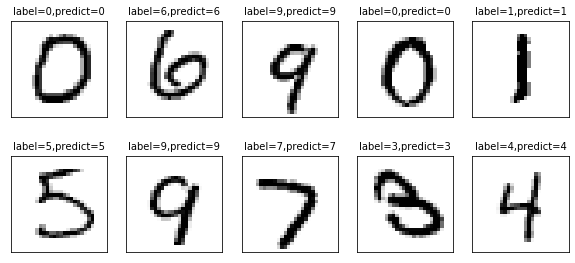

In [50]:
plot_images_labels_prediction(mnist.test.images,
                             mnist.test.labels,
                             prediction_result,10,10)